In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from pandas import DataFrame
import csv
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets, linear_model
import pickle
import collections
from sklearn import cross_validation
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
import numpy as np
import random

import seaborn as sns

import collections

pd.options.display.max_rows=500
pd.options.display.max_columns=999

plt.rcParams['figure.figsize'] = (15, 5)
import warnings; warnings.simplefilter('ignore')

C:\Users\User\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
# # Events
# f1 = open("C:\\Users\\User\\Desktop\\DTU\\Thesis\\Python Files\\Files\\events\\READY\\Events_with_description", 'rb')
# ev = pickle.load(f1)
# f1.close()

# Boarding
f1 = open("C:\\Users\\User\\Desktop\\DTU\\Thesis\\Python Files\\Files\\FinalDFs\\Boarding_2017_w", 'rb')
bo = pickle.load(f1)
f1.close()


# Main dataset
f1 = open("C:\\Users\\User\\Desktop\\DTU\\Thesis\\Python Files\\Files\\FinalDFs\\Alighting_2017_w", 'rb')
al = pickle.load(f1)
f1.close()

for h in range(8):
    al["tod_%d_to_%d"%(h*3,h*3+2)]=al["h_%d"%(h*3)]+al["h_%d"%(h*3+1)]+al["h_%d"%(h*3+2)]

    
al['isEvent']= al['event_1h_bef']+  al['event_2h_bef']+ al['event_3h_bef']+ al['event_during']#+ al['event_during_2h_aft']
# bo['isEvent']=bo['event_1h_aft']+  bo['event_2h_aft']+ bo['event_3h_aft']+   bo['event_during_4h_aft']+ bo['event_during_5h_aft']+ bo['event_during_6h_aft']

    
    
df=al

df=df[df['AlightingPassengerCount']>0]

# df['isEvent']=df['event_1h_aft']+df['event_2h_aft']+df['event_3h_aft']+df['event_1h_bef']+df['event_2h_bef']+df['event_3h_bef']+df['event_during']           

df['Time_difference'] = [round(x) for x in df['Time_difference']]

df['event_during_1h_aft']=(df['Time_difference']==-1)*1
df['event_during_2h_aft']=(df['Time_difference']==-2)*1
df['event_during_3h_aft']=(df['Time_difference']==-3)*1
df['event_during_4h_aft']=(df['Time_difference']==-4)*1

    
al['isEvent']= al['event_1h_bef']+  al['event_2h_bef']+ al['event_3h_bef']+ al['event_during']#+ al['event_during_2h_aft']
# bo['isEvent']=bo['event_1h_aft']+  bo['event_2h_aft']+ bo['event_3h_aft']+   bo['event_during_4h_aft']+ bo['event_during_5h_aft']+ bo['event_during_6h_aft']




dfs=[]
i=0
for name in df.PoiName.unique():
    print(i,"= ",name)
    i=i+1
    df_new=df[df['PoiName']==name]
    dfs.append(df_new)

0 =  Forum
1 =  Vega
2 =  Bella Center
3 =  DR Koncerthuset
4 =  Royal Arena
5 =  Parken


3.3576972187861616

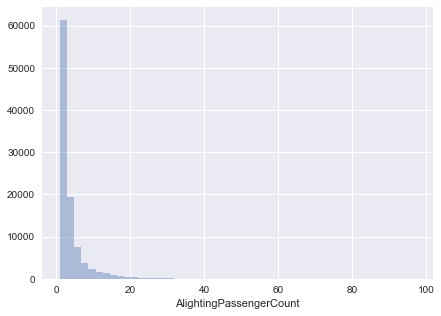

In [3]:
plt.rcParams['figure.figsize'] = (7, 5)
sns.distplot(df.AlightingPassengerCount,kde=False)

df.AlightingPassengerCount.mean()

-----------------------------------------------------------------
['Forum']
678
hour= 16


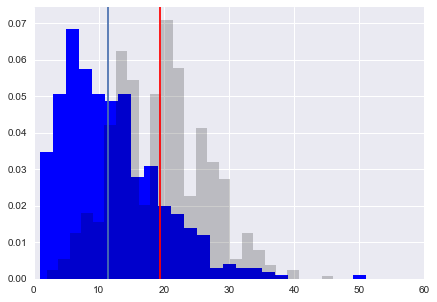

['Forum']
715
hour= 16


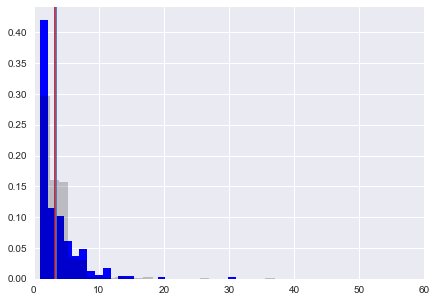

['Forum']
50822
hour= 15


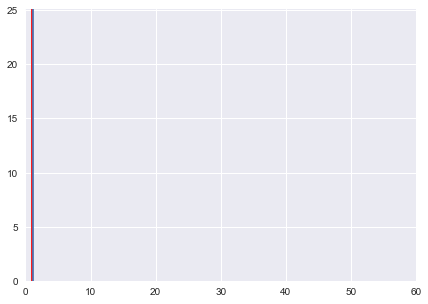

-----------------------------------------------------------------
['Vega']
1586
hour= 19


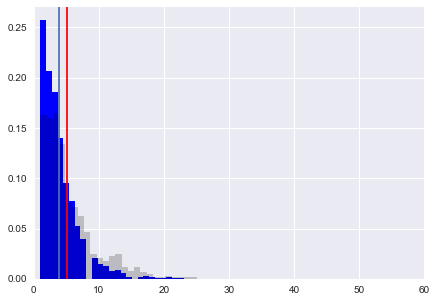

['Vega']
7081
hour= 19


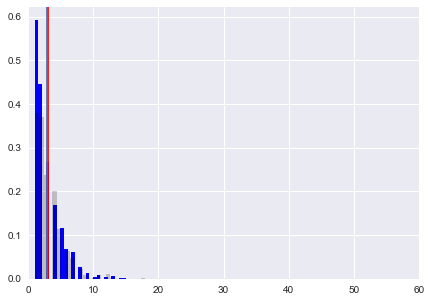

['Vega']
1547
hour= 18


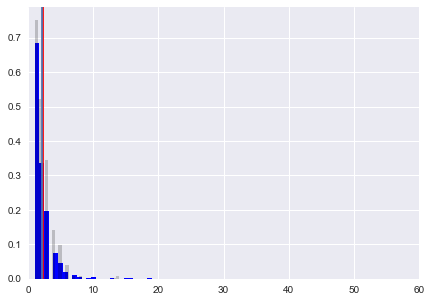

-----------------------------------------------------------------
['Bella Center']
27999
hour= 15


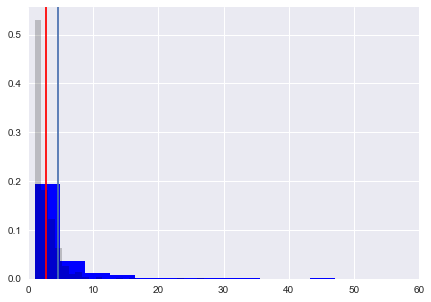

['Bella Center']
28005
hour= 15


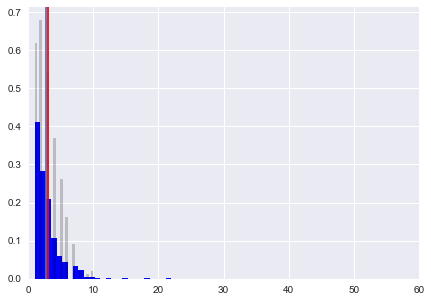

['Bella Center']
28000
hour= 15


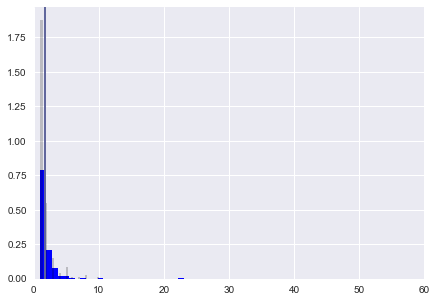

-----------------------------------------------------------------
['DR Koncerthuset']
27548
hour= 17


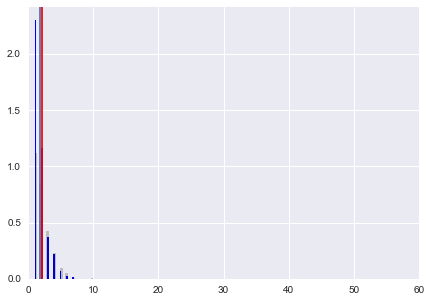

['DR Koncerthuset']
860
hour= 17


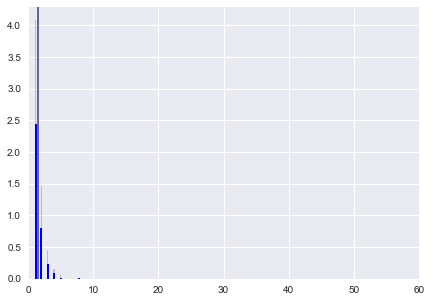

['DR Koncerthuset']
900
hour= 17


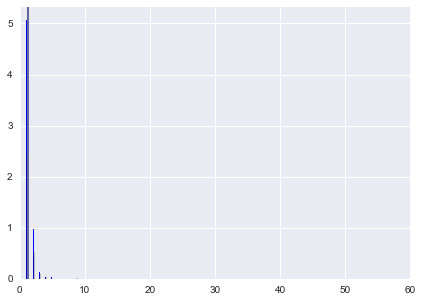

-----------------------------------------------------------------
['Royal Arena']
30942
hour= 16


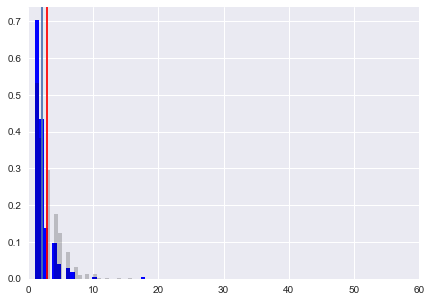

['Royal Arena']
30941
hour= 16


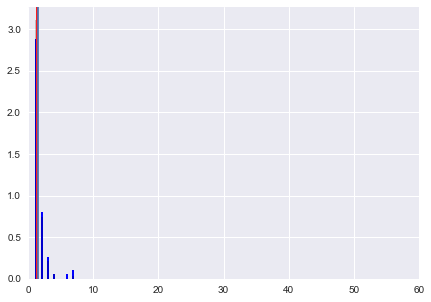

['Royal Arena']
46743
hour= 13


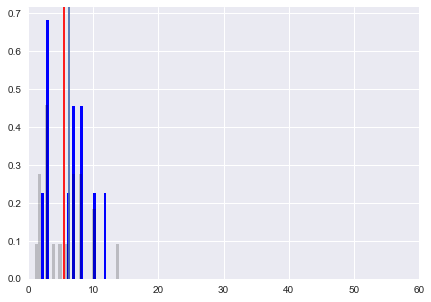

-----------------------------------------------------------------
['Parken']
1365
hour= 16


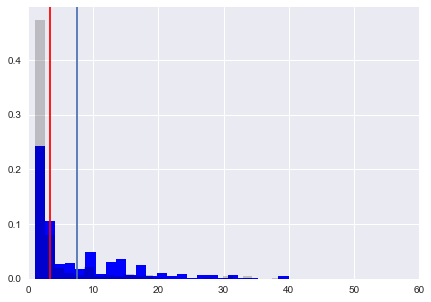

['Parken']
1409
hour= 17


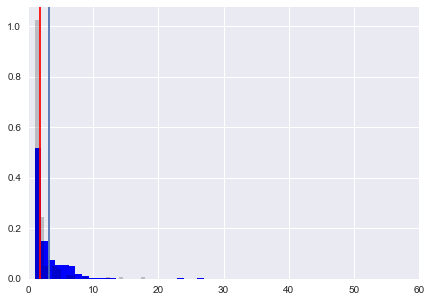

['Parken']
1410
hour= 16


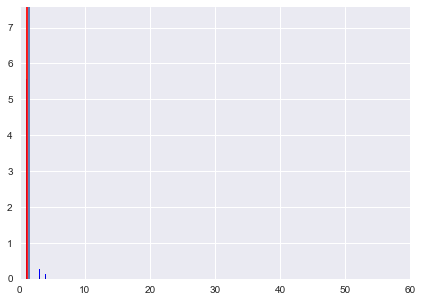

In [16]:
for dataf in dfs:
    print("-----------------------------------------------------------------")
    
    for st in dataf.StopPointId.unique():
        dataframe=dataf[dataf['StopPointId']==st]
    
        print(dataf.PoiName.unique())
        print(st)
        av=dataframe['hours'][dataframe["isEvent"]==1].mode().values
#         try:
        print("hour=",av[0])
        plt.hist(dataframe['AlightingPassengerCount'][dataframe["isEvent"]==1],normed=True,bins=25,color="b")
        plt.hist(dataframe.AlightingPassengerCount[dataframe['hours']==av[0]],normed=True,bins=25,color="k",alpha=0.2)
        plt.axvline(x=dataframe.AlightingPassengerCount[dataframe['hours']==av[0]].mean(),color='r')
        plt.axvline(x=dataframe['AlightingPassengerCount'][dataframe["isEvent"]==1].mean())
        plt.xlim(0,60)
#         plt.ylim(0,0.7)
        plt.show()
#         except:
#             print("Failed",st,dataf.PoiName.unique())

-----------------------------------------------------------------
['Forum']
678
hour= 13
feature event_3h_bef


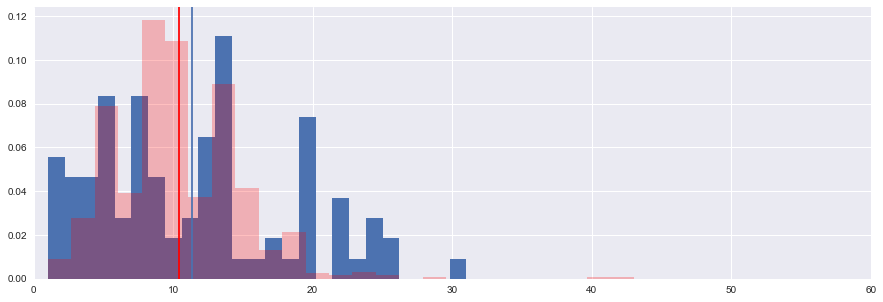

['Forum']
678
hour= 14
feature event_2h_bef


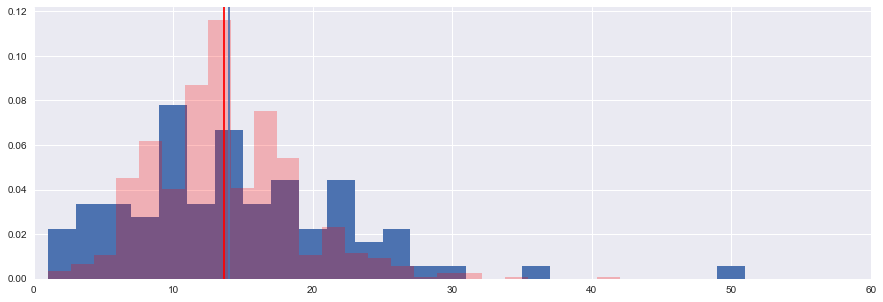

['Forum']
678
hour= 15
feature event_1h_bef


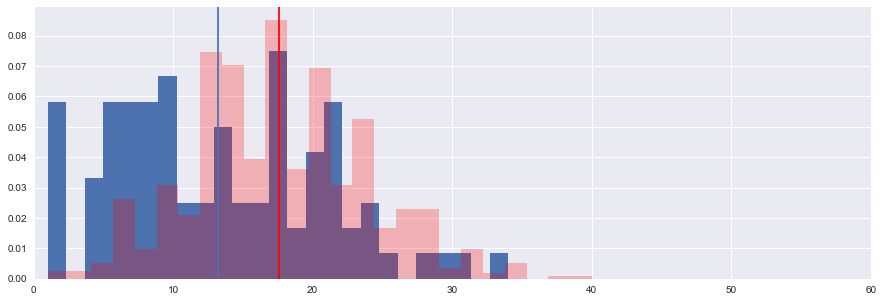

['Forum']
678
hour= 10
feature event_during_1h_aft


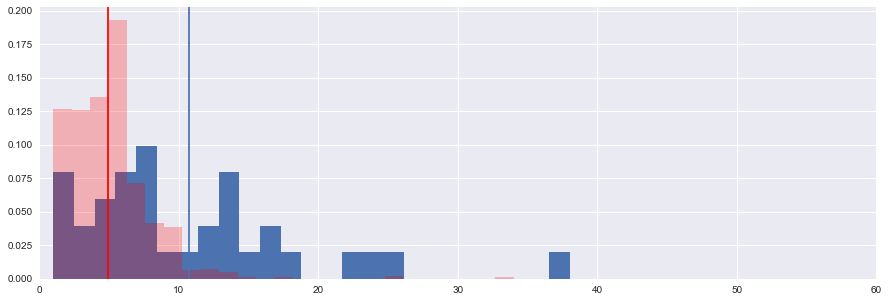

['Forum']
678
hour= 11
feature event_during_2h_aft


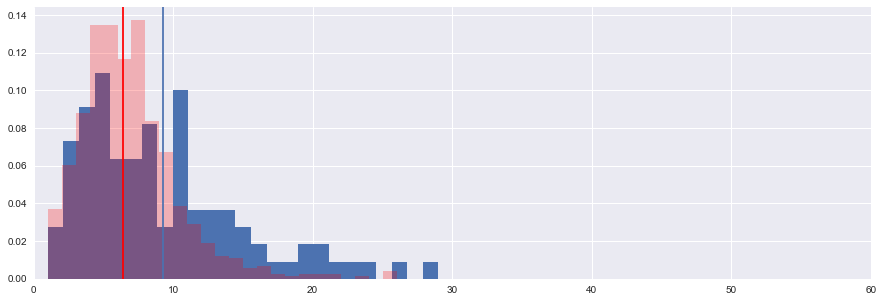

['Forum']
678
hour= 12
feature event_during_3h_aft


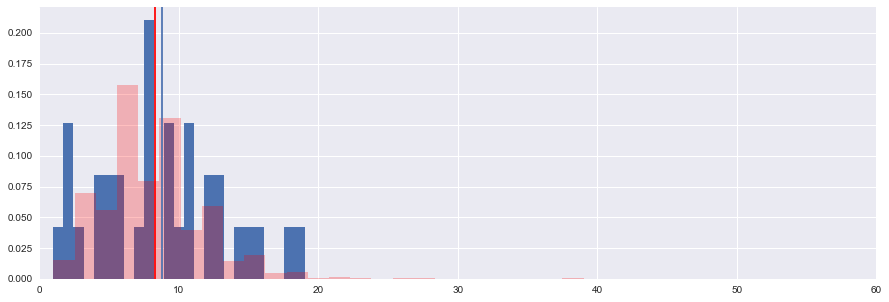

['Forum']
678
hour= 12
feature event_during_4h_aft


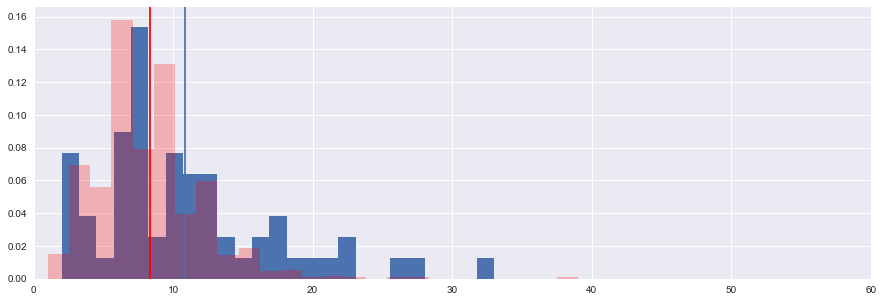

['Forum']
715
hour= 13
feature event_3h_bef


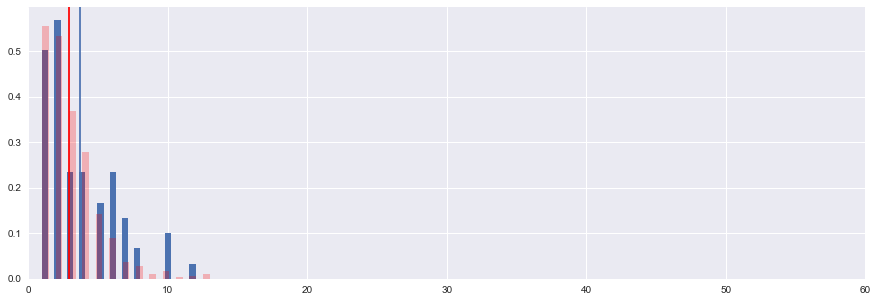

['Forum']
715
hour= 14
feature event_2h_bef


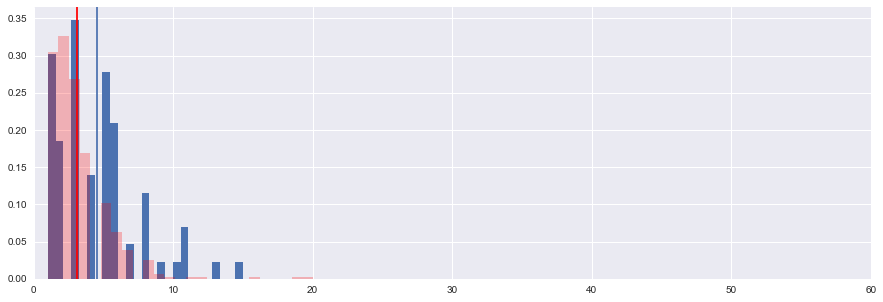

['Forum']
715
hour= 15
feature event_1h_bef


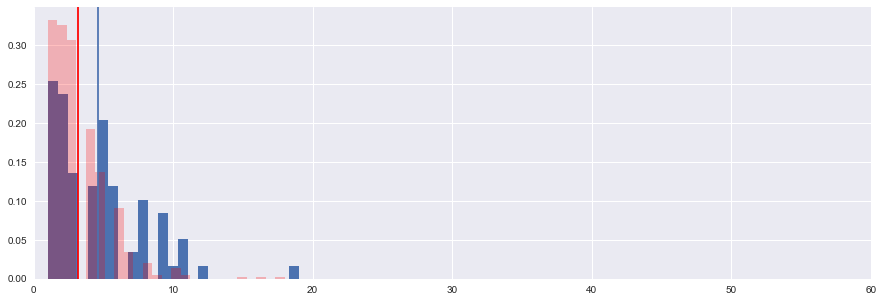

['Forum']
715
hour= 10
feature event_during_1h_aft


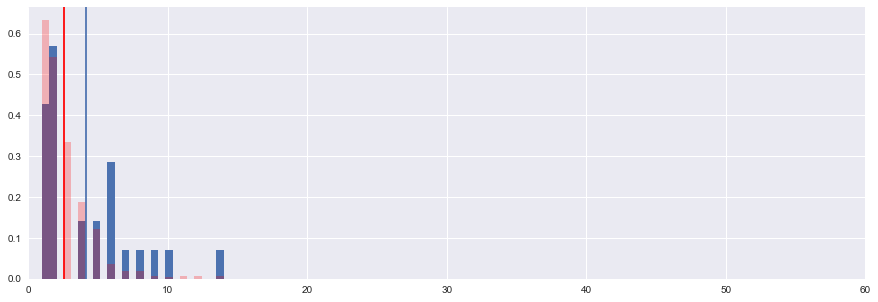

['Forum']
715
hour= 11
feature event_during_2h_aft


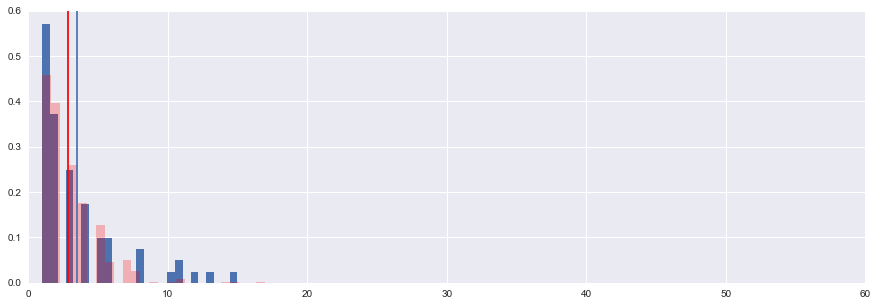

['Forum']
715
hour= 12
feature event_during_3h_aft


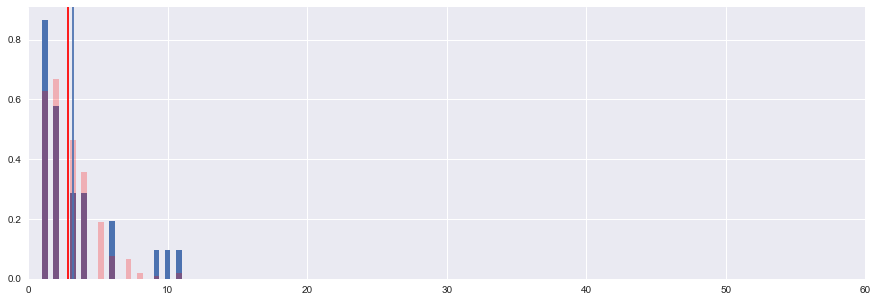

['Forum']
715
hour= 13
feature event_during_4h_aft


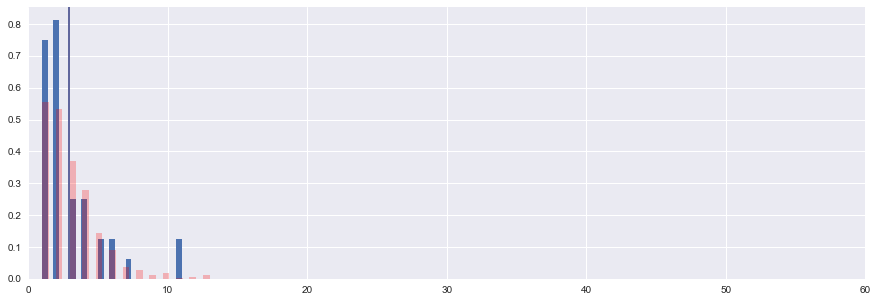

['Forum']
50822
hour= 15
feature event_3h_bef


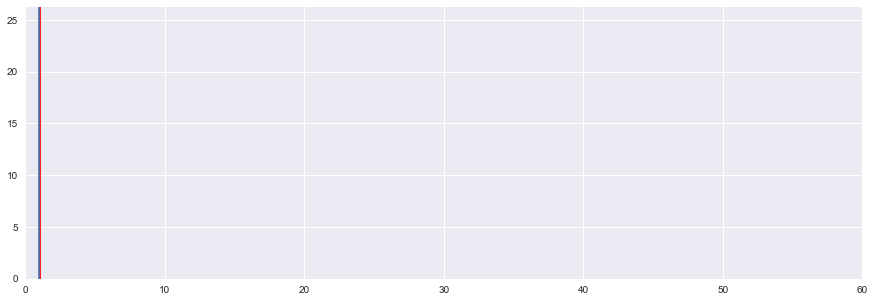

['Forum']
50822
hour= 17
feature event_2h_bef


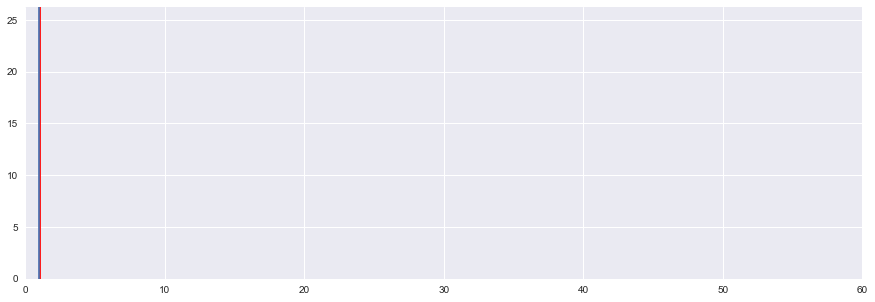

['Forum']
50822
Failed 50822 ['Forum']
['Forum']
50822
hour= 17
feature event_during_1h_aft


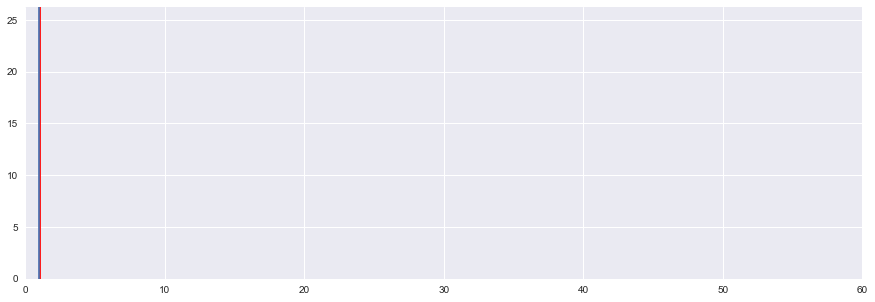

['Forum']
50822
hour= 13
feature event_during_2h_aft


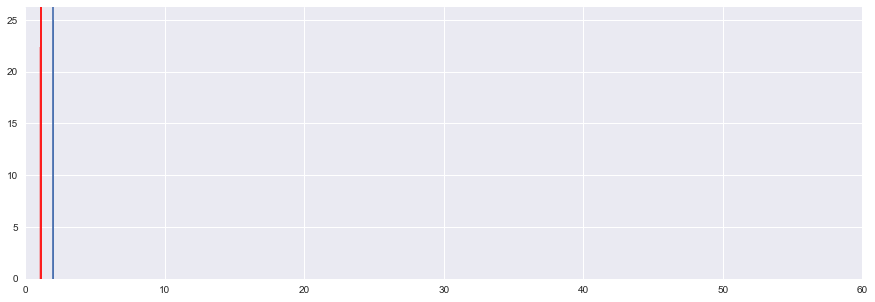

['Forum']
50822
Failed 50822 ['Forum']
['Forum']
50822
Failed 50822 ['Forum']
-----------------------------------------------------------------
['Vega']
1586
hour= 17
feature event_3h_bef


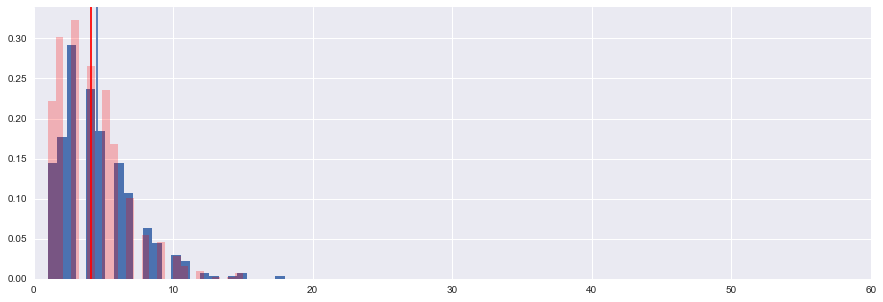

['Vega']
1586
hour= 18
feature event_2h_bef


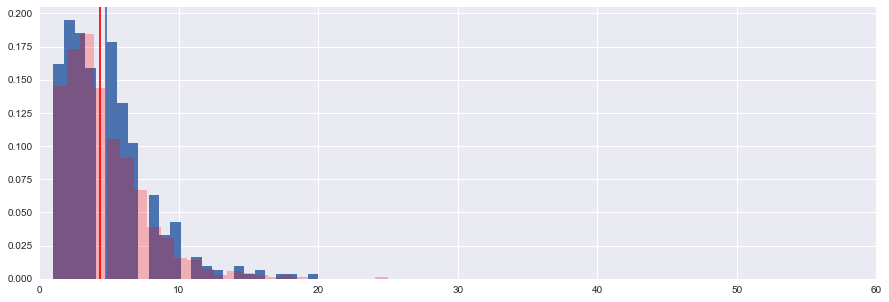

['Vega']
1586
hour= 19
feature event_1h_bef


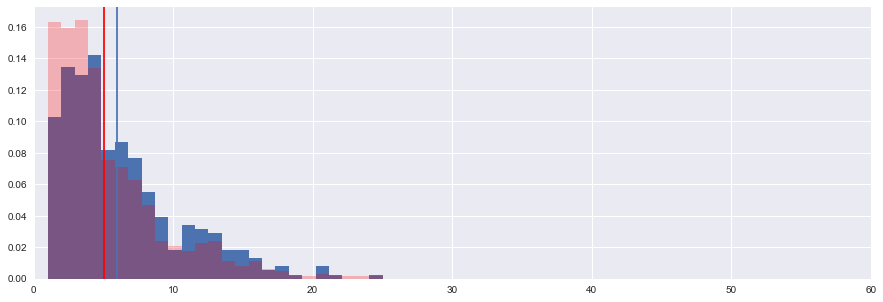

['Vega']
1586
hour= 21
feature event_during_1h_aft


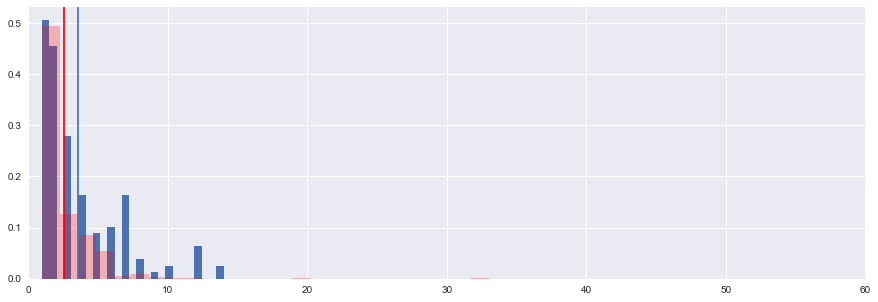

['Vega']
1586
hour= 22
feature event_during_2h_aft


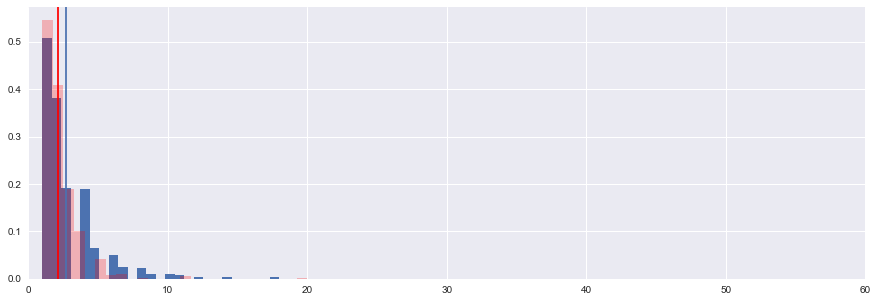

['Vega']
1586
hour= 23
feature event_during_3h_aft


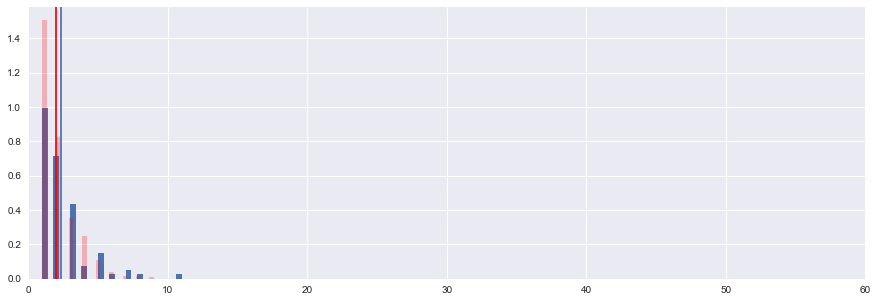

['Vega']
1586
hour= 23
feature event_during_4h_aft


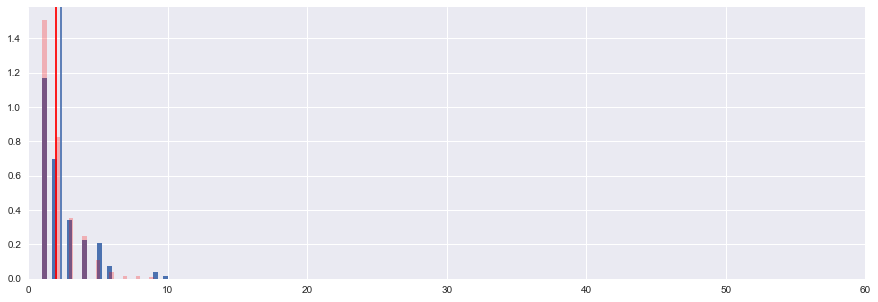

['Vega']
7081
hour= 17
feature event_3h_bef


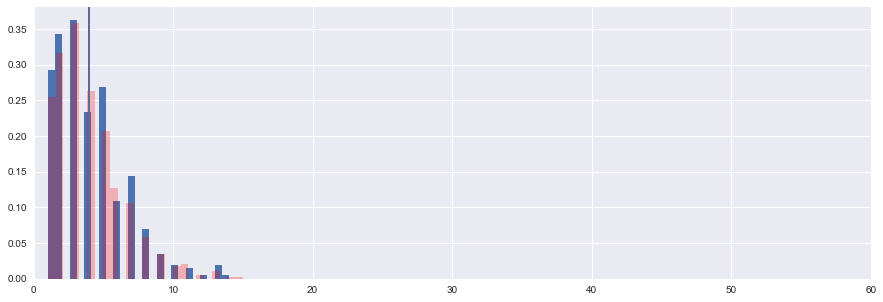

['Vega']
7081
hour= 18
feature event_2h_bef


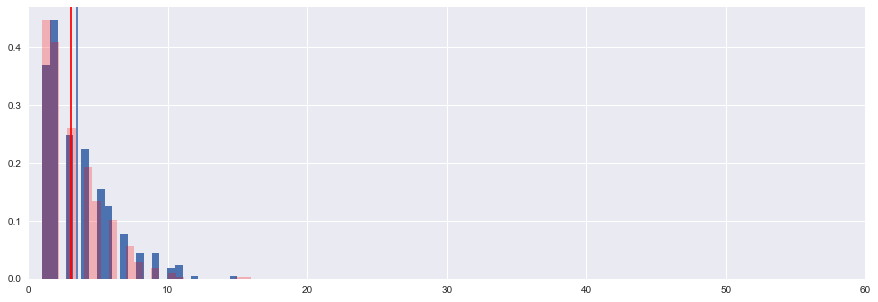

['Vega']
7081
hour= 19
feature event_1h_bef


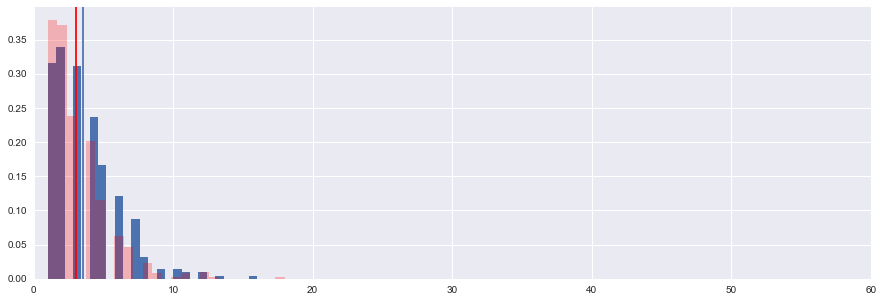

['Vega']
7081
hour= 21
feature event_during_1h_aft


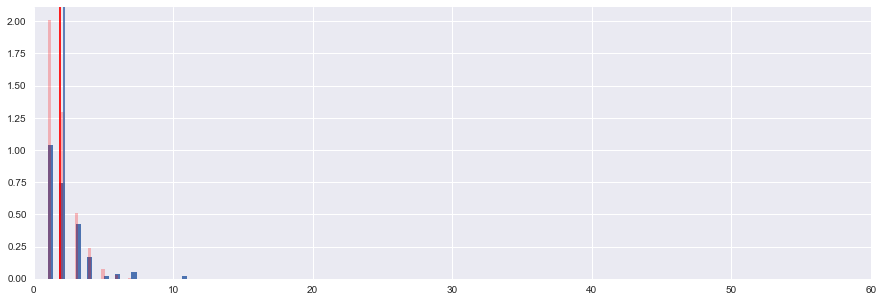

['Vega']
7081
hour= 22
feature event_during_2h_aft


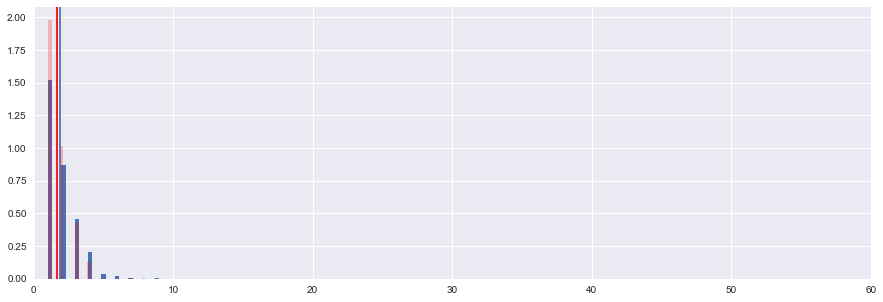

['Vega']
7081
hour= 23
feature event_during_3h_aft


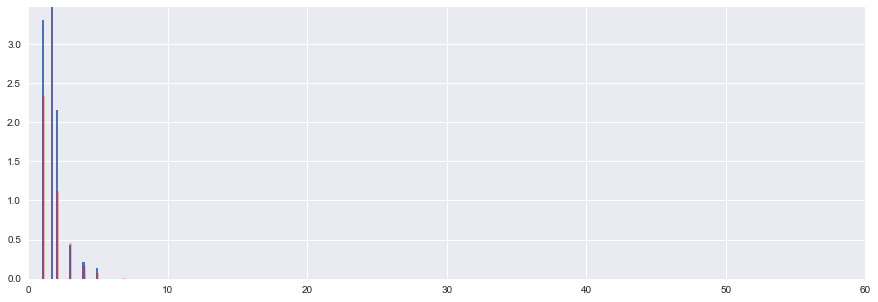

['Vega']
7081
hour= 23
feature event_during_4h_aft


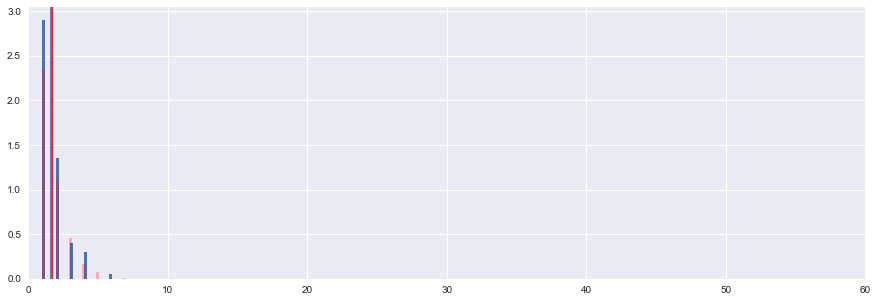

['Vega']
1547
hour= 17
feature event_3h_bef


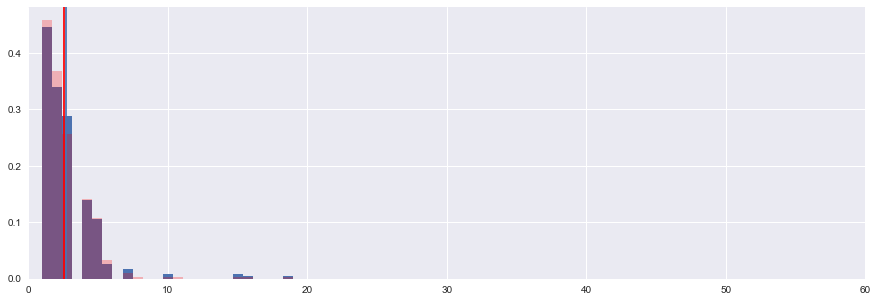

['Vega']
1547
hour= 18
feature event_2h_bef


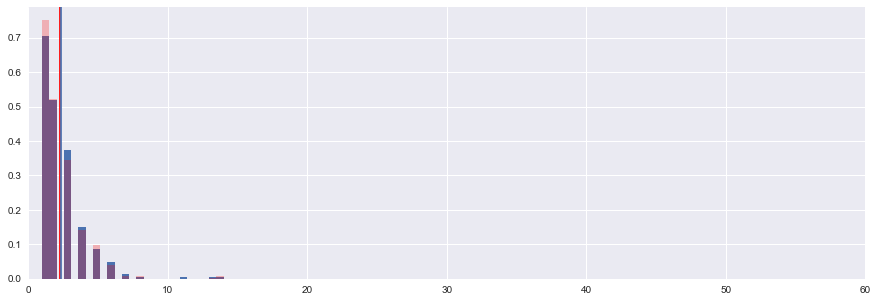

['Vega']
1547
hour= 19
feature event_1h_bef


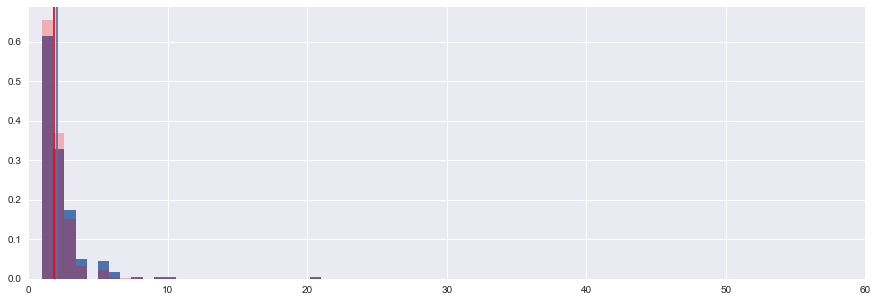

['Vega']
1547
hour= 21
feature event_during_1h_aft


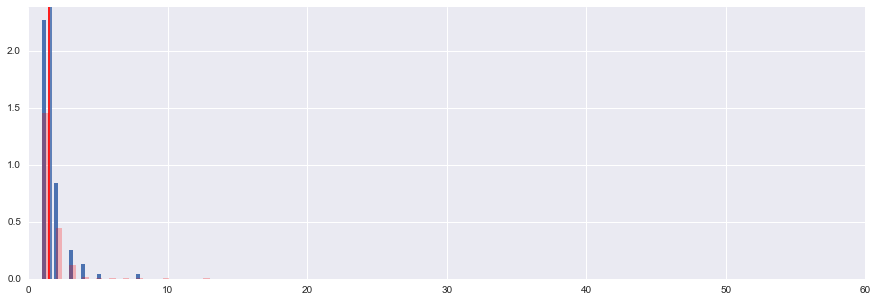

['Vega']
1547
hour= 22
feature event_during_2h_aft


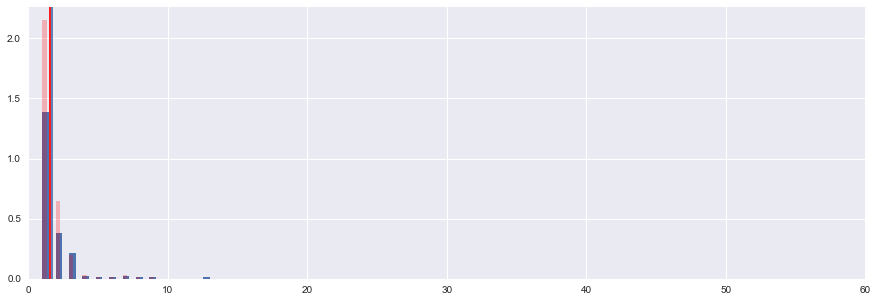

['Vega']
1547
hour= 22
feature event_during_3h_aft


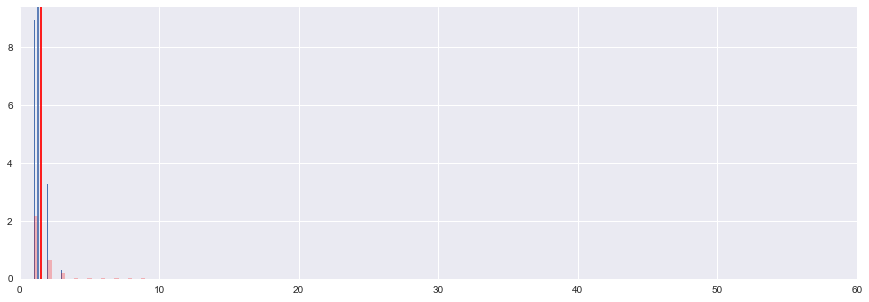

['Vega']
1547
hour= 23
feature event_during_4h_aft


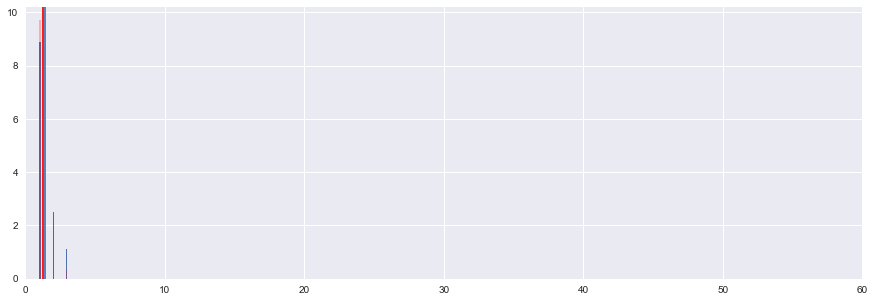

-----------------------------------------------------------------
['Parken']
1365
hour= 15
feature event_3h_bef


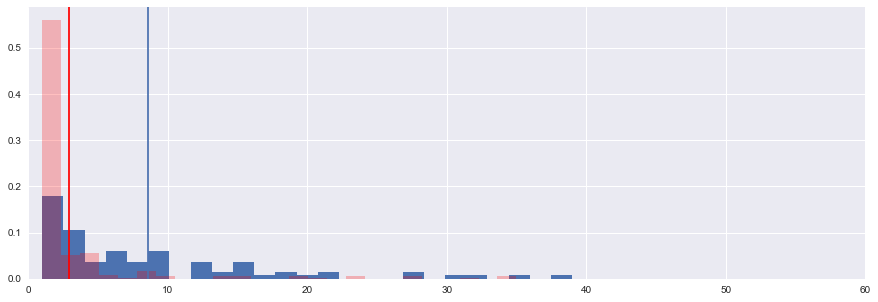

['Parken']
1365
hour= 16
feature event_2h_bef


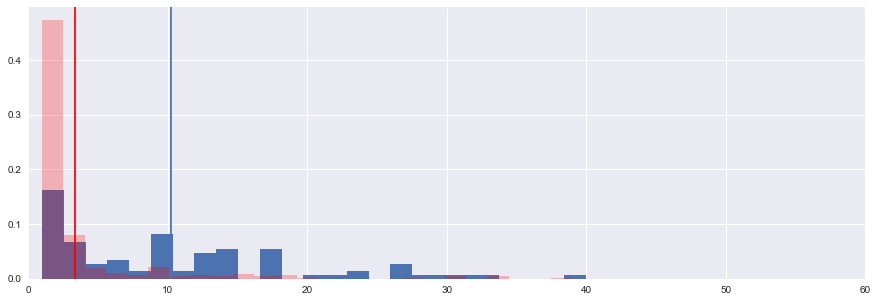

['Parken']
1365
hour= 17
feature event_1h_bef


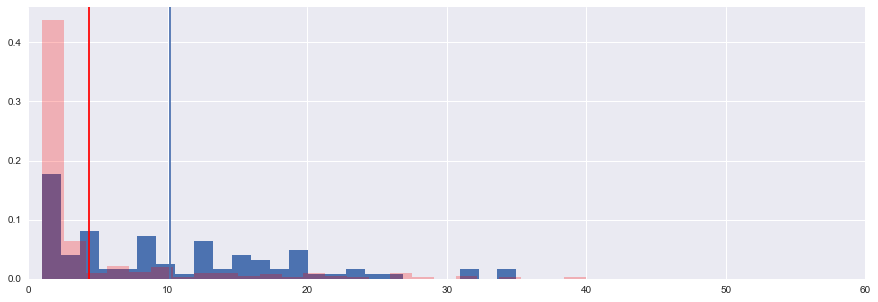

['Parken']
1365
hour= 19
feature event_during_1h_aft


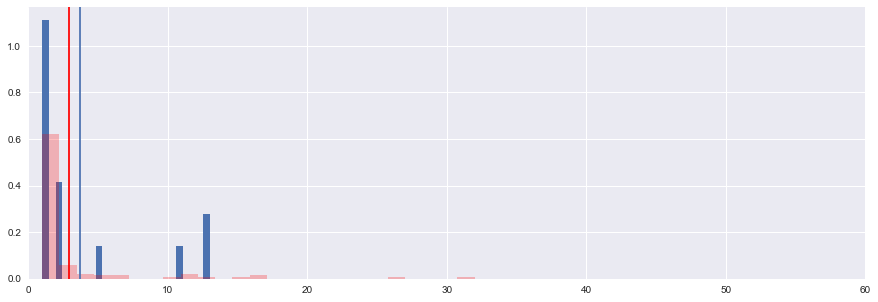

['Parken']
1365
hour= 20
feature event_during_2h_aft


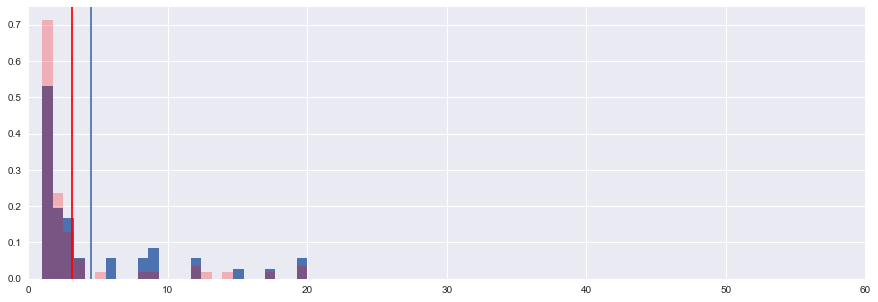

['Parken']
1365
hour= 21
feature event_during_3h_aft


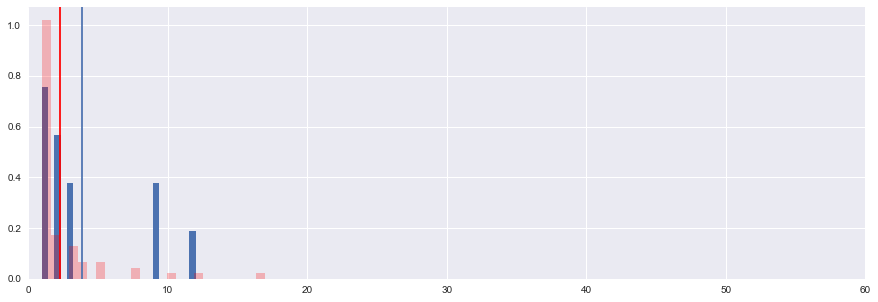

['Parken']
1365
hour= 16
feature event_during_4h_aft


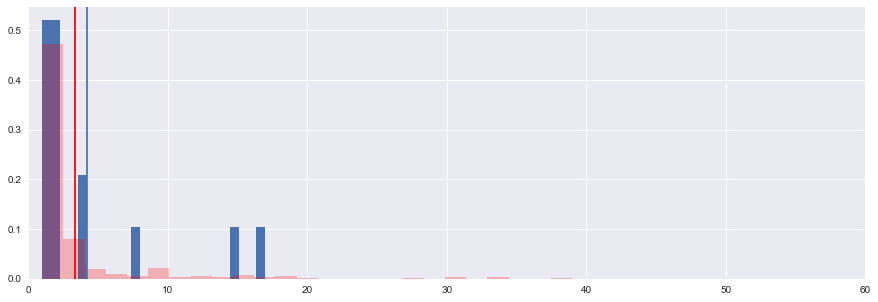

['Parken']
1409
hour= 15
feature event_3h_bef


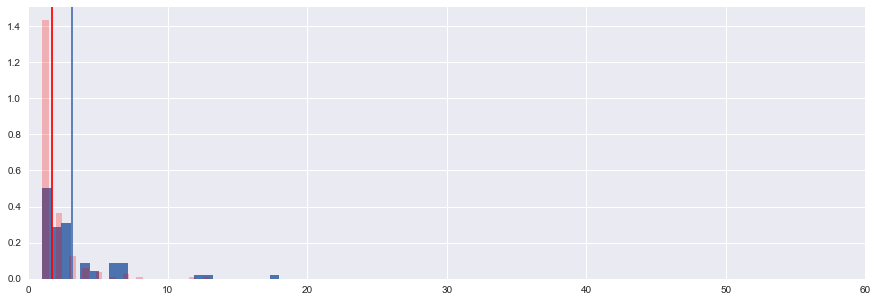

['Parken']
1409
hour= 16
feature event_2h_bef


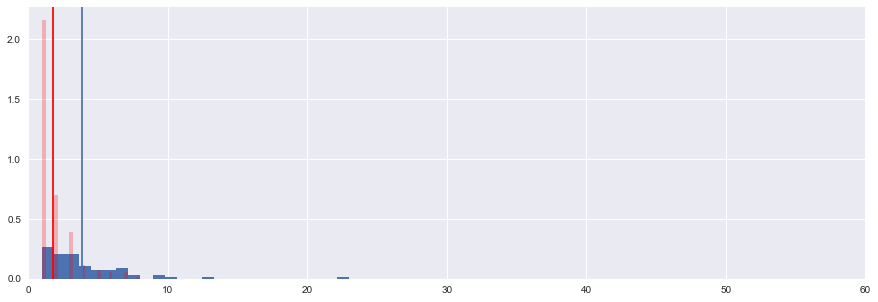

['Parken']
1409
hour= 17
feature event_1h_bef


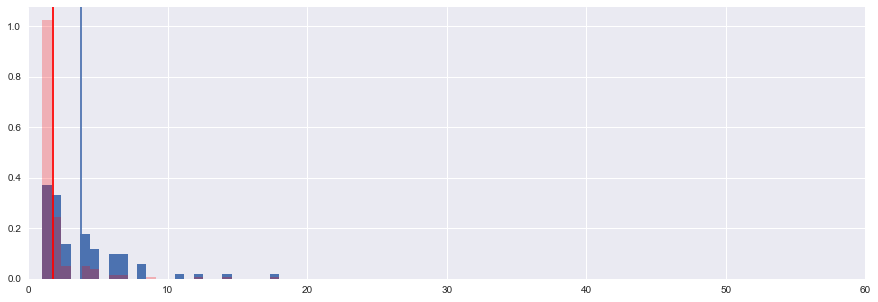

['Parken']
1409
hour= 19
feature event_during_1h_aft


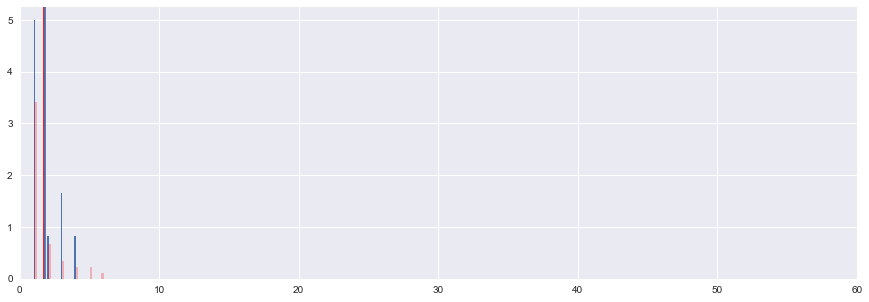

['Parken']
1409
hour= 19
feature event_during_2h_aft


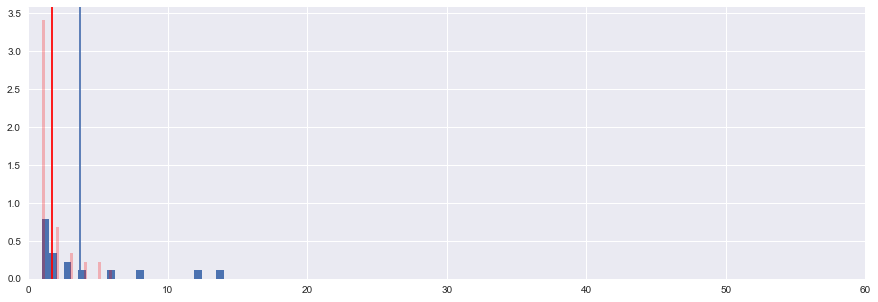

['Parken']
1409
hour= 15
feature event_during_3h_aft


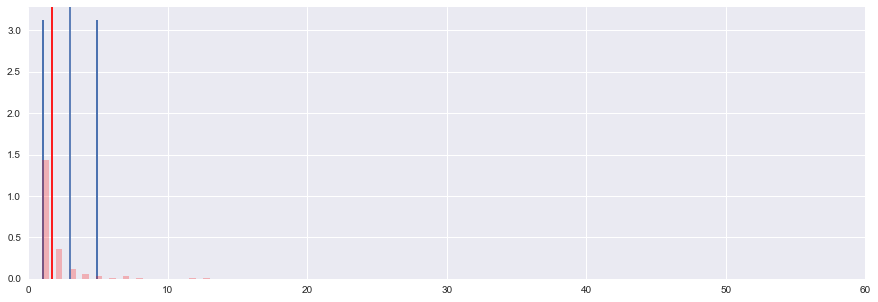

['Parken']
1409
hour= 16
feature event_during_4h_aft


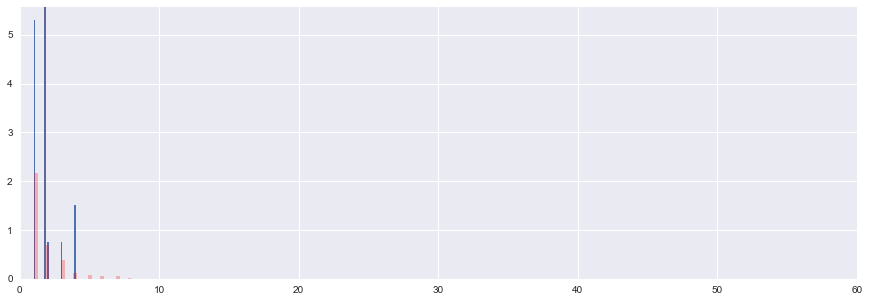

['Parken']
1410
hour= 15
feature event_3h_bef


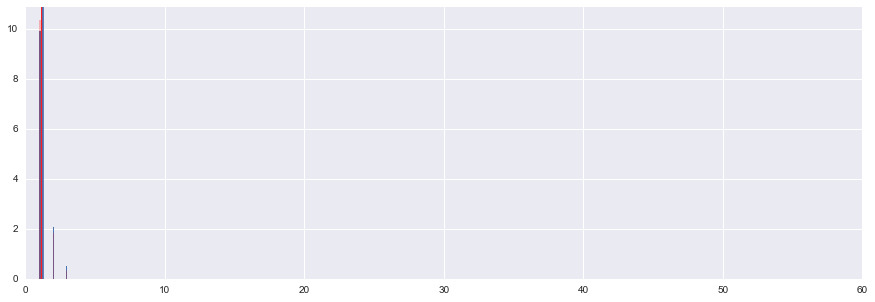

['Parken']
1410
hour= 16
feature event_2h_bef


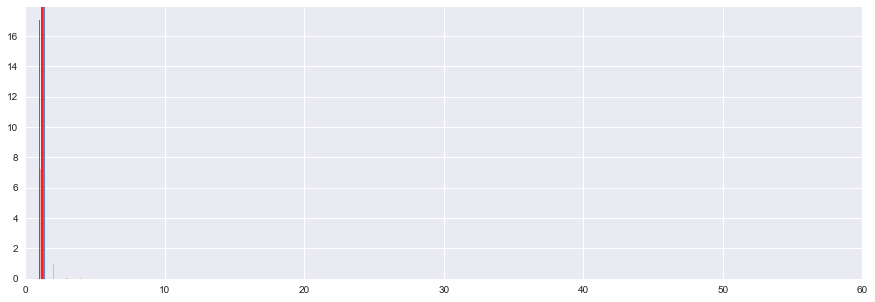

['Parken']
1410
hour= 17
feature event_1h_bef


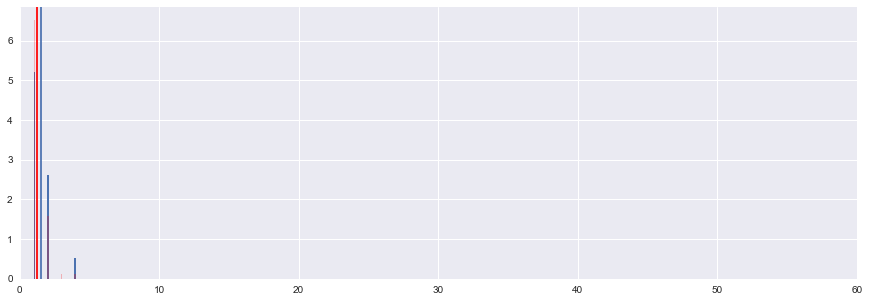

['Parken']
1410
hour= 12
feature event_during_1h_aft


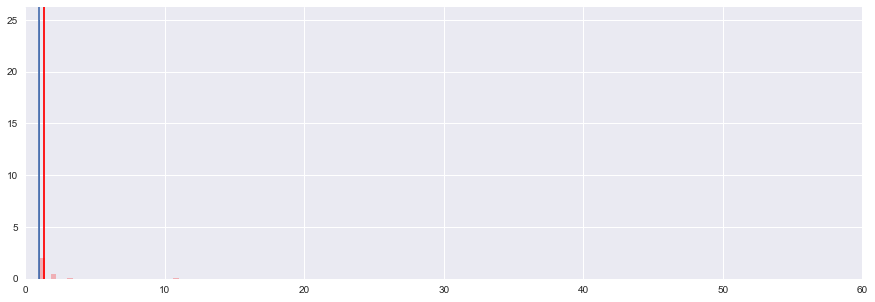

['Parken']
1410
hour= 12
feature event_during_2h_aft


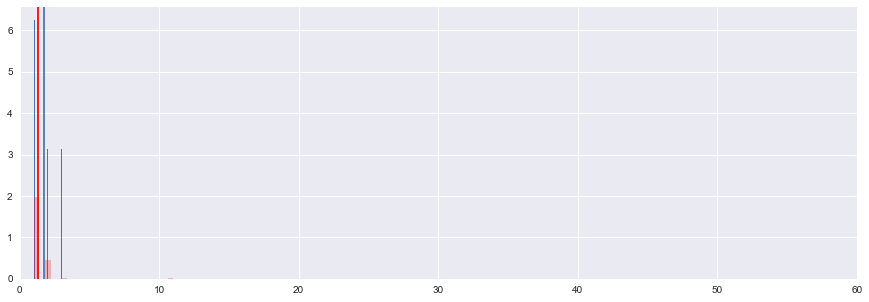

['Parken']
1410
hour= 15
feature event_during_3h_aft


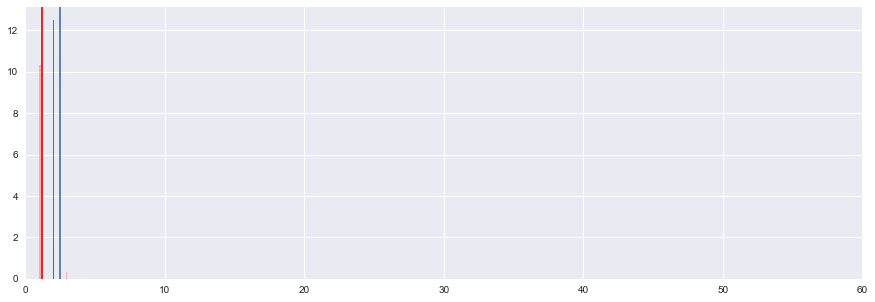

['Parken']
1410
hour= 17
feature event_during_4h_aft


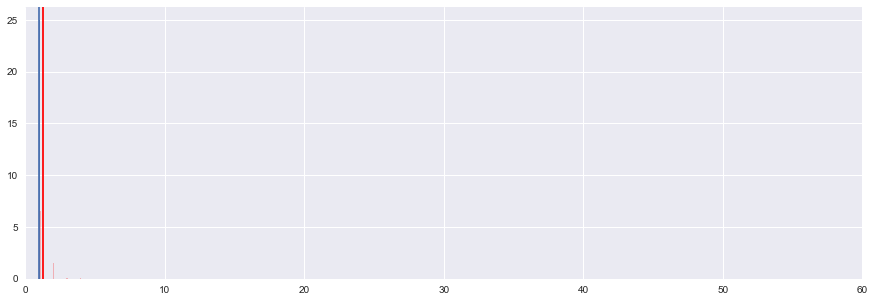

-----------------------------------------------------------------
['Bella Center']
27999
hour= 7
feature event_3h_bef


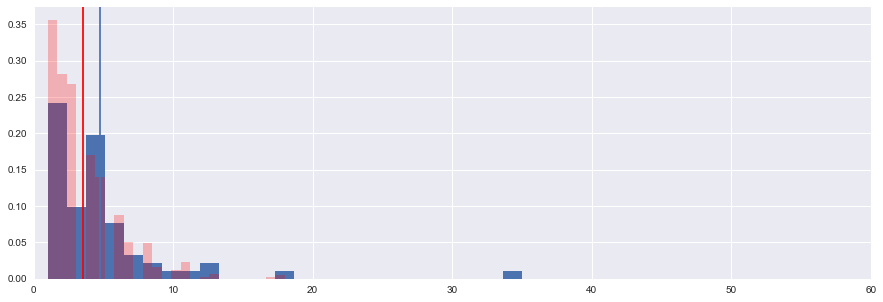

['Bella Center']
27999
hour= 8
feature event_2h_bef


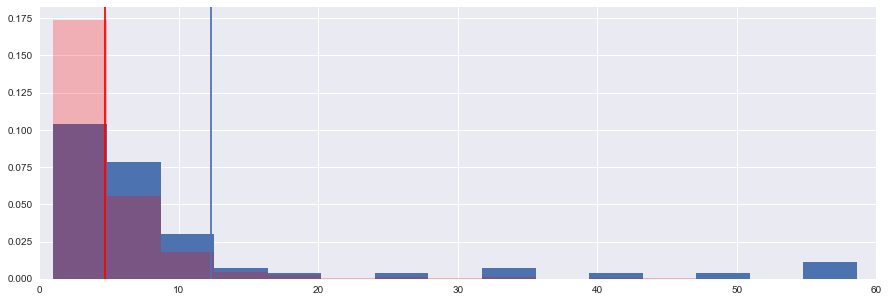

['Bella Center']
27999
hour= 9
feature event_1h_bef


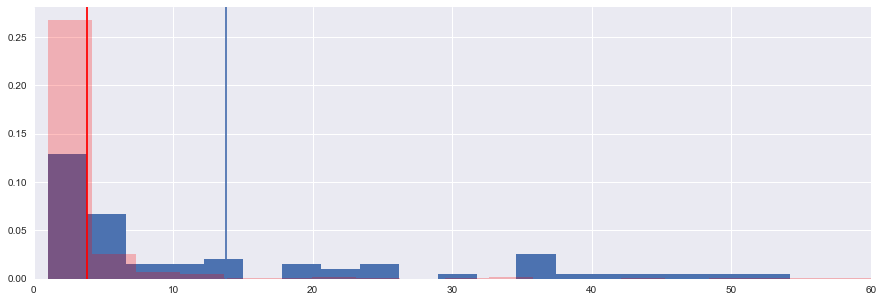

['Bella Center']
27999
hour= 11
feature event_during_1h_aft


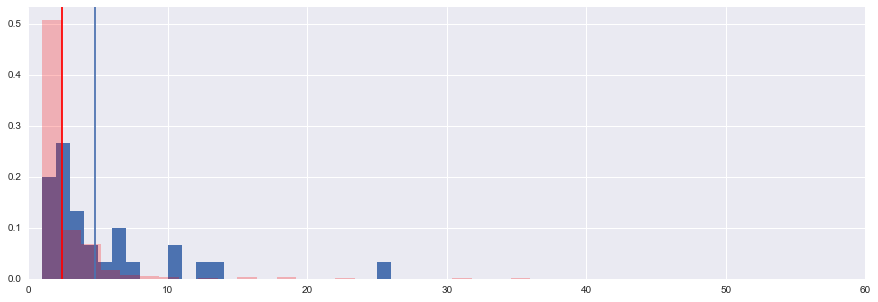

['Bella Center']
27999
hour= 11
feature event_during_2h_aft


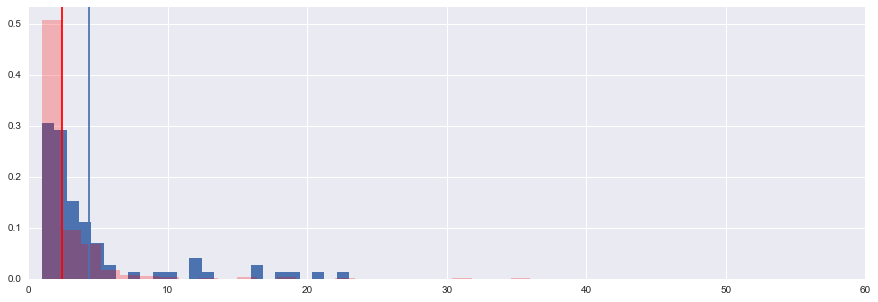

['Bella Center']
27999
hour= 13
feature event_during_3h_aft


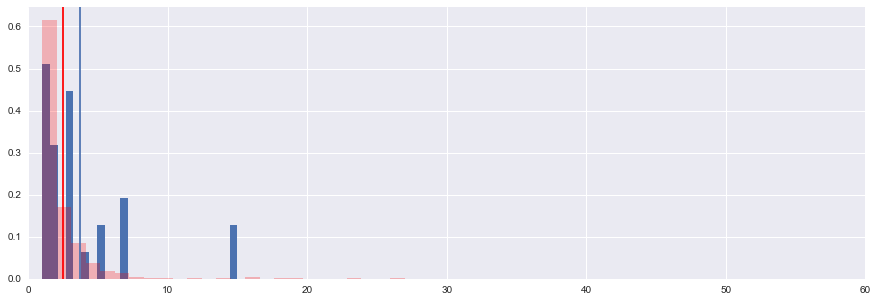

['Bella Center']
27999
hour= 13
feature event_during_4h_aft


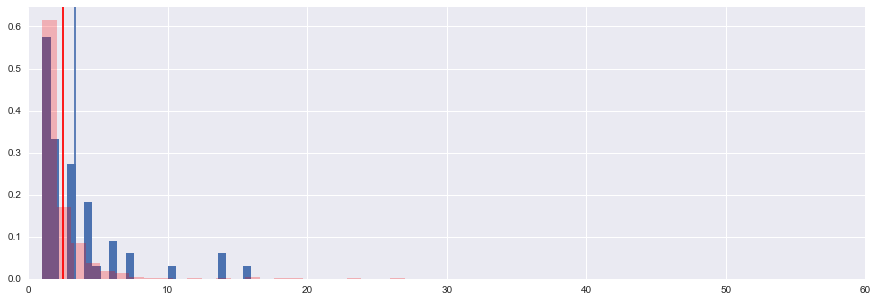

['Bella Center']
28005
hour= 7
feature event_3h_bef


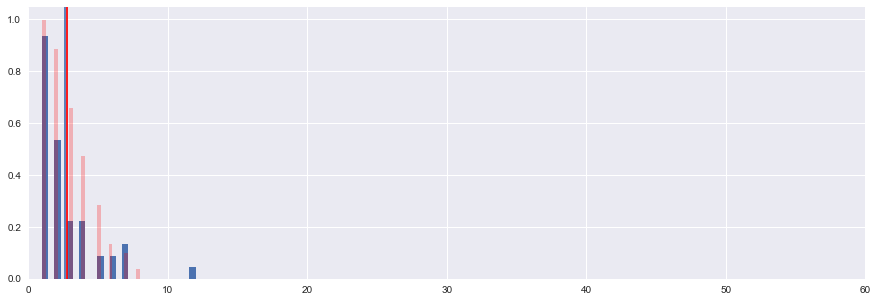

['Bella Center']
28005
hour= 8
feature event_2h_bef


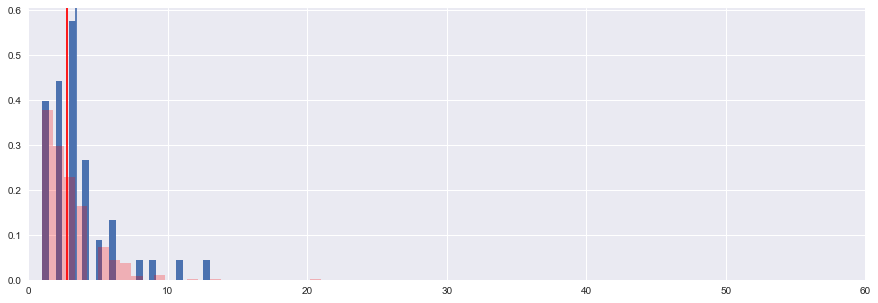

['Bella Center']
28005
hour= 9
feature event_1h_bef


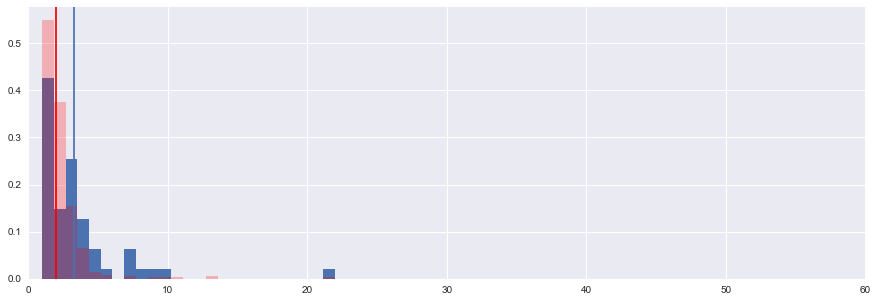

['Bella Center']
28005
hour= 11
feature event_during_1h_aft


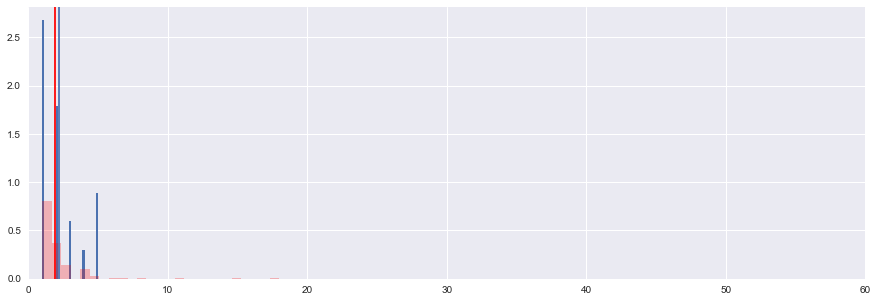

['Bella Center']
28005
hour= 12
feature event_during_2h_aft


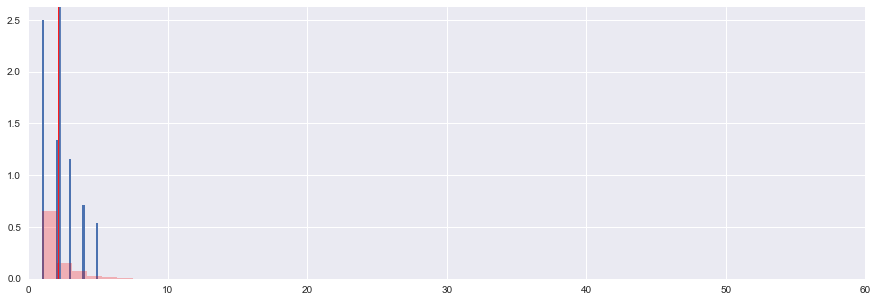

['Bella Center']
28005
hour= 13
feature event_during_3h_aft


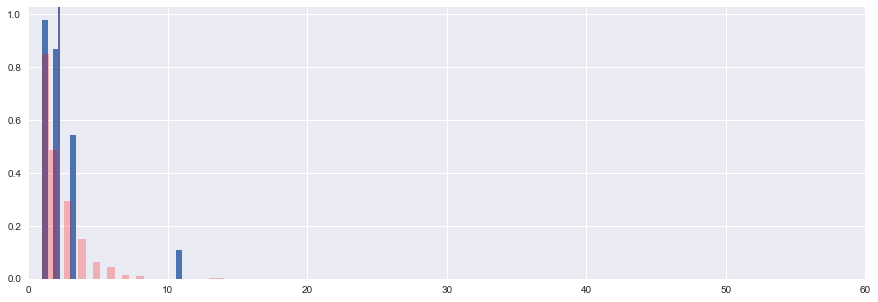

['Bella Center']
28005
hour= 14
feature event_during_4h_aft


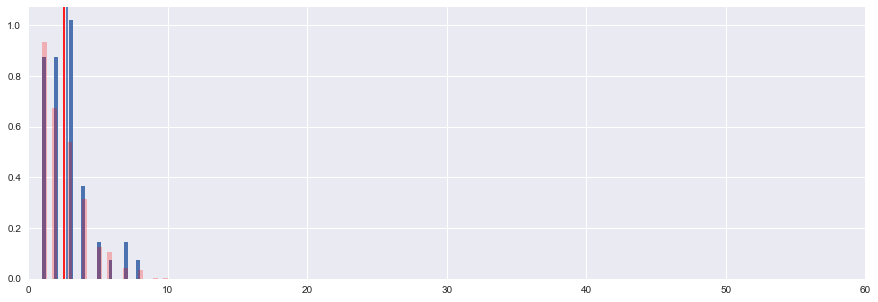

['Bella Center']
28000
hour= 7
feature event_3h_bef


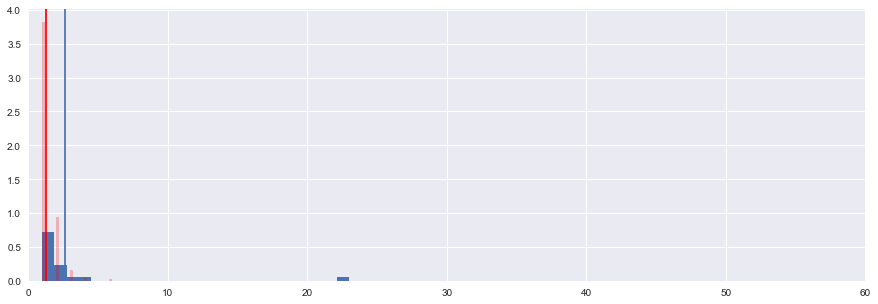

['Bella Center']
28000
hour= 8
feature event_2h_bef


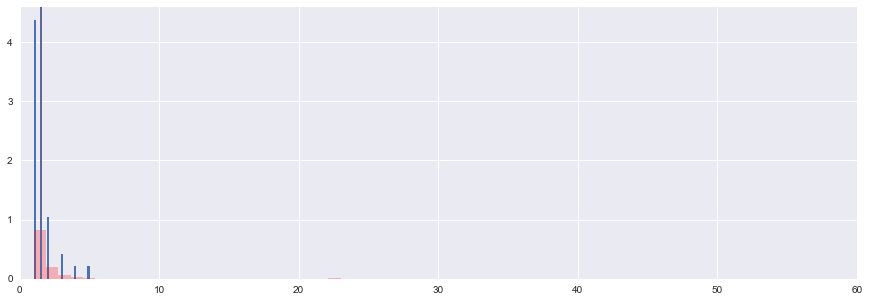

['Bella Center']
28000
hour= 9
feature event_1h_bef


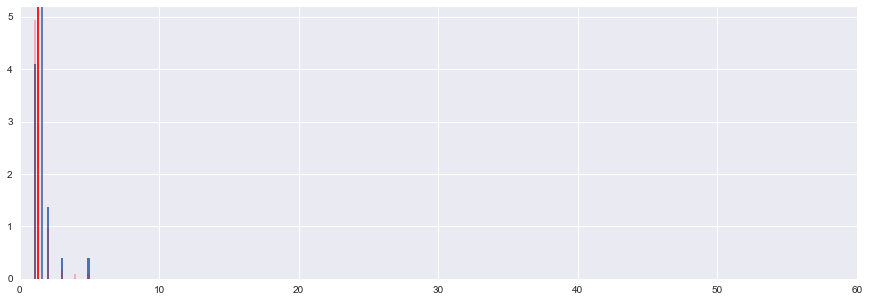

['Bella Center']
28000
hour= 11
feature event_during_1h_aft


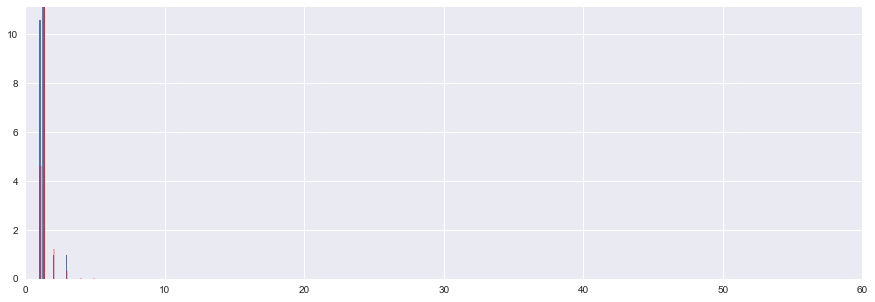

['Bella Center']
28000
hour= 12
feature event_during_2h_aft


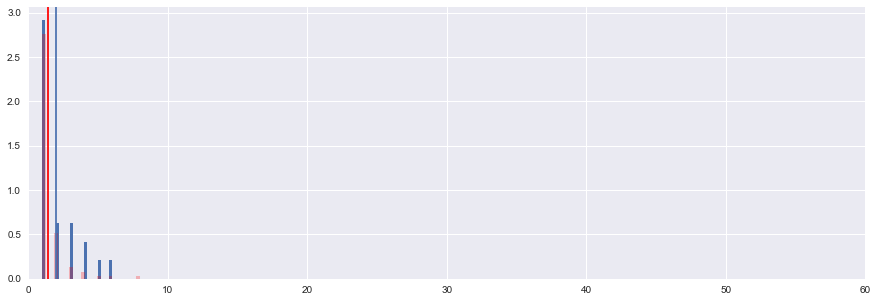

['Bella Center']
28000
hour= 13
feature event_during_3h_aft


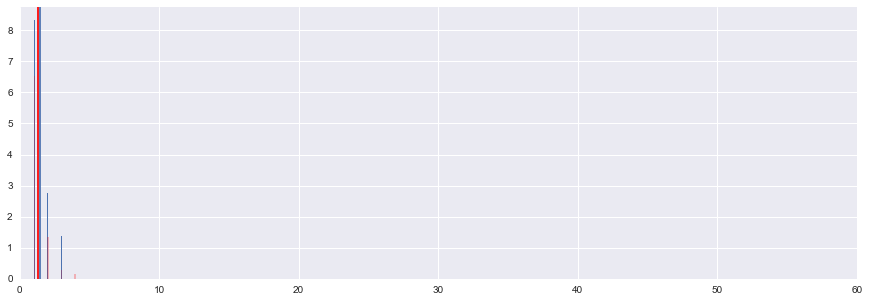

['Bella Center']
28000
hour= 13
feature event_during_4h_aft


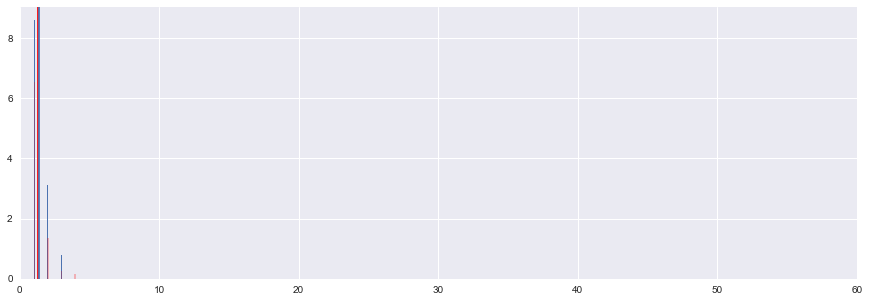

-----------------------------------------------------------------
['DR Koncerthuset']
27548
hour= 17
feature event_3h_bef


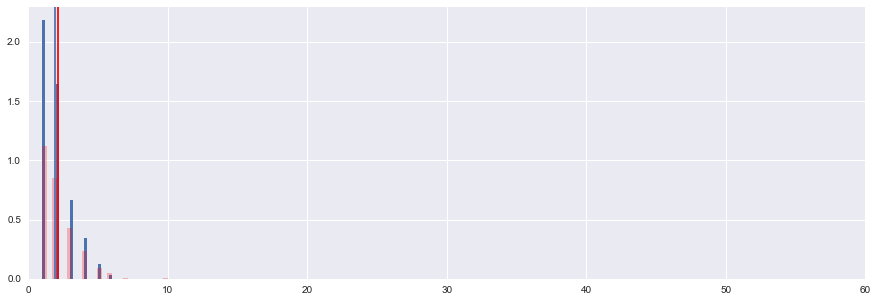

['DR Koncerthuset']
27548
hour= 18
feature event_2h_bef


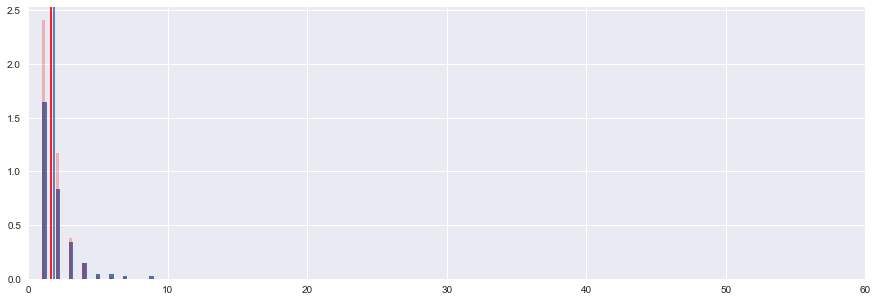

['DR Koncerthuset']
27548
hour= 18
feature event_1h_bef


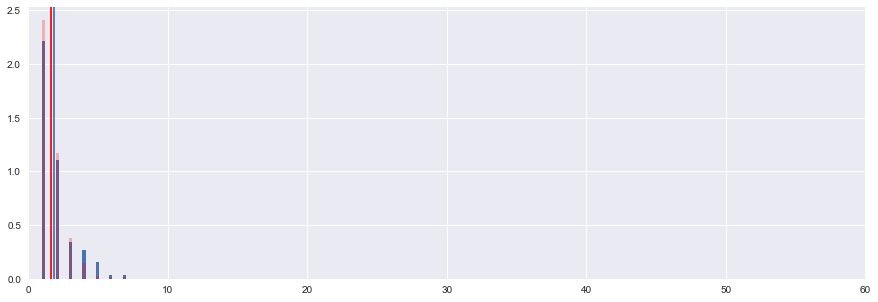

['DR Koncerthuset']
27548
hour= 21
feature event_during_1h_aft


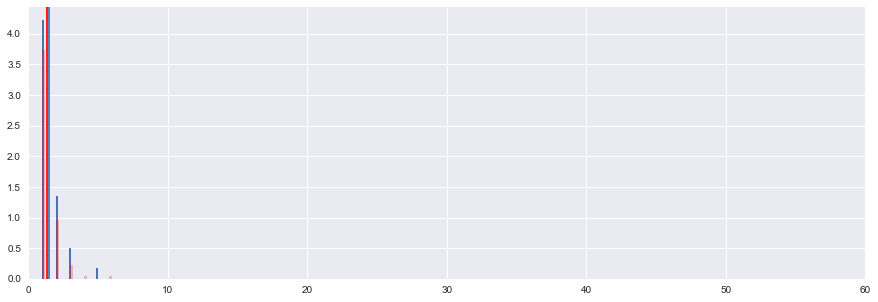

['DR Koncerthuset']
27548
hour= 22
feature event_during_2h_aft


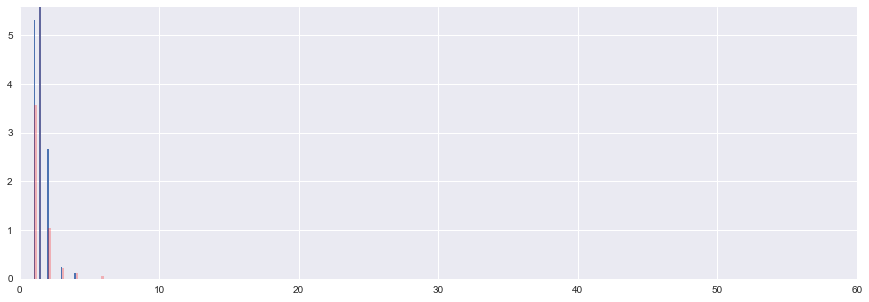

['DR Koncerthuset']
27548
hour= 18
feature event_during_3h_aft


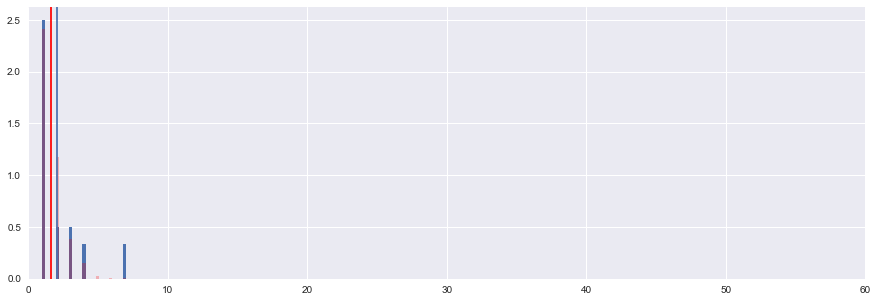

['DR Koncerthuset']
27548
hour= 23
feature event_during_4h_aft


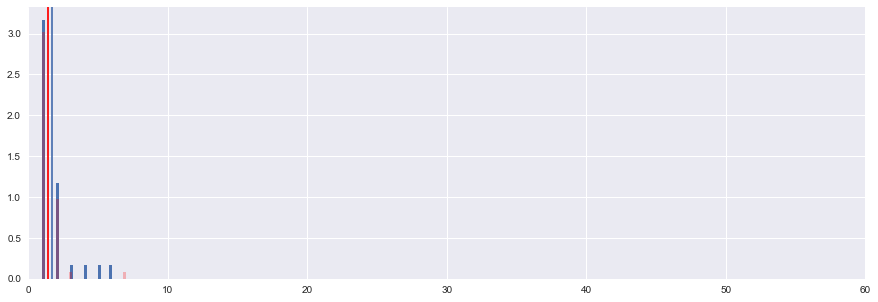

['DR Koncerthuset']
860
hour= 17
feature event_3h_bef


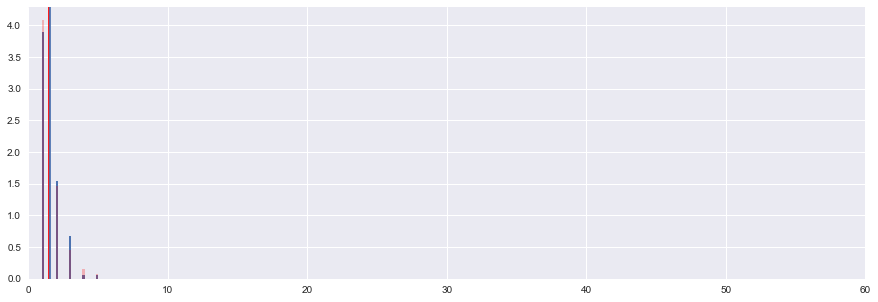

['DR Koncerthuset']
860
hour= 18
feature event_2h_bef


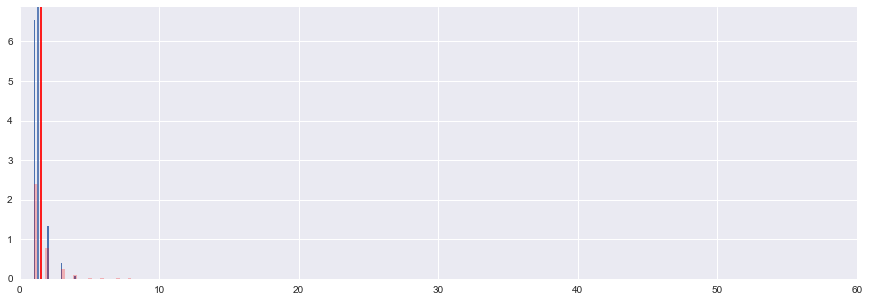

['DR Koncerthuset']
860
hour= 19
feature event_1h_bef


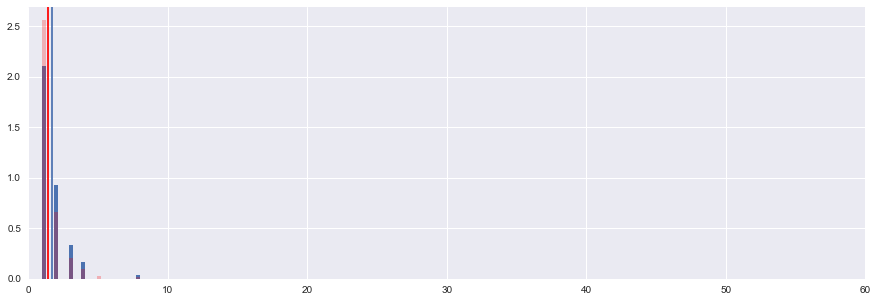

['DR Koncerthuset']
860
hour= 20
feature event_during_1h_aft


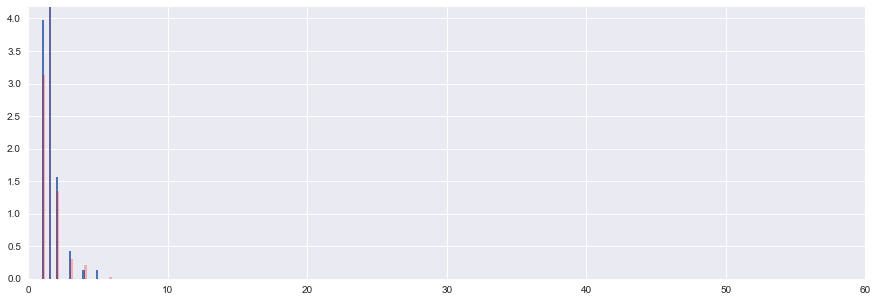

['DR Koncerthuset']
860
hour= 21
feature event_during_2h_aft


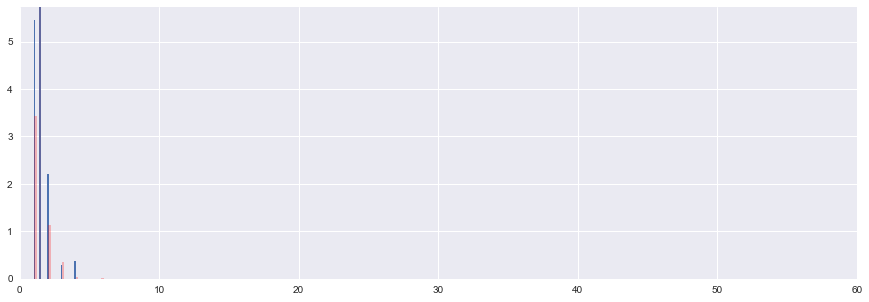

['DR Koncerthuset']
860
hour= 22
feature event_during_3h_aft


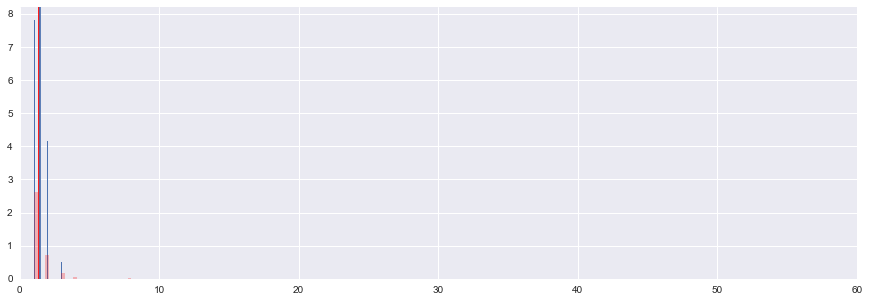

['DR Koncerthuset']
860
hour= 23
feature event_during_4h_aft


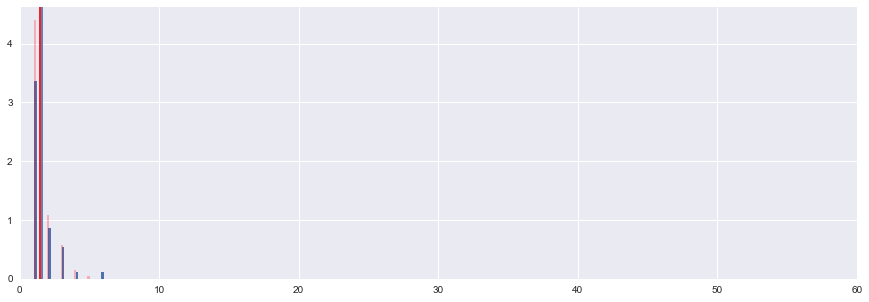

['DR Koncerthuset']
900
hour= 17
feature event_3h_bef


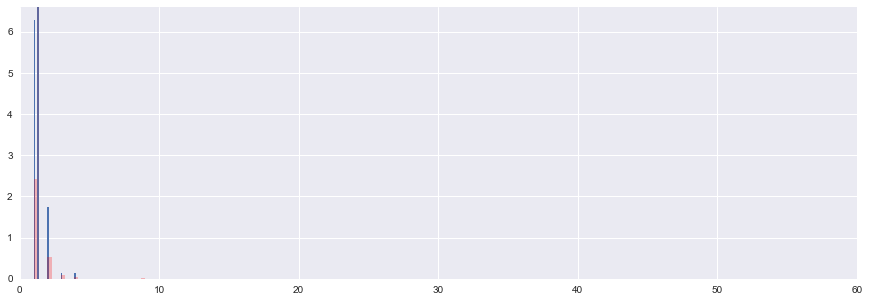

['DR Koncerthuset']
900
hour= 18
feature event_2h_bef


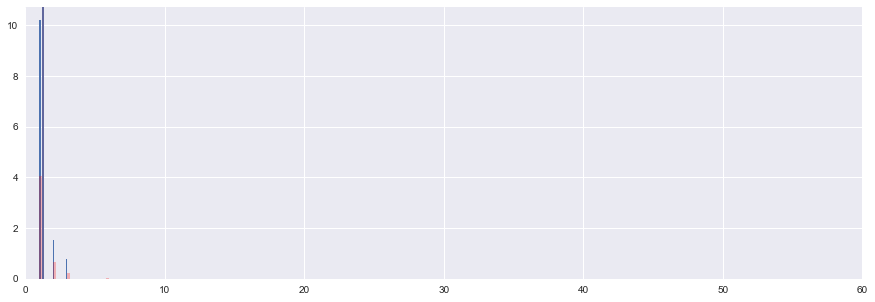

['DR Koncerthuset']
900
hour= 19
feature event_1h_bef


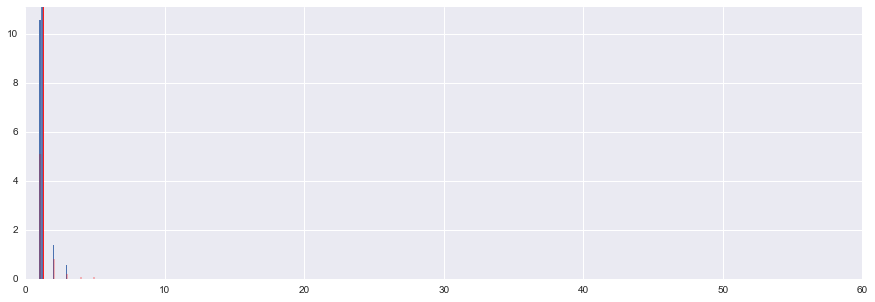

['DR Koncerthuset']
900
hour= 20
feature event_during_1h_aft


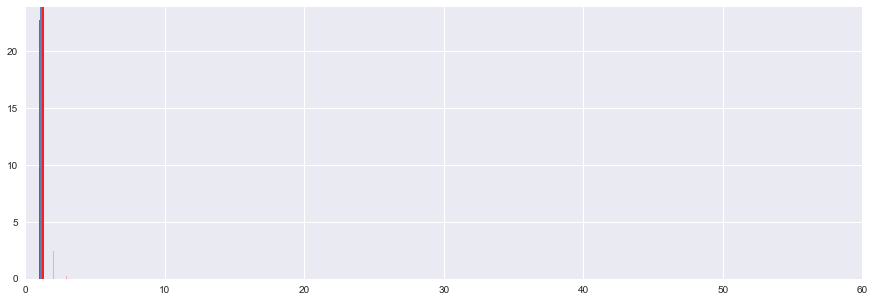

['DR Koncerthuset']
900
hour= 21
feature event_during_2h_aft


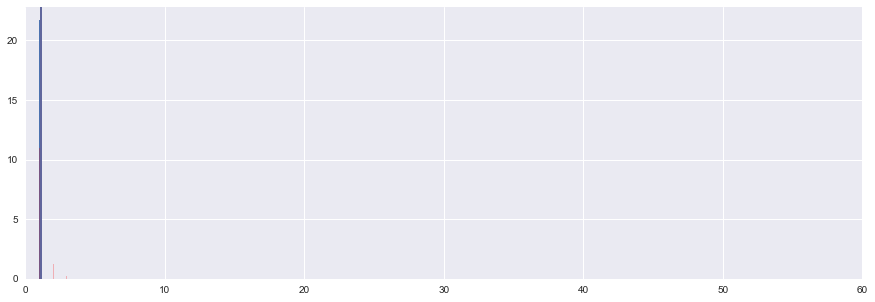

['DR Koncerthuset']
900
hour= 23
feature event_during_3h_aft


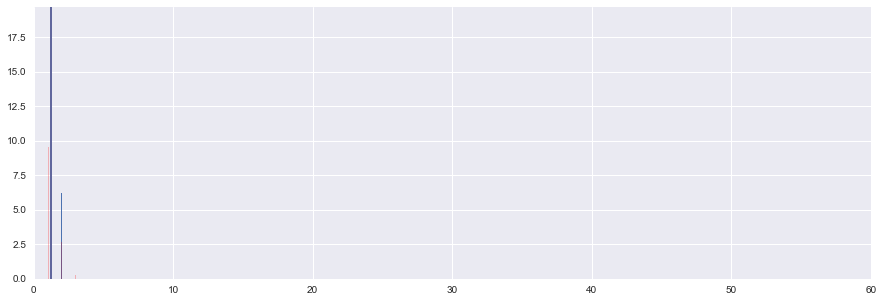

['DR Koncerthuset']
900
hour= 23
feature event_during_4h_aft


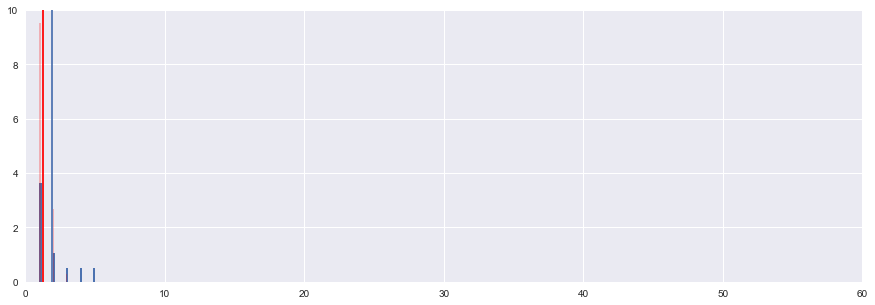

-----------------------------------------------------------------
['Royal Arena']
30942
hour= 17
feature event_3h_bef


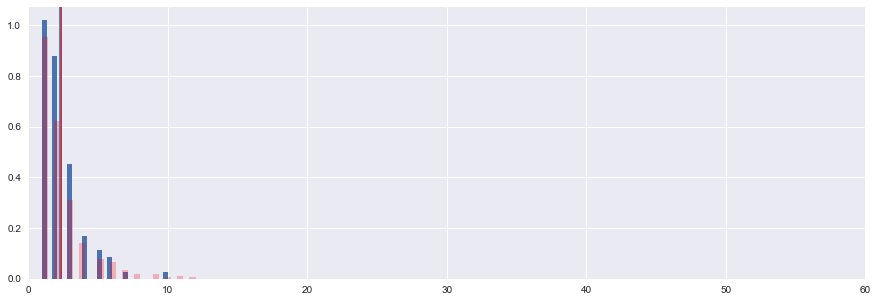

['Royal Arena']
30942
hour= 18
feature event_2h_bef


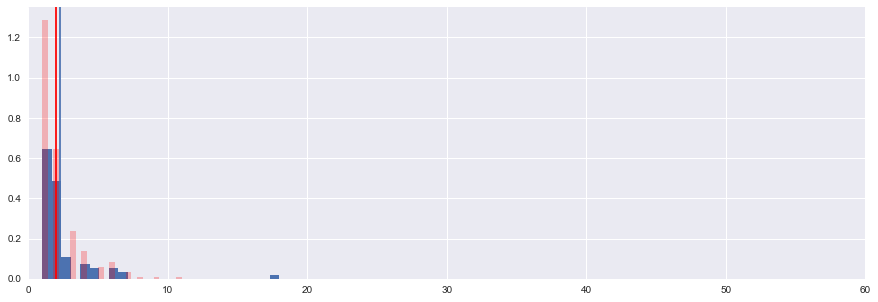

['Royal Arena']
30942
hour= 19
feature event_1h_bef


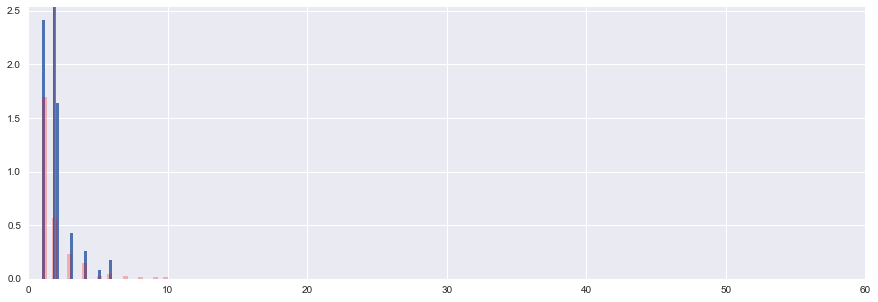

['Royal Arena']
30942
hour= 13
feature event_during_1h_aft


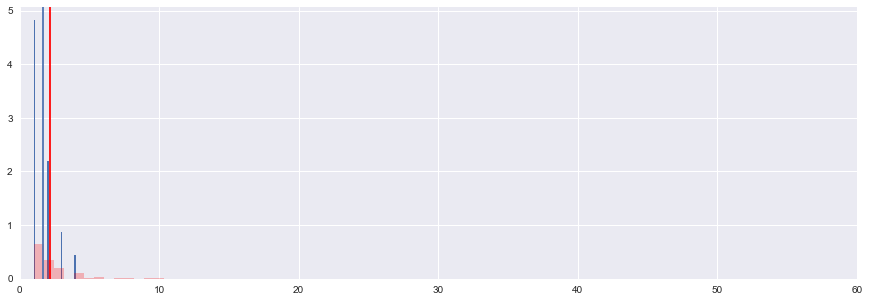

['Royal Arena']
30942
hour= 18
feature event_during_2h_aft


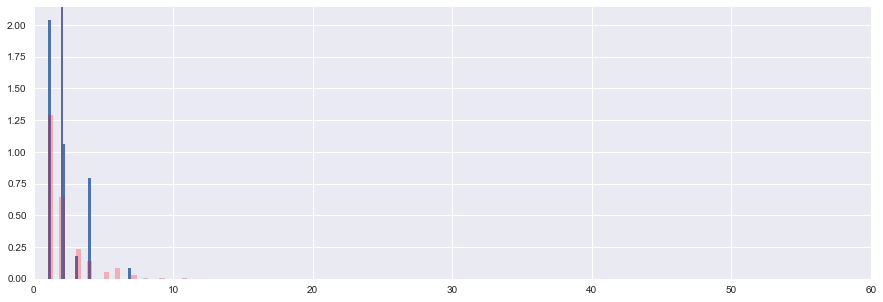

['Royal Arena']
30942
hour= 15
feature event_during_3h_aft


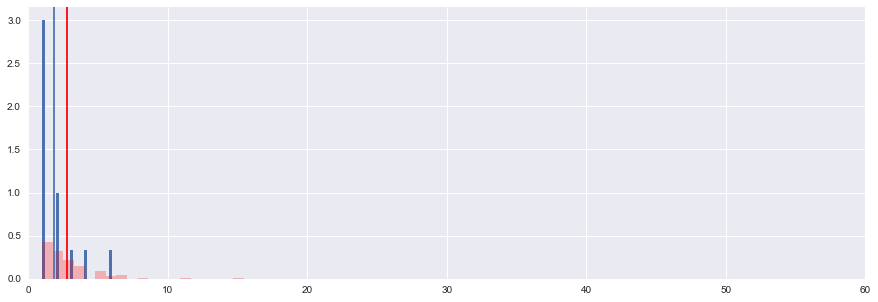

['Royal Arena']
30942
hour= 16
feature event_during_4h_aft


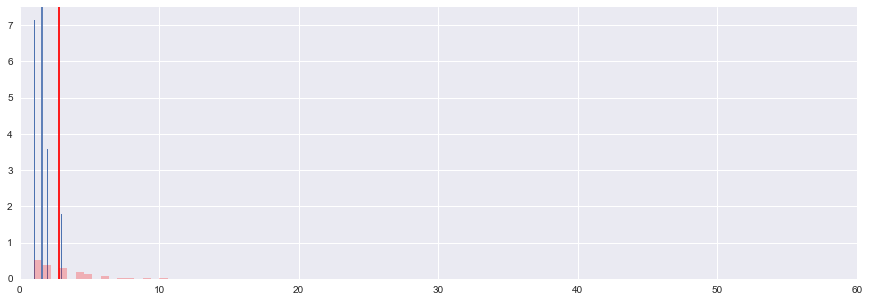

['Royal Arena']
30941
hour= 17
feature event_3h_bef


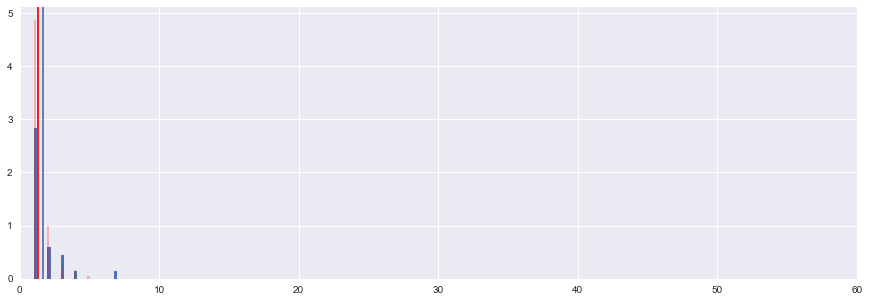

['Royal Arena']
30941
hour= 16
feature event_2h_bef


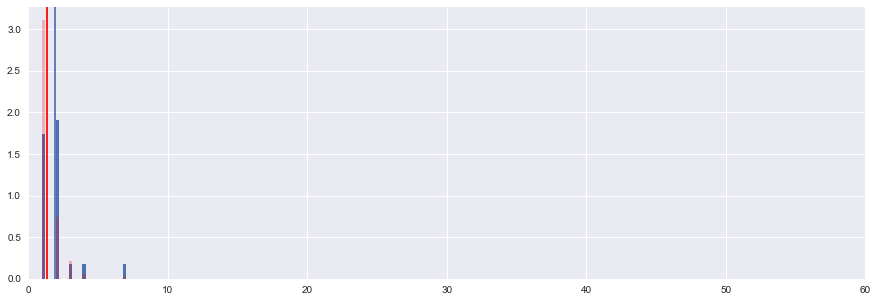

['Royal Arena']
30941
hour= 18
feature event_1h_bef


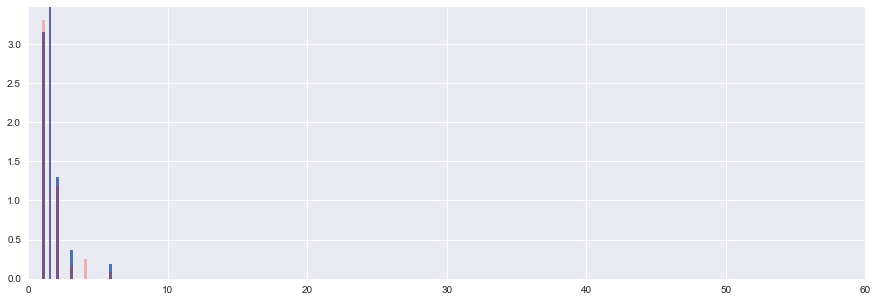

['Royal Arena']
30941
hour= 16
feature event_during_1h_aft


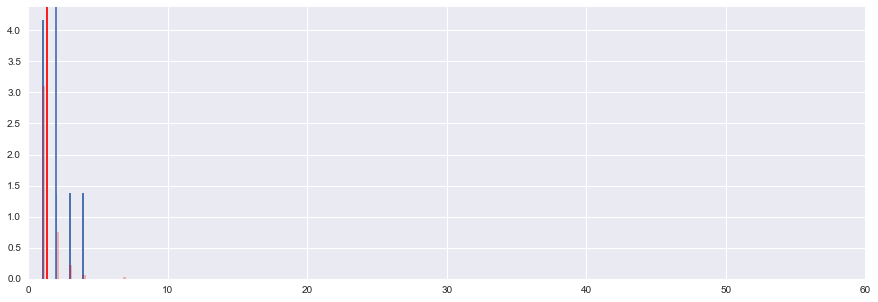

['Royal Arena']
30941
hour= 14
feature event_during_2h_aft


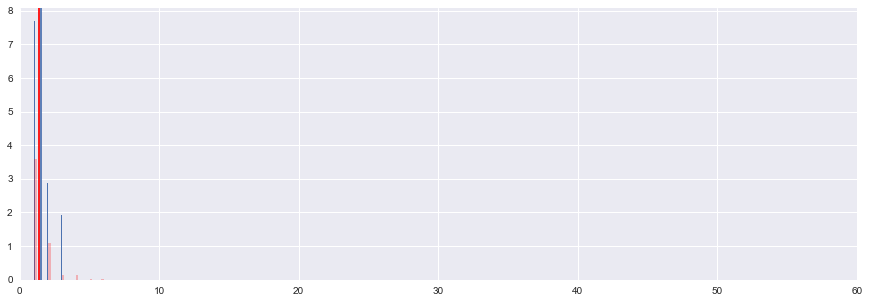

['Royal Arena']
30941
hour= 18
feature event_during_3h_aft


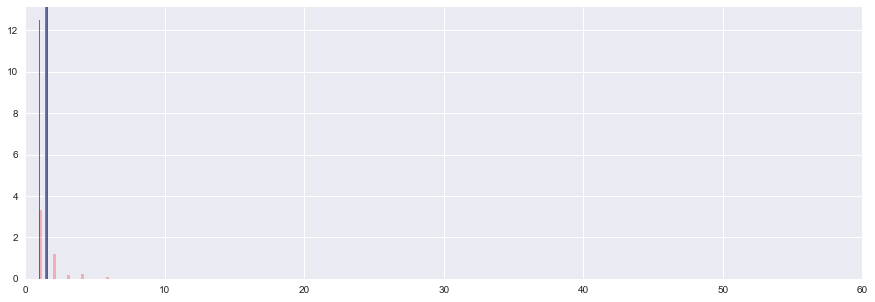

['Royal Arena']
30941
hour= 14
feature event_during_4h_aft


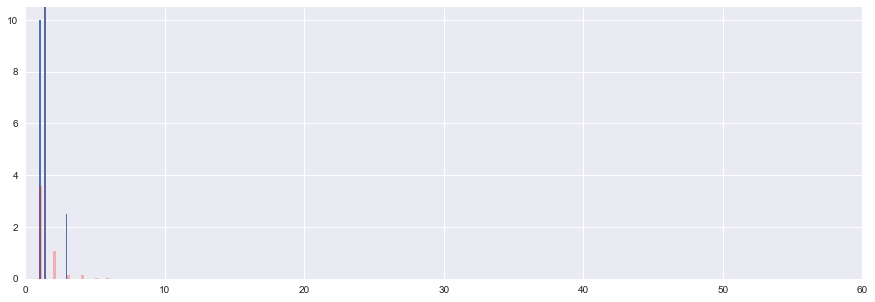

['Royal Arena']
46743
hour= 13
feature event_3h_bef


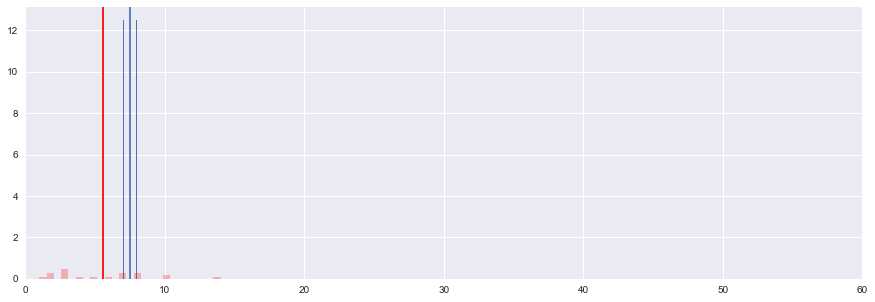

['Royal Arena']
46743
hour= 14
feature event_2h_bef


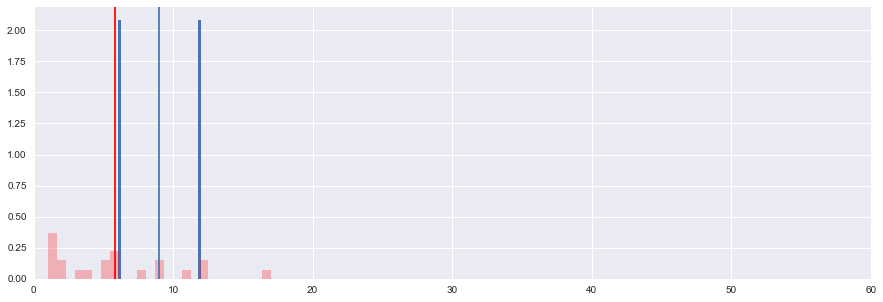

['Royal Arena']
46743
hour= 15
feature event_1h_bef


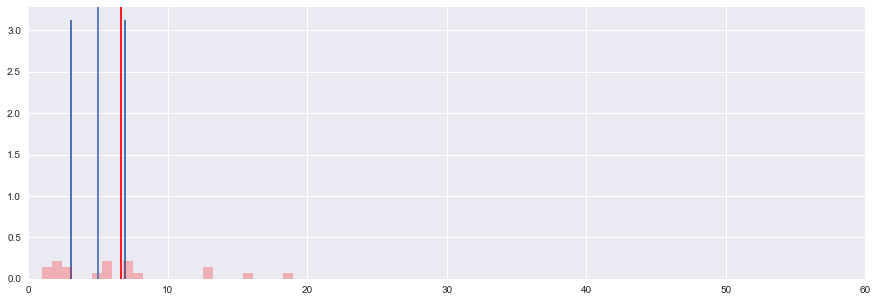

['Royal Arena']
46743
hour= 17
feature event_during_1h_aft


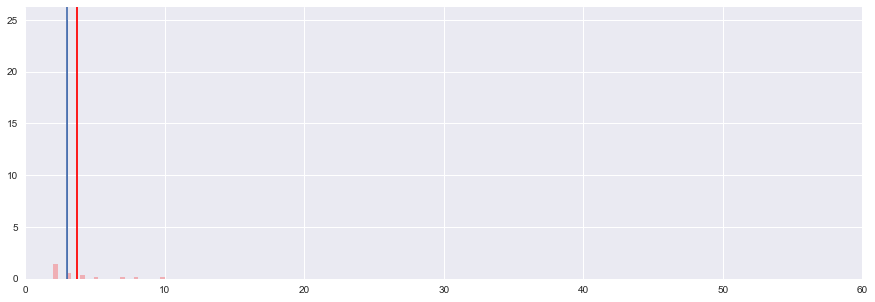

['Royal Arena']
46743
hour= 18
feature event_during_2h_aft


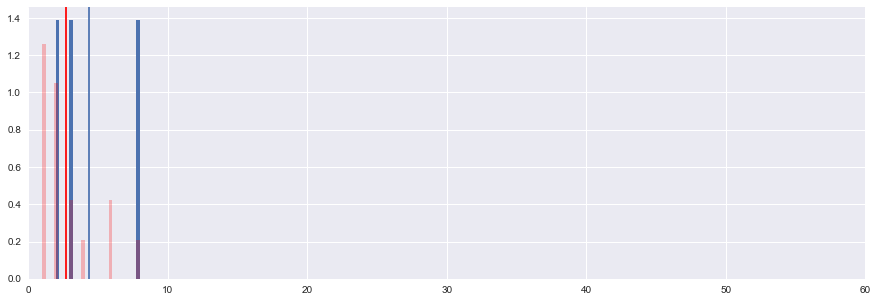

['Royal Arena']
46743
hour= 19
feature event_during_3h_aft


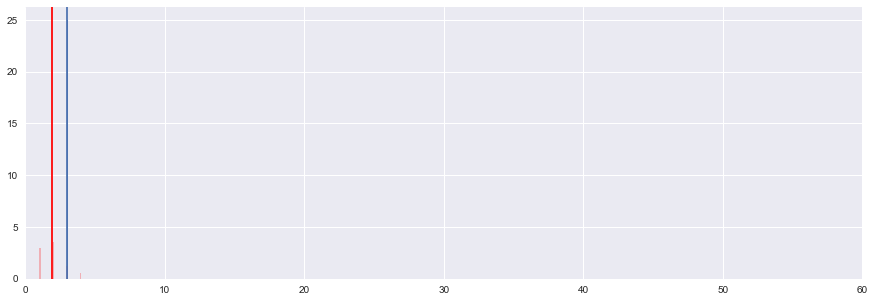

['Royal Arena']
46743
hour= 19
feature event_during_4h_aft


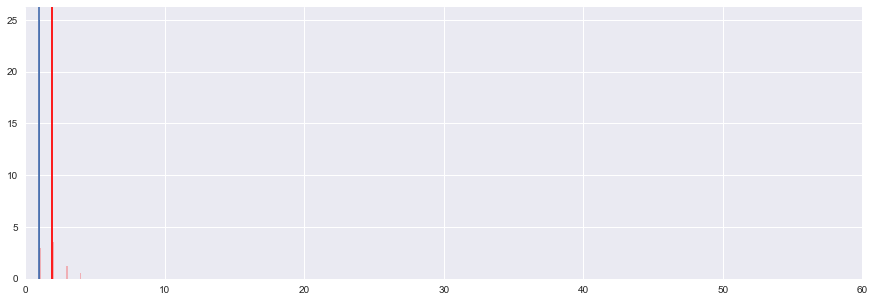

In [9]:
cols=[ 'event_3h_bef','event_2h_bef', 'event_1h_bef','event_during_1h_aft','event_during_2h_aft','event_during_3h_aft','event_during_4h_aft', ]
# cols=[ 'event_3h_bef','event_2h_bef', 'event_1h_bef','event_during' ]

for dataf in dfs:
    print("-----------------------------------------------------------------")
    
    
    for st in dataf.StopPointId.unique():
        dataframe=dataf[dataf['StopPointId']==st]
    
        for c in cols:
            print(dataf.PoiName.unique())
            print(st)
            av=dataframe['hours'][dataframe[c]==1].mode().values
            try:
                print("hour=",av[0])
                print("feature",c)
                plt.hist(dataframe['AlightingPassengerCount'][dataframe[c]==1],normed=True,bins=25)
                plt.hist(dataframe.AlightingPassengerCount[dataframe['hours']==av[0]],normed=True,bins=25,fc=(1, 0, 0, 0.25))
                plt.axvline(x=dataframe.AlightingPassengerCount[dataframe['hours']==av[0]].mean(),color='r')
                plt.axvline(x=dataframe['AlightingPassengerCount'][dataframe[c]==1].mean())
                plt.xlim(0,60)
        #         plt.ylim(0,0.7)
                plt.show()
            except:
                print("Failed",st,dataf.PoiName.unique())

In [28]:
cols=[ 'event_3h_bef','event_2h_bef', 'event_1h_bef','event_during_1h_aft','event_during_2h_aft','event_during_3h_aft','event_during_4h_aft', ]

DF=pd.DataFrame(data={'Stop':  [0] ,'When':  "0" , 'Mean - regular':   [0] ,'Mean - event':   [0] , 'Std - regular':  [0]  ,  'Std - regular':       [0]      })


for dataf in dfs:
    print("-----------------------------------------------------------------")
    print(dataf.PoiName.unique())
    
    
    for st in dataf.StopPointId.unique():
        dataframe=dataf[dataf['StopPointId']==st]
    
        for c in cols:
            try:
                avT=dataframe['hours'][dataframe[c]==1].mode().values
                avN=dataframe.AlightingPassengerCount[dataframe['hours']==avT[0]].mean()
                avE=dataframe['AlightingPassengerCount'][dataframe[c]==1].mean()
                stdN=np.std(dataframe.AlightingPassengerCount[dataframe['hours']==avT[0]])
                stdE=np.std(dataframe['AlightingPassengerCount'][dataframe[c]==1])
                stdN=round(stdN,1)
                stdE=round(stdE,1)
                avN=round(avN,1)
                avE=round(avE,1)
                if (avE-avN)>1:
                    print(avT,st,c,"ev=",avE,"Normal=",avN,"difference", round(avE-avN,1))
                    print("normal",np.std(dataframe.AlightingPassengerCount[dataframe['hours']==avT[0]]))
                    print("ev",np.std(dataframe['AlightingPassengerCount'][dataframe[c]==1]))
                    df=pd.DataFrame({'Stop':  [st],'When':  [c], 'Mean - regular':  avN  ,'Mean - event':   avE , 'Std - regular':  stdN  ,  'Std - regular':stdN      })
                    DF=DF.append(df)
                    
            except:
                print("failed",st)
                
print(DF)

-----------------------------------------------------------------
['Forum']
[ 6 17] 678 event_3h_bef ev= 12.7 Normal= 3.8 difference 8.9
normal 2.5050936802781254
ev 7.686875895577278
[18] 678 event_2h_bef ev= 14.3 Normal= 13.1 difference 1.2
normal 5.188081708065523
ev 8.215742044164676
[8] 678 event_1h_bef ev= 12.6 Normal= 7.5 difference 5.1
normal 5.0338420081698025
ev 7.4448439560955375
[10] 678 event_during_1h_aft ev= 10.6 Normal= 4.9 difference 5.7
normal 2.9353643413898474
ev 8.090511850423097
[11] 678 event_during_2h_aft ev= 9.1 Normal= 6.4 difference 2.7
normal 3.5918688109906975
ev 5.870476392490837
[12 13] 678 event_during_4h_aft ev= 10.9 Normal= 8.3 difference 2.6
normal 3.763942876905474
ev 6.577346641852177
[18] 715 event_2h_bef ev= 4.8 Normal= 2.8 difference 2.0
normal 2.534714501349018
ev 3.2147431127387556
[10] 715 event_during_1h_aft ev= 4.2 Normal= 2.6 difference 1.6
normal 1.8595797335738937
ev 3.3085866411702414
failed 50822
failed 50822
failed 50822
--------------

# Forum 1,2h after start 

In [85]:
forum=dfs[0]
forum['isEvent']=forum['event_during_1h_aft']+forum['event_during_2h_aft']
forum_ev=forum[forum['isEvent']>0]

avT1=np.percentile(forum_ev['hours'],40)
avT2=np.percentile(forum_ev['hours'],60)

forumN=forum[forum['hours']>=avT1]
forumN=forumN[forumN['hours']<=avT2]

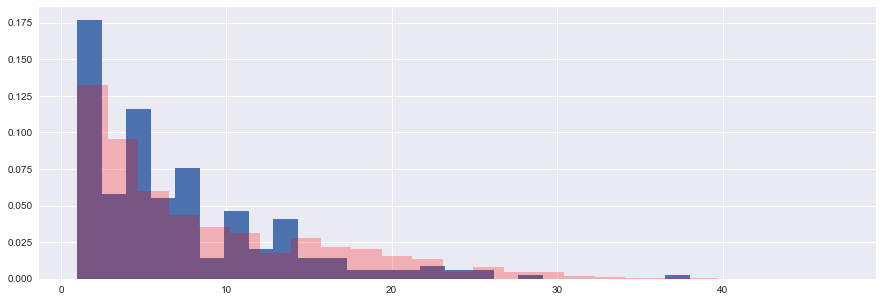

In [86]:
plt.hist(forum_ev['AlightingPassengerCount'],normed=True,bins=25);
plt.hist(forumN.AlightingPassengerCount,normed=True,bins=25,fc=(1, 0, 0, 0.25));

# Parken 1,2h before

In [89]:
parken=dfs[2]
parken['isEvent']=parken['event_1h_bef']+parken['event_2h_bef']
parken_ev=parken[parken['isEvent']>0]

avT1=np.percentile(parken_ev['hours'],25)
avT2=np.percentile(parken_ev['hours'],75)

parkenN=parken[parken['hours']>=avT1]
parkenN=parken[parken['hours']<=avT2]

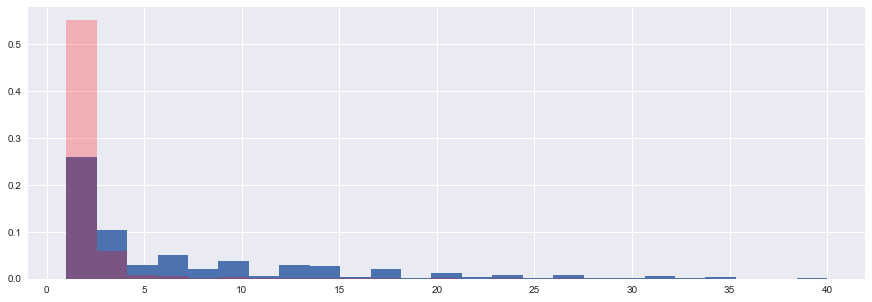

In [90]:
plt.hist(parken_ev['AlightingPassengerCount'],normed=True,bins=25);
plt.hist(parkenN.AlightingPassengerCount,normed=True,bins=25,fc=(1, 0, 0, 0.25));

In [4]:
al['isEvent']=al['event_1h_aft']+al['event_2h_aft']+al['event_1h_bef']+al['event_2h_bef']+al['event_3h_aft']+al['event_3h_bef']+al['event_4h_bef']
al['isEvent']= al['isEvent'].apply(lambda x: 1 if x > 0 else 0)

In [5]:
#average arrivals per stop
for name in al.PoiName.unique():
    al_ve=al[al['PoiName']==name]
    for st in al_ve.StopPointId.unique():
        al_st=al_ve[al_ve['StopPointId']==st]
        print("name: ",name)
        print("stop: ", st)
        print("mean: ", np.mean(al_st.AlightingPassengerCount))
        print("------------------------------------")

name:  Forum
stop:  678
mean:  8.9152452730398
------------------------------------
name:  Forum
stop:  715
mean:  2.65417206659356
------------------------------------
name:  Forum
stop:  50822
mean:  0.8136363636363636
------------------------------------
name:  Vega
stop:  1586
mean:  3.025171828974382
------------------------------------
name:  Vega
stop:  7081
mean:  2.4398507926639725
------------------------------------
name:  Vega
stop:  1547
mean:  2.1381602804303155
------------------------------------
name:  Bella Center
stop:  27999
mean:  2.606927104309303
------------------------------------
name:  Bella Center
stop:  28005
mean:  2.4045760138798524
------------------------------------
name:  Bella Center
stop:  28000
mean:  1.3598357596117954
------------------------------------
name:  DR Koncerthuset
stop:  27548
mean:  1.9023591087811271
------------------------------------
name:  DR Koncerthuset
stop:  860
mean:  1.3549257759784075
------------------------------------

In [6]:
df_one_venue=[]
for venue in al['PoiName'].unique():
    df=al[al['PoiName']==venue]
    df_one_venue.append(df)

In [7]:
#Groupe to have all the stops per each venue

list_al_ven=[]
for name in al.PoiName.unique():
    al_ve=al[al['PoiName']==name]
    list_al_ven.append(al_ve)
    
    
list_al_grouped=[]
for df in list_al_ven:
    df1=df.groupby('TimeStep')[['AlightingPassengerCount', 'AlightingPassengerCount_lag1',
       'AlightingPassengerCount_lag2', 'AlightingPassengerCount_lag3',
       'AlightingPassengerCount_lag4', 'AlightingPassengerCount_lag5']].sum()

    df2=df.groupby('TimeStep')[['event_1h_aft',
       'event_1h_bef', 'event_2h_aft', 'event_2h_bef', 'event_3h_aft',
       'event_3h_bef', 'event_4h_bef', 'topic_0', 'topic_1', 'topic_2',
       'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7'
                                , 'h_0', 'h_1', 'h_2', 'h_3', 'h_4', 'h_5',
       'h_6', 'h_7', 'h_8', 'h_9', 'h_10', 'h_11', 'h_12', 'h_13', 'h_14',
       'h_15', 'h_16', 'h_17', 'h_18', 'h_19', 'h_20', 'h_21', 'h_22', 'h_23',
       'isWeekend',"isEvent",
        'tod_0_to_2', 'tod_3_to_5', 'tod_6_to_8',
       'tod_9_to_11', 'tod_12_to_14', 'tod_15_to_17', 'tod_18_to_20',
       'tod_21_to_23',"hours"
                               ]].mean()
    
    df1.reset_index(inplace=True)
    df2.reset_index(inplace=True)
    
    df_grouped=pd.merge(df1,df2, on='TimeStep')
    
    list_al_grouped.append(df_grouped)
    
for i in range(6):
    list_al_grouped[i]['PoiName']=list_al_ven[i]['PoiName'][0]

In [44]:
for df in list_al_grouped:
    print(df.PoiName.iloc[0])
    print("Length:",len(df))
    print("Mean passengers:",df.AlightingPassengerCount.mean())
    print("\n")

Forum
Length: 15414
Mean passengers: 10.487543791358505


Vega
Length: 13323
Mean passengers: 5.638895143736396


Bella Center
Length: 12653
Mean passengers: 4.086777839247609


DR Koncerthuset
Length: 8888
Mean passengers: 2.3146939693969397


Royal Arena
Length: 6308
Mean passengers: 2.2346227013316424


Parken
Length: 5348
Mean passengers: 2.512154076290202




In [20]:
list_event_per_ven=[]
for name in ev.venue_unique.unique():
    ev_1ve=ev[ev['venue_unique']==name]
    list_event_per_ven.append(ev_1ve)

In [24]:
for df in list_event_per_ven:
    print(df.venue_unique.iloc[0])
    print("Number of events:" ,len(df) )
    print("\n")

DrKoncerthuset
Number of events: 438


ForumCopenhagen
Number of events: 116


RoyalArena
Number of events: 83


Vega
Number of events: 579


TeliaParken
Number of events: 176


BellaCenter
Number of events: 88




### Distribution Analysis

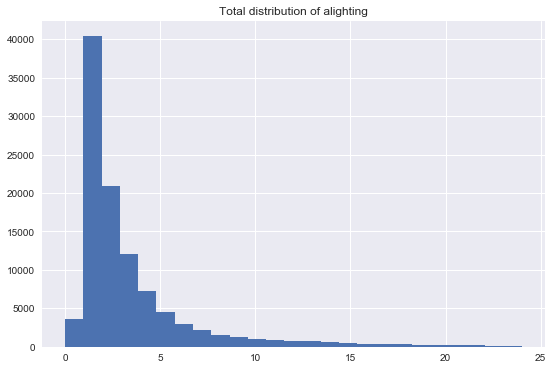

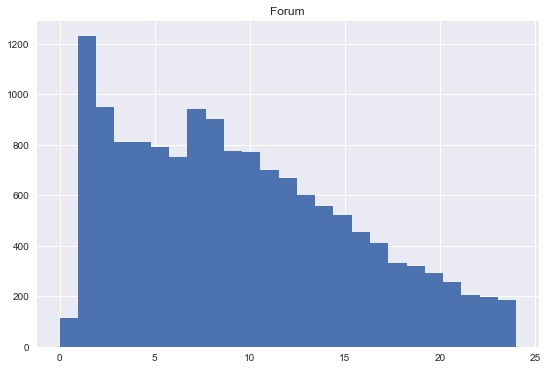

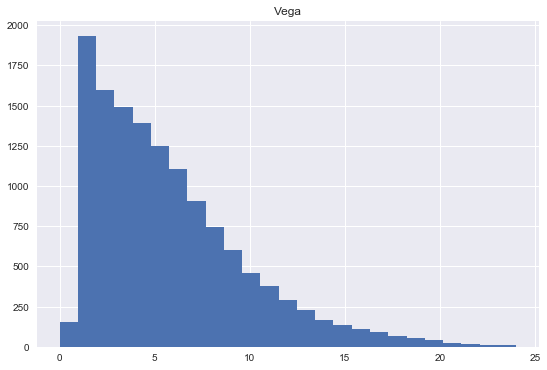

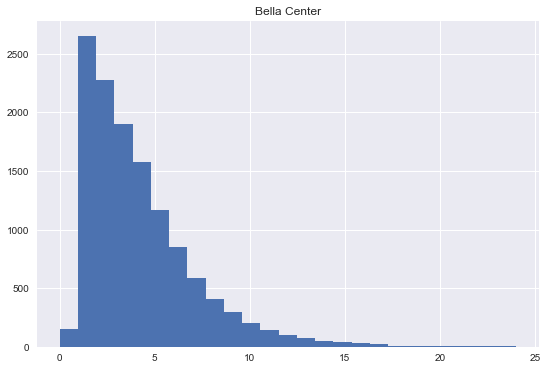

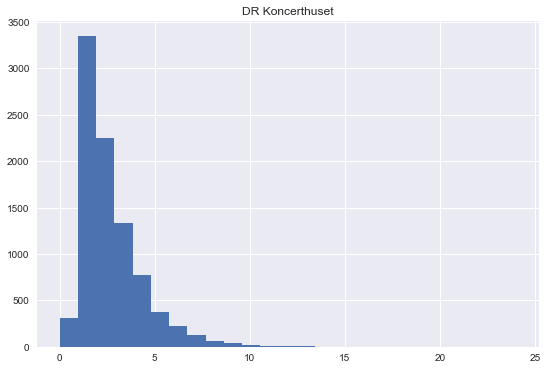

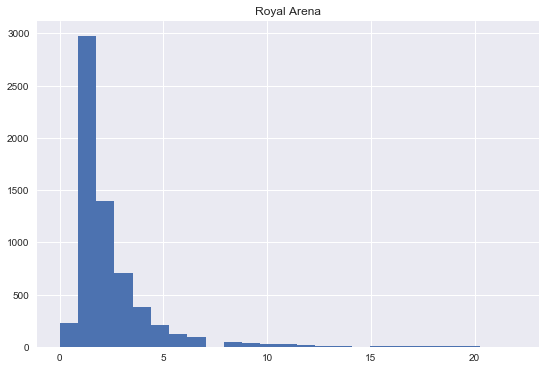

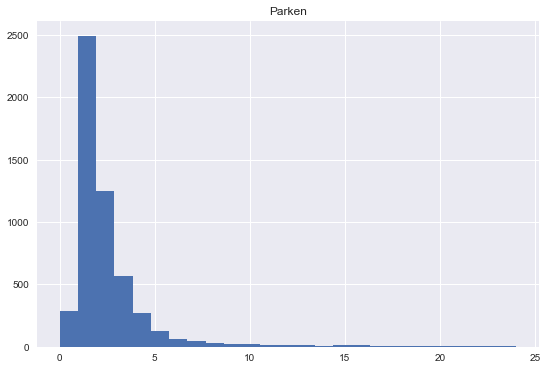

In [41]:
plt.rcParams['figure.figsize'] = (9, 6)

# distribution of alighting 
plt.hist(al.AlightingPassengerCount[al['AlightingPassengerCount']<25],bins=25)
plt.title("Total distribution of alighting")
plt.show()

for df in list_al_grouped:
    plt.hist(df.AlightingPassengerCount[df['AlightingPassengerCount']<25],bins=25)
    plt.title(df.PoiName.iloc[0])
    plt.show()

# Analysis Abnormal Values

In [9]:
ev17=ev[ev['starting_time'].dt.year==2017]
ev17=ev17[ev17['starting_time'].dt.month==11]
ev17=ev17[ev17['starting_time'].dt.day==11]
ev17

description  \
404   modeselektor-dr-koncerthuset-studie-1   
1156                carl-emil-petersen-vega   
1374                                   None   
1375                                   None   
1468                               Bogforum   
1469                               Bogforum   

                                              eventname       starting_time  \
404   Modeselektor + Support: Kenton Slash Demon / A... 2017-11-11 22:00:00   
1156                          Carl Emil Petersen - VEGA 2017-11-11 20:00:00   
1374  Denmark vs Republic of Ireland - World Cup 201... 2017-11-11 00:00:00   
1375  Denmark vs Republic of Ireland, Russia 2018 qu... 2017-11-11 20:45:00   
1468                                           Bogforum 2017-11-11 10:00:00   
1469                                           Bogforum 2017-11-11 14:00:00   

                              venue    venue_unique        deltaTime  
404                 DR Koncerthuset  DrKoncerthuset  7 days 01:00:00  
1156                           VEGA            Vega  1 days 00:00:00  
1374  Telia Parken (Parken Stadium)     TeliaParken  5 days 06:00:00  
1375  Telia Parken (Parken Stadium)     TeliaParken  0 days 20:45:00  
1468                    BellaCenter     BellaCenter                0  
1469                    BellaCenter     BellaCenter                0

name:  Forum
distribution of values


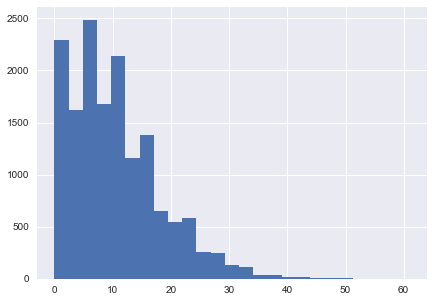

distribution of values after the 99th percentile


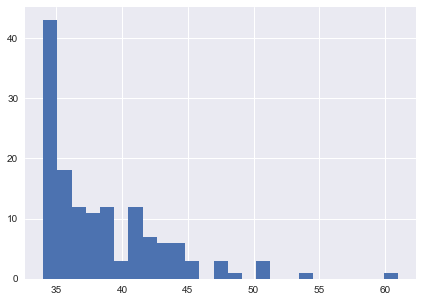

frequency of the values, after the 99th perc 
Counter({34: 25, 35: 18, 36: 18, 39: 12, 37: 12, 41: 12, 38: 11, 42: 7, 44: 6, 43: 6, 51: 3, 40: 3, 45: 3, 47: 2, 61: 1, 48: 1, 49: 1, 54: 1})
date of these <outlyer>
                 TimeStep  AlightingPassengerCount  isEvent
1608  2017-02-09 15:30:00                       44        0
1611  2017-02-09 17:00:00                       43        0
1659  2017-02-10 19:00:00                       42        1
3149  2017-03-18 17:30:00                       41        0
3150  2017-03-18 18:00:00                       41        0
5819  2017-05-21 18:00:00                       61        1
5820  2017-05-21 18:30:00                       44        1
6233  2017-05-31 14:30:00                       43        0
6235  2017-05-31 15:30:00                       41        0
6279  2017-06-01 15:30:00                       41        0
6280  2017-06-01 16:00:00                       48        0
6281  2017-06-01 16:30:00                       43        0
6527  2

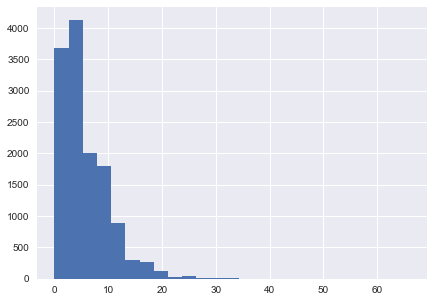

distribution of values after the 99th percentile


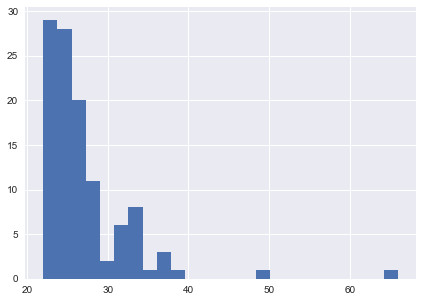

frequency of the values, after the 99th perc 
Counter({22: 17, 25: 15, 26: 14, 24: 13, 23: 12, 28: 8, 27: 6, 33: 5, 31: 4, 37: 3, 29: 3, 34: 3, 30: 2, 32: 2, 36: 1, 49: 1, 38: 1, 66: 1})
date of these <outlyer>
                 TimeStep  AlightingPassengerCount  isEvent
1213  2017-02-03 18:30:00                       31        1
1954  2017-02-23 19:00:00                       37        1
2351  2017-03-06 09:30:00                       36        0
2715  2017-03-16 10:30:00                       33        0
2945  2017-03-22 15:00:00                       31        0
3191  2017-03-29 16:00:00                       28        0
3887  2017-04-18 10:00:00                       33        0
3969  2017-04-20 15:30:00                       27        0
4225  2017-04-27 15:30:00                       30        0
4511  2017-05-05 14:30:00                       29        1
4620  2017-05-08 12:30:00                       34        0
4957  2017-05-17 16:00:00                       28        0
5440  201

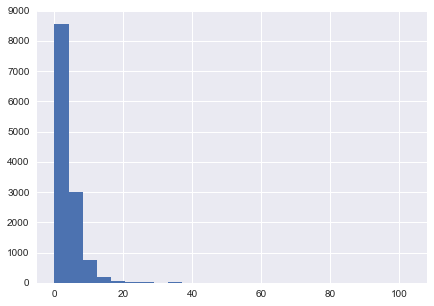

distribution of values after the 99th percentile


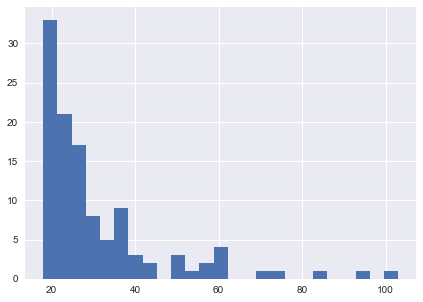

frequency of the values, after the 99th perc 
Counter({18: 10, 22: 9, 20: 8, 21: 8, 19: 7, 24: 7, 25: 6, 23: 5, 26: 5, 36: 4, 27: 4, 37: 3, 30: 3, 34: 3, 31: 3, 28: 2, 45: 2, 38: 2, 49: 2, 29: 2, 62: 2, 41: 2, 39: 1, 50: 1, 52: 1, 103: 1, 61: 1, 70: 1, 93: 1, 75: 1, 83: 1, 58: 1, 56: 1, 32: 1, 59: 1, 33: 1})
date of these <outlyer>
                 TimeStep  AlightingPassengerCount  isEvent
1492  2017-02-16 09:30:00                       39        1
1493  2017-02-16 10:00:00                       36        1
1529  2017-02-17 09:30:00                       50        1
1566  2017-02-18 09:30:00                       45        1
1567  2017-02-18 10:00:00                       38        1
1568  2017-02-18 10:30:00                       37        1
1941  2017-03-01 08:00:00                       49        1
1942  2017-03-01 08:30:00                       36        1
1943  2017-03-01 09:00:00                       38        1
1973  2017-03-02 08:00:00                       36        1
1974  

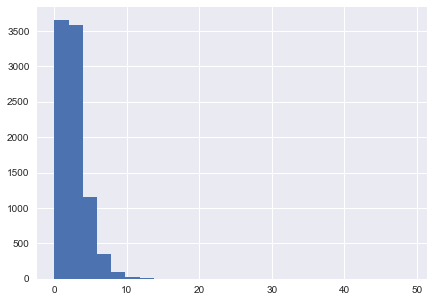

distribution of values after the 99th percentile


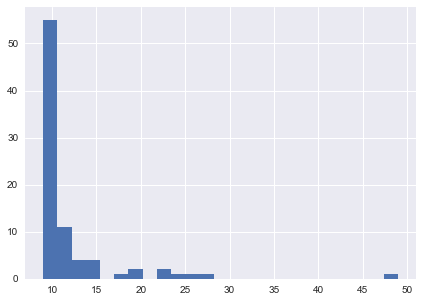

frequency of the values, after the 99th perc 
Counter({9: 37, 10: 18, 12: 6, 11: 5, 13: 4, 15: 3, 23: 2, 20: 2, 24: 1, 25: 1, 17: 1, 14: 1, 49: 1, 28: 1})
date of these <outlyer>
                TimeStep  AlightingPassengerCount  isEvent
1132 2017-02-17 14:30:00                       23        0
1709 2017-03-13 10:30:00                       12        0
1711 2017-03-13 11:30:00                       24        0
2149 2017-03-30 16:00:00                       20        0
3691 2017-06-04 15:00:00                       15        0
3754 2017-06-07 08:30:00                       25        0
4096 2017-06-20 17:30:00                       13        0
4373 2017-07-01 15:00:00                       12        0
4445 2017-07-04 14:30:00                       20        0
5060 2017-08-01 11:00:00                       17        0
5273 2017-08-10 13:30:00                       13        0
5555 2017-08-22 08:00:00                       15        0
6033 2017-09-09 13:00:00                       13     

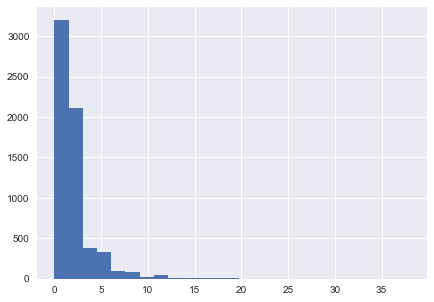

distribution of values after the 99th percentile


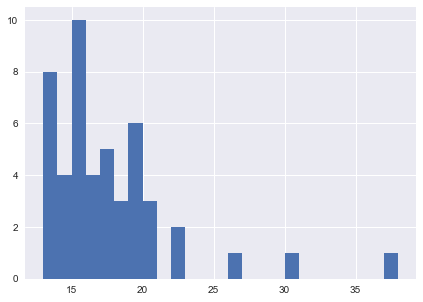

frequency of the values, after the 99th perc 
Counter({15: 10, 13: 8, 19: 6, 17: 5, 14: 4, 16: 4, 18: 3, 20: 3, 22: 2, 38: 1, 26: 1, 30: 1})
date of these <outlyer>
                TimeStep  AlightingPassengerCount  isEvent
157  2017-01-19 09:00:00                       22        0
1984 2017-04-28 08:30:00                       19        0
1988 2017-04-28 11:00:00                       18        0
2097 2017-05-03 08:30:00                       18        0
2104 2017-05-03 14:00:00                       38        0
2251 2017-05-10 08:30:00                       22        0
3016 2017-06-14 13:30:00                       19        0
4324 2017-08-11 15:00:00                       26        0
4581 2017-08-23 12:30:00                       19        0
5342 2017-11-07 15:30:00                       20        0
5426 2017-11-13 08:30:00                       30        0
5830 2017-12-13 08:30:00                       19        1
6006 2017-12-21 11:00:00                       19        0
6017 2017

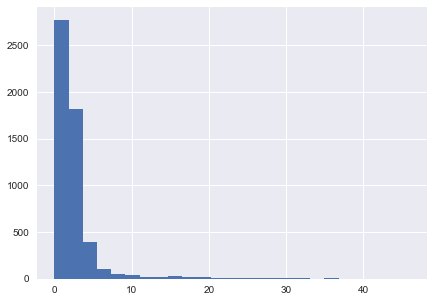

distribution of values after the 99th percentile


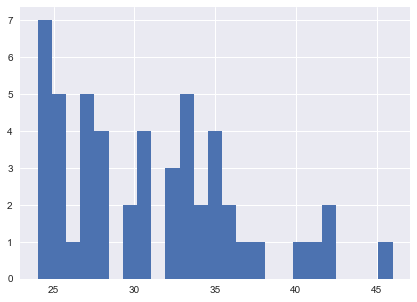

frequency of the values, after the 99th perc 
Counter({24: 7, 27: 5, 33: 5, 25: 5, 28: 4, 35: 4, 31: 4, 32: 3, 30: 2, 34: 2, 36: 2, 42: 2, 37: 1, 26: 1, 38: 1, 46: 1, 40: 1, 41: 1})
date of these <outlyer>
                TimeStep  AlightingPassengerCount  isEvent
840  2017-02-23 19:00:00                       35        1
1133 2017-03-12 16:30:00                       35        1
1134 2017-03-12 17:00:00                       35        1
1695 2017-04-23 17:00:00                       37        1
2329 2017-05-31 18:30:00                       34        1
3569 2017-08-26 15:30:00                       36        1
3571 2017-08-26 16:30:00                       42        1
3835 2017-09-10 15:00:00                       42        1
3836 2017-09-10 15:30:00                       38        1
3917 2017-09-14 17:00:00                       35        1
3918 2017-09-14 17:30:00                       46        1
4063 2017-09-23 16:30:00                       40        1
4064 2017-09-23 17:00:00   

In [43]:
plt.rcParams['figure.figsize'] = (7, 5)
for df in list_al_grouped:
    print("name: ",df['PoiName'].loc[0])
    print("distribution of values")
#     sns.distplot(df.AlightingPassengerCount)
    plt.hist(df.AlightingPassengerCount, bins=25)
    plt.show()
    print("distribution of values after the 99th percentile")
    plt.hist(df['AlightingPassengerCount'][df['AlightingPassengerCount']>np.percentile(df.AlightingPassengerCount, 99)], bins=25)
    plt.show()
    print("frequency of the values, after the 99th perc ")
    counter=collections.Counter(df['AlightingPassengerCount'][df['AlightingPassengerCount']> np.percentile(df.AlightingPassengerCount, 99)])
    print(counter)
    print("date of these <outlyer>")
    print(df[['TimeStep', 'AlightingPassengerCount', 'isEvent']][df['AlightingPassengerCount']> np.percentile(df.AlightingPassengerCount, 99.7)])
    print(len(df[df['AlightingPassengerCount']> np.percentile(df.AlightingPassengerCount, 99.7)]))
    print(sum(df['isEvent'][df['AlightingPassengerCount']> np.percentile(df.AlightingPassengerCount, 99.7)]))
    print(sum(df['isEvent'][df['AlightingPassengerCount']> np.percentile(df.AlightingPassengerCount, 99.7)])*100/len(df[df['AlightingPassengerCount']> np.percentile(df.AlightingPassengerCount, 99.7)]))
    
    
    print("================================================================================================")

# Plot arrivals on event date 

In [11]:
allAlighting=pd.concat(list_al_grouped)

In [12]:
allAlighting['hours']=allAlighting['TimeStep'].dt.hour

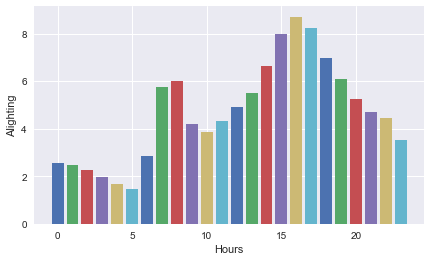

In [40]:
plt.rcParams['figure.figsize'] = (7, 4)

for i in range(24):
    plt.bar(i,np.mean(allAlighting['AlightingPassengerCount'][allAlighting['hours']==i]))
    plt.xlabel("Hours")
    plt.ylabel("Alighting")
plt.show()

In [14]:
ven_name_pass=[]

for i in range(len(list_al_grouped)):
    ven_name_pass.append(list_al_grouped[i]['PoiName'][0])
    
ven_name_ev=ev.venue_unique.unique()

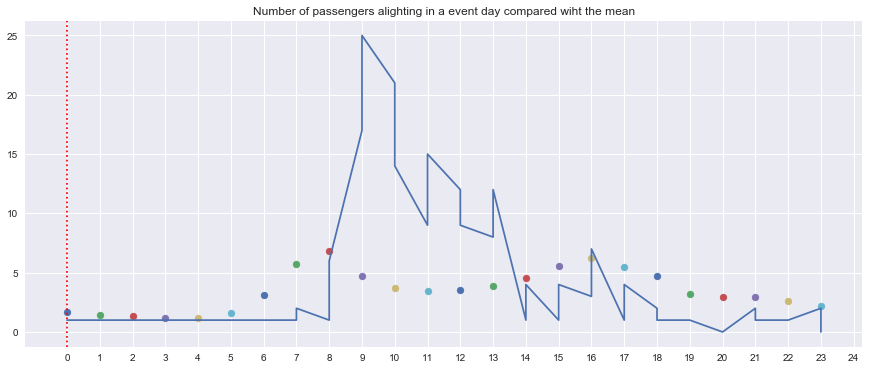

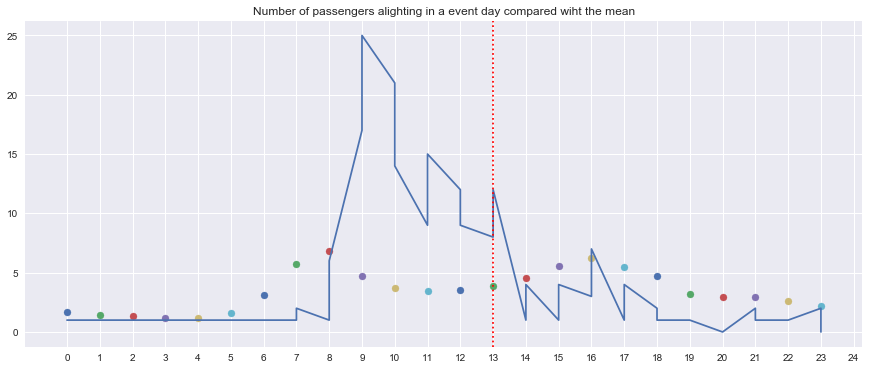

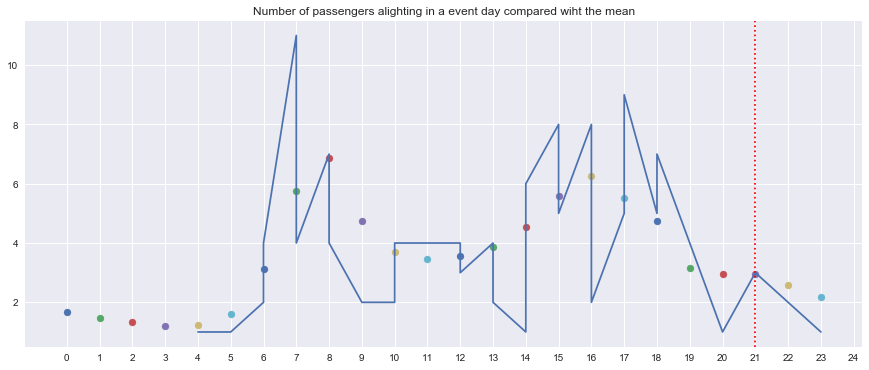

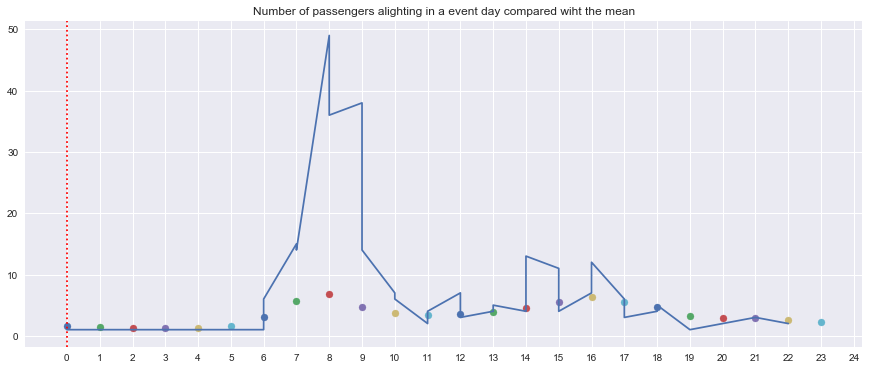

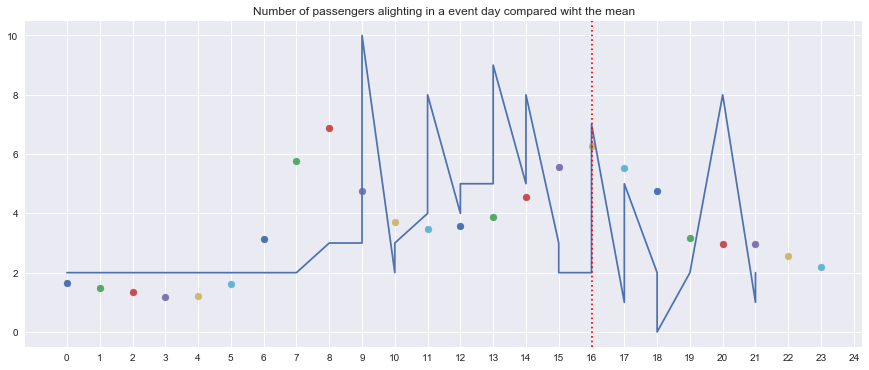

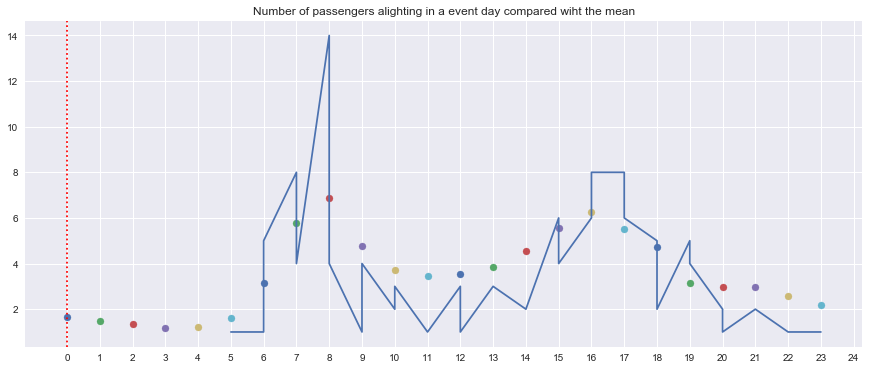

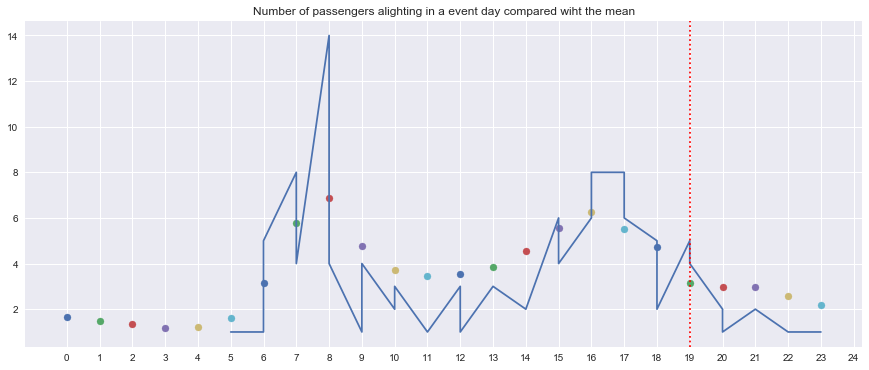

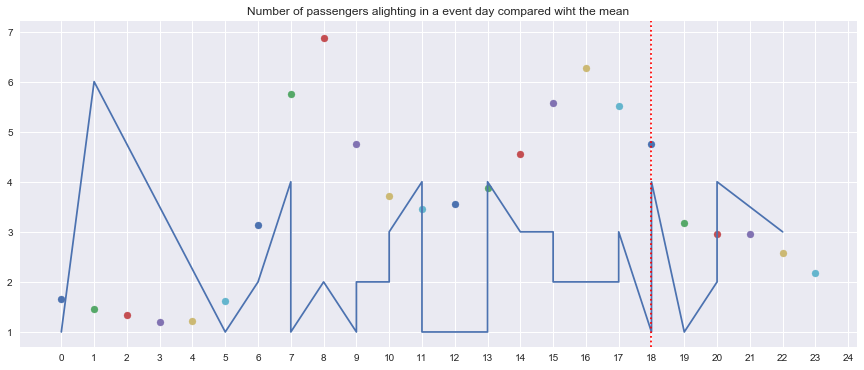

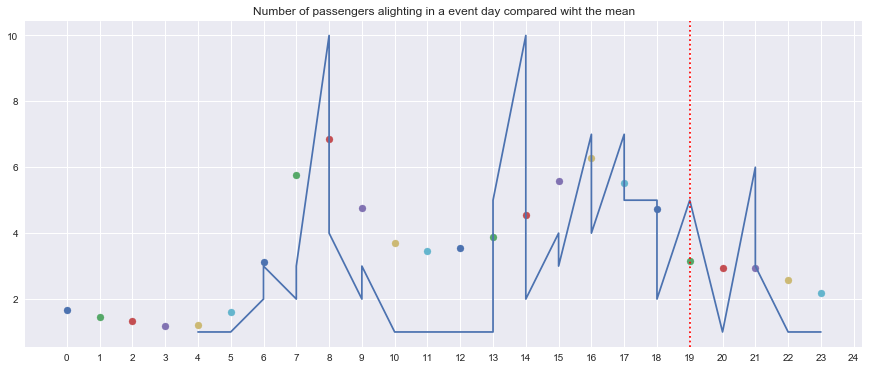

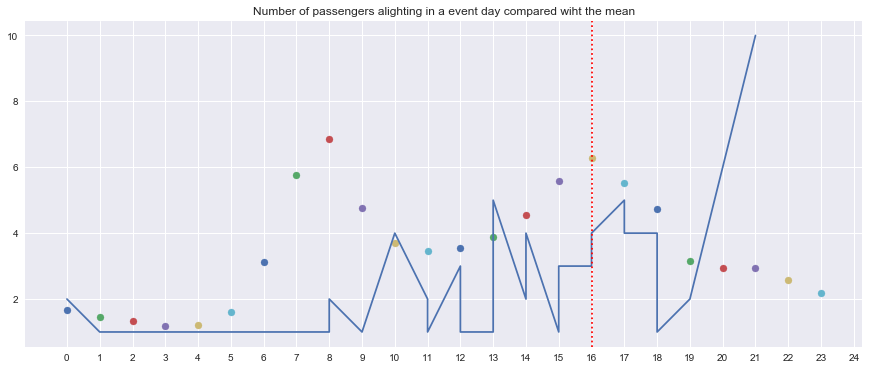

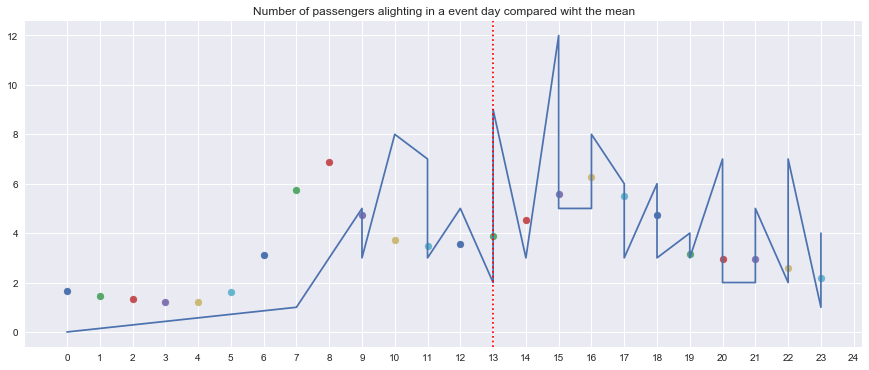

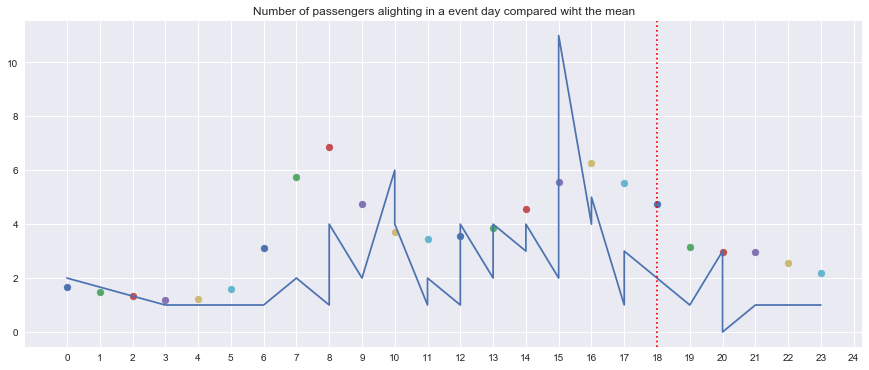

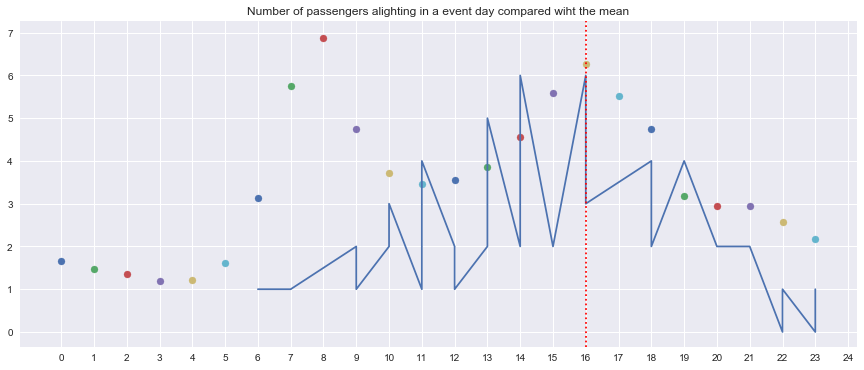

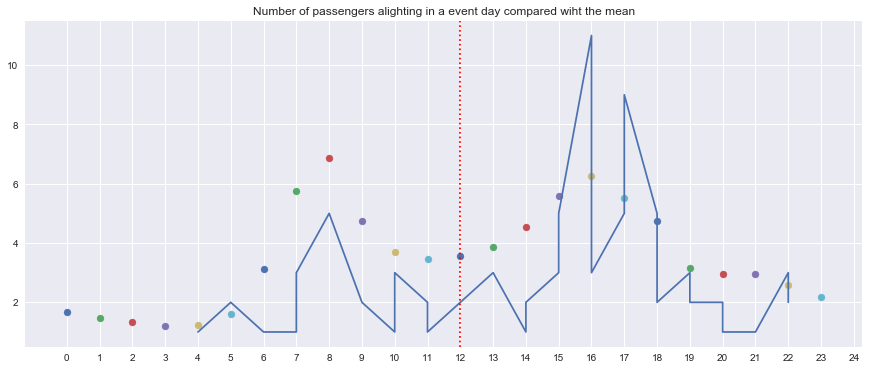

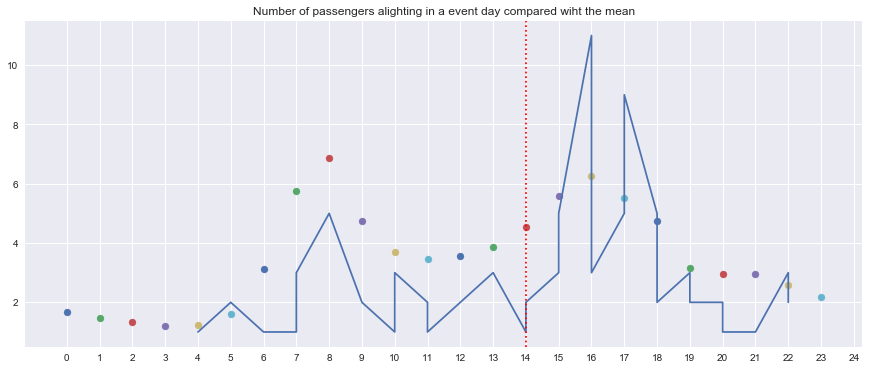

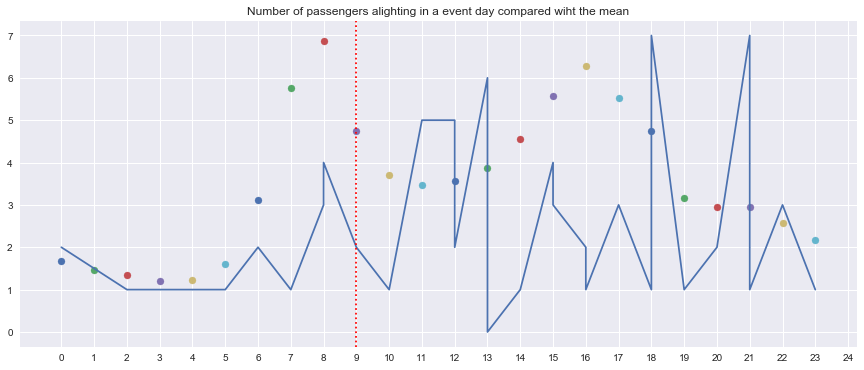

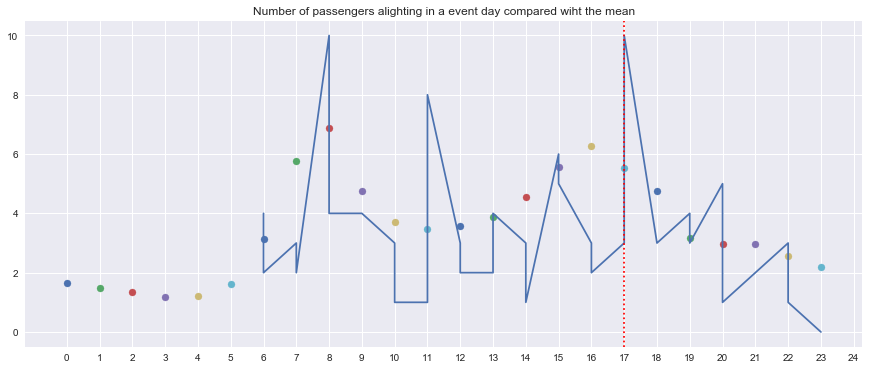

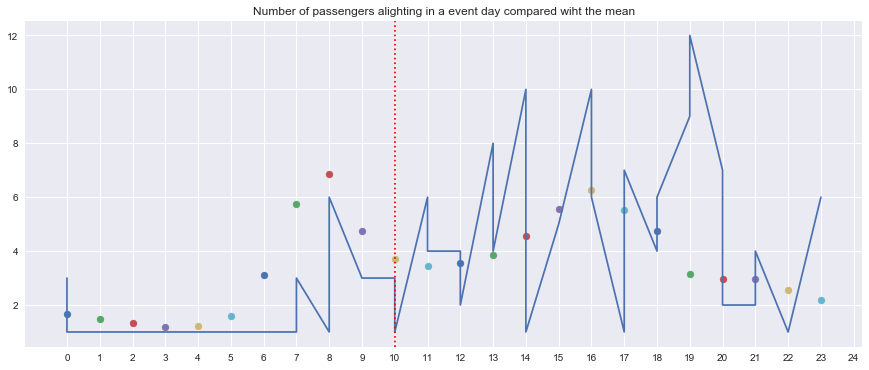

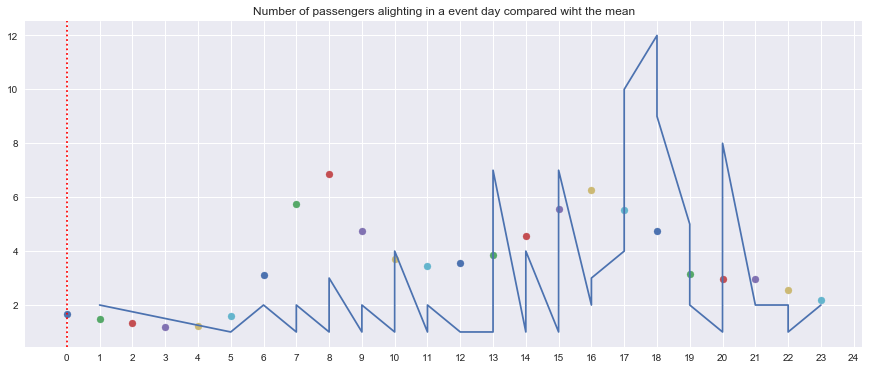

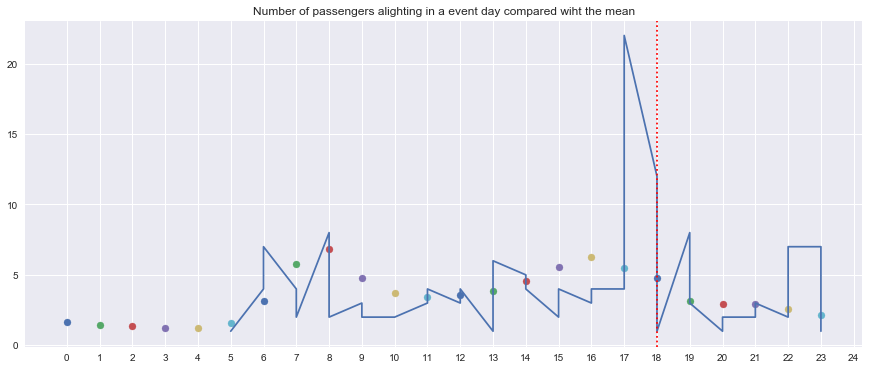

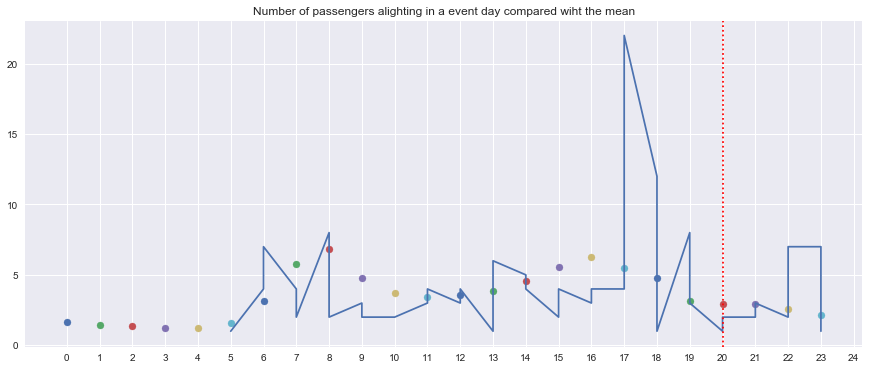

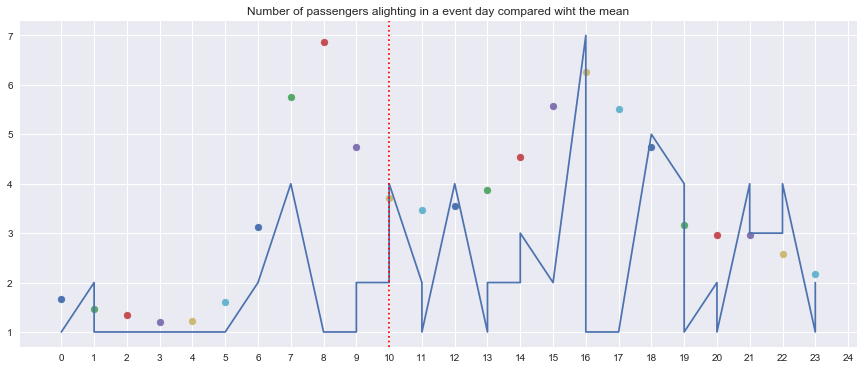

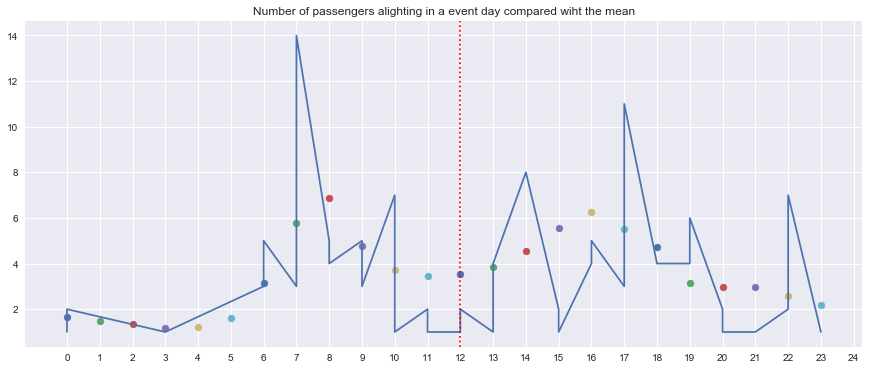

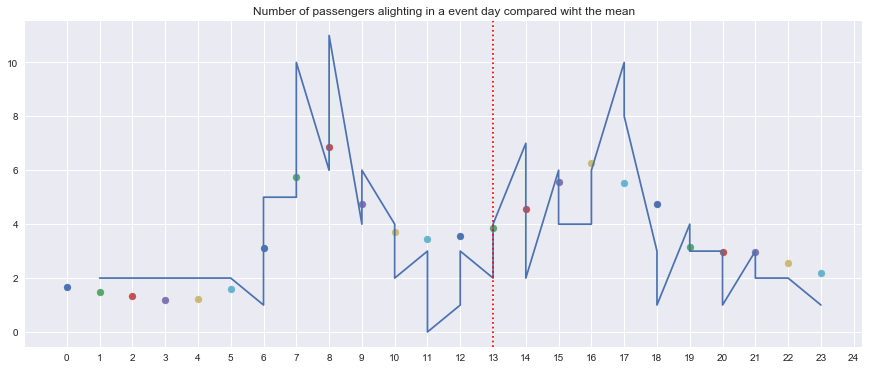

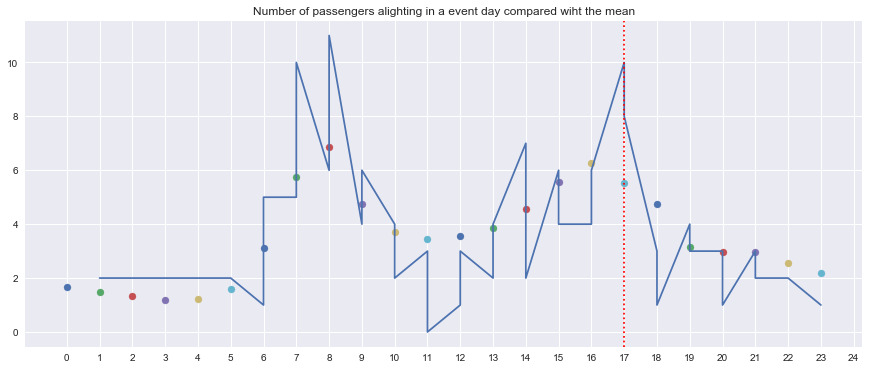

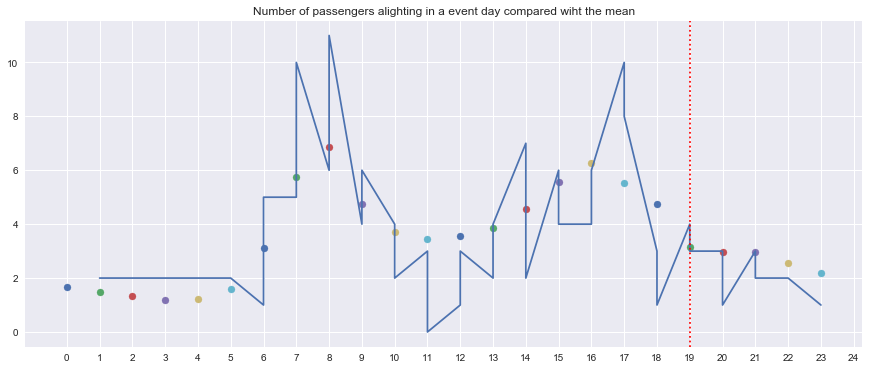

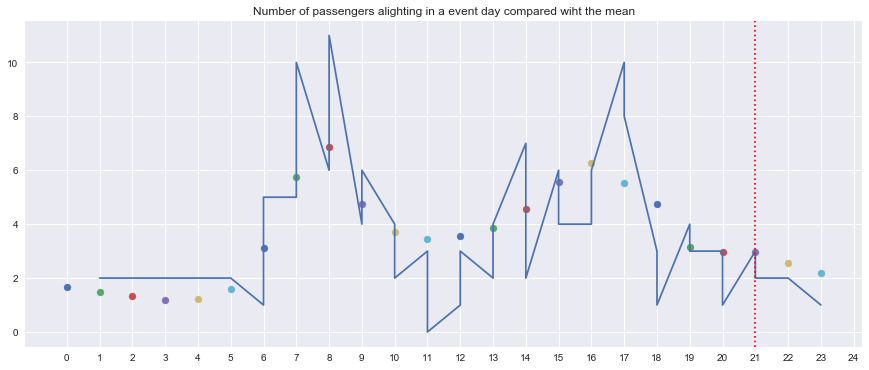

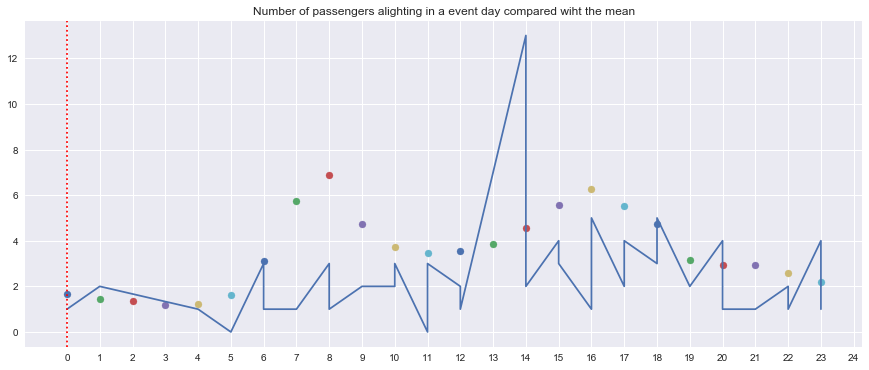

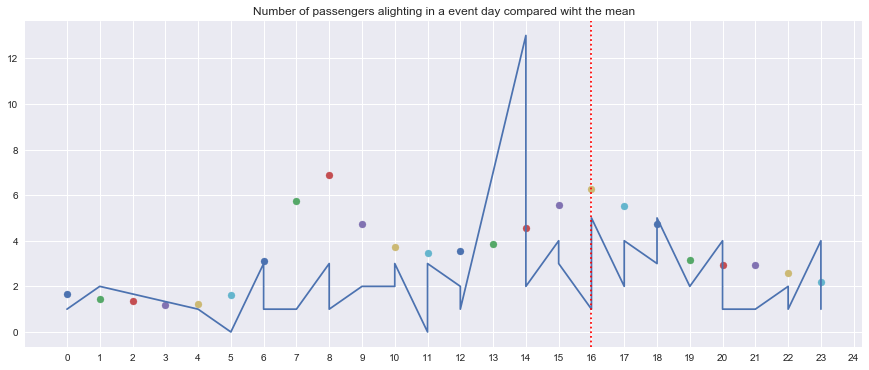

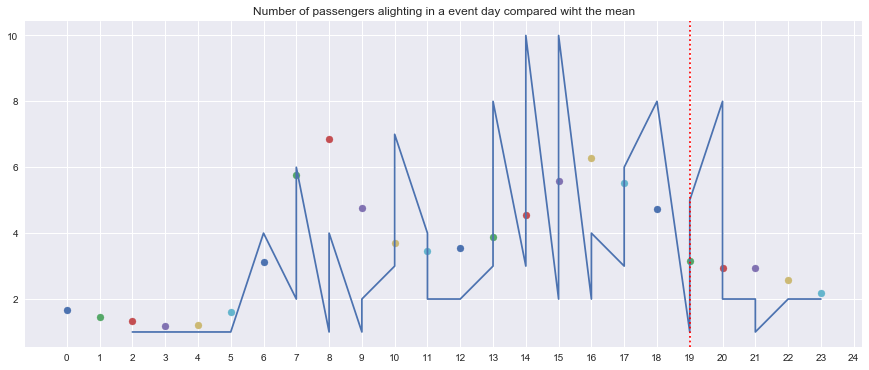

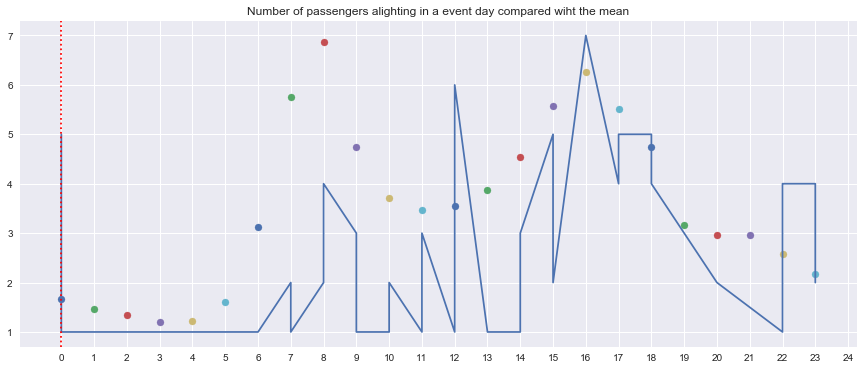

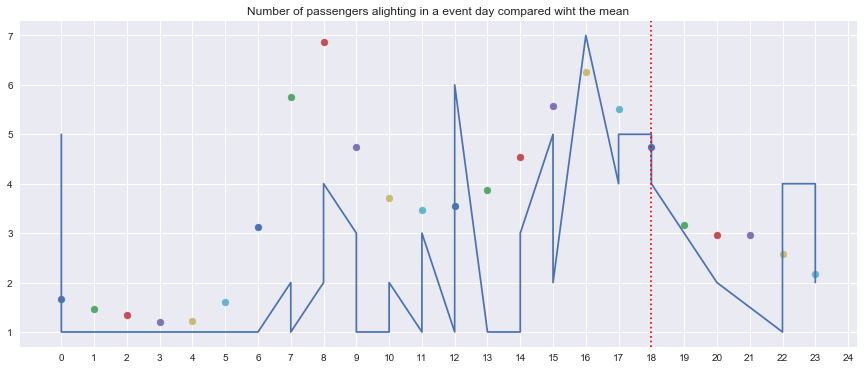

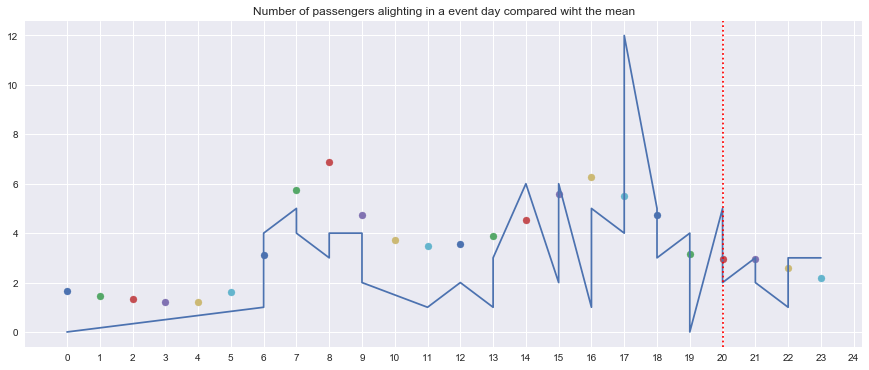

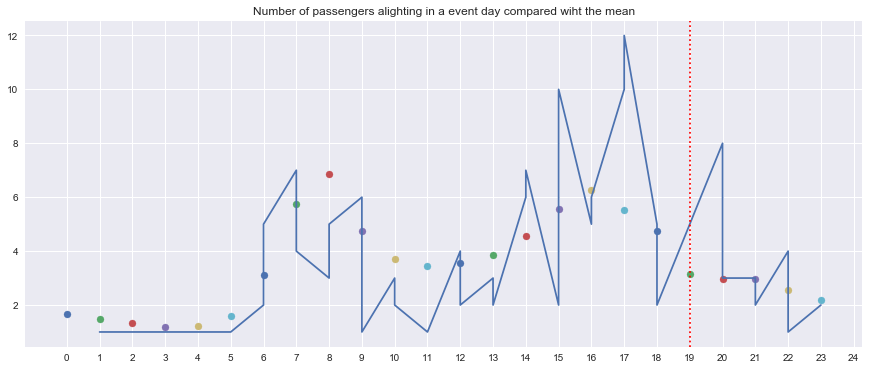

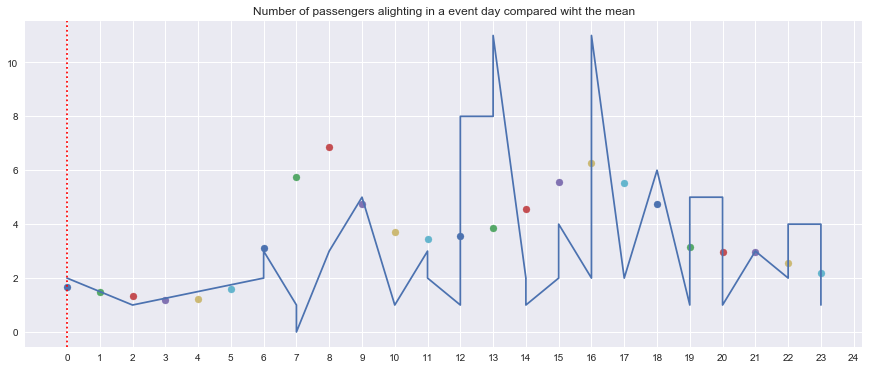

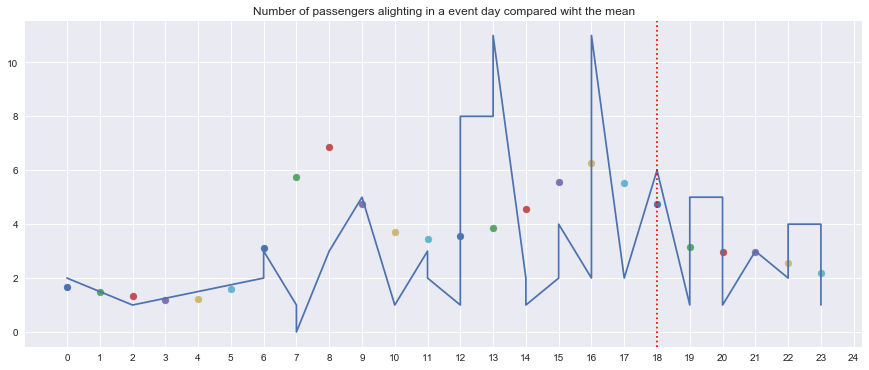

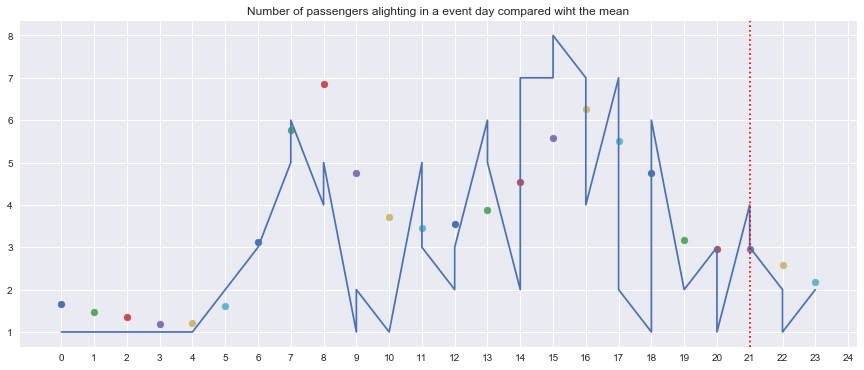

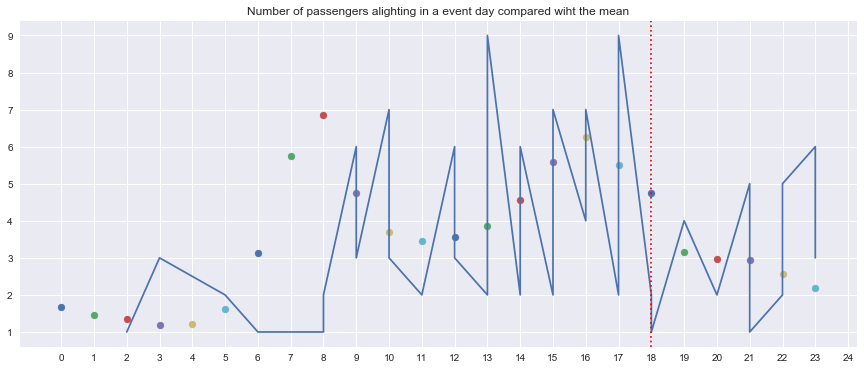

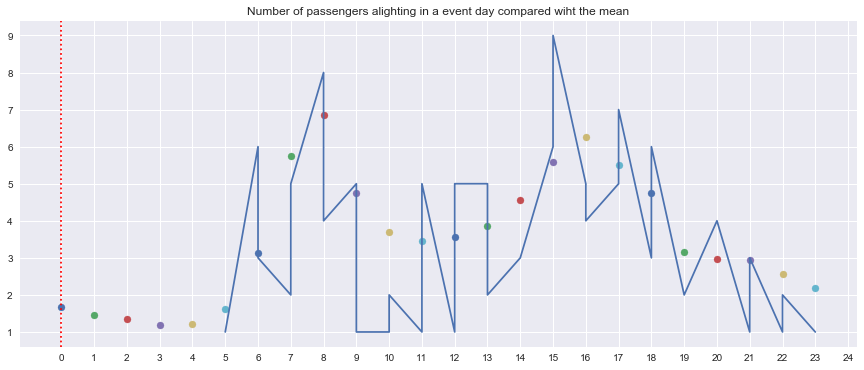

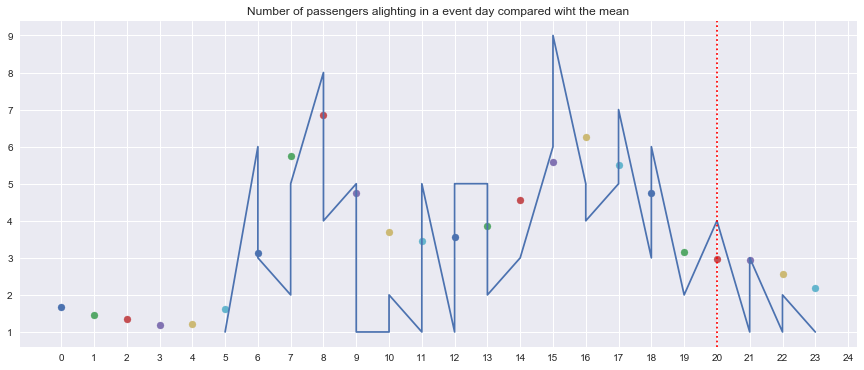

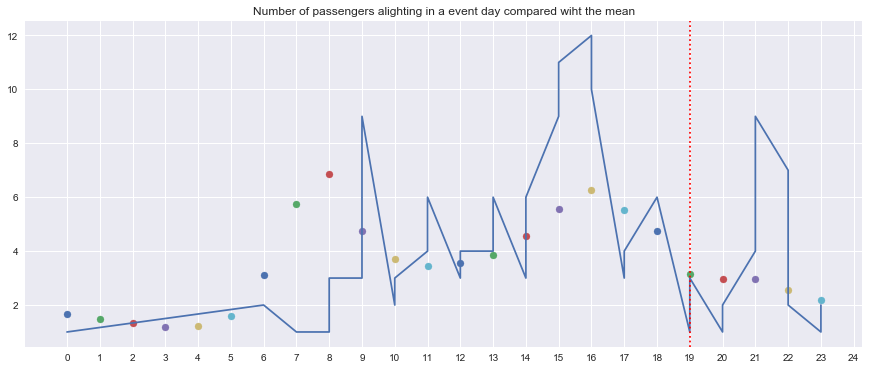

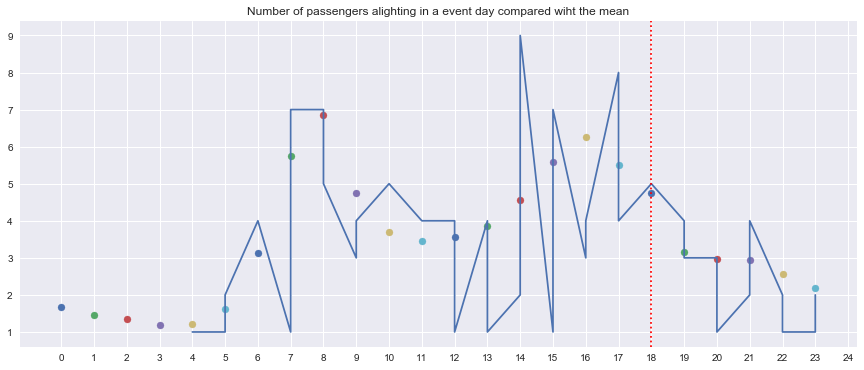

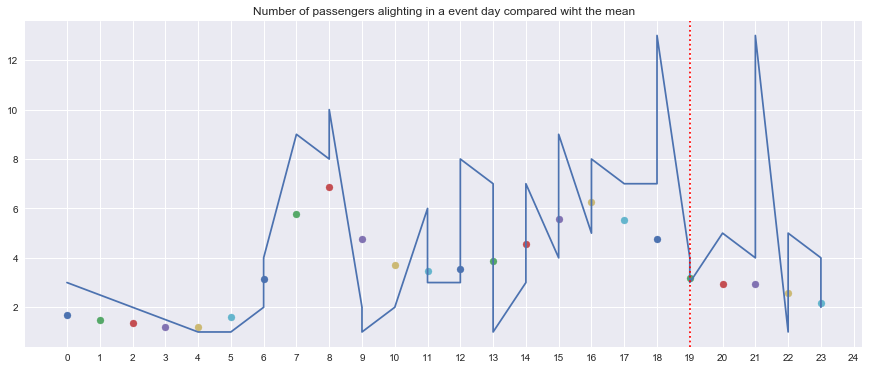

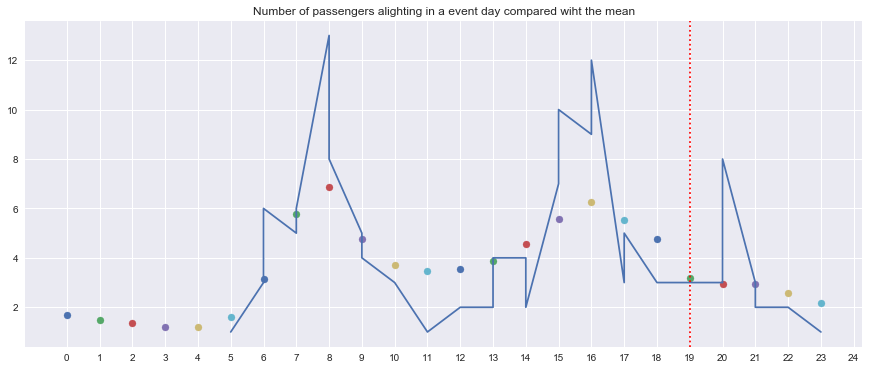

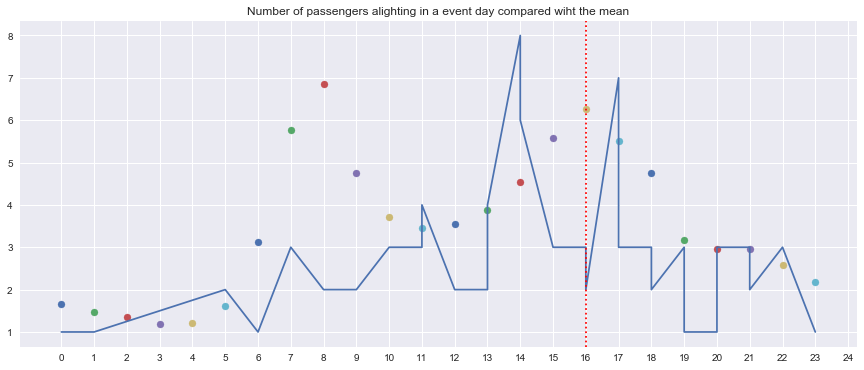

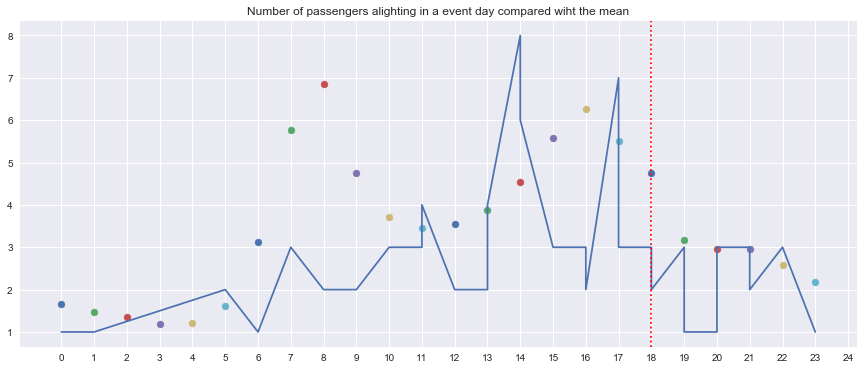

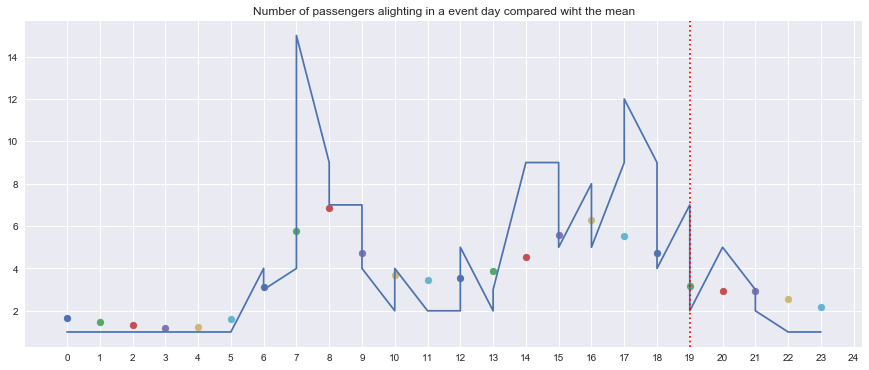

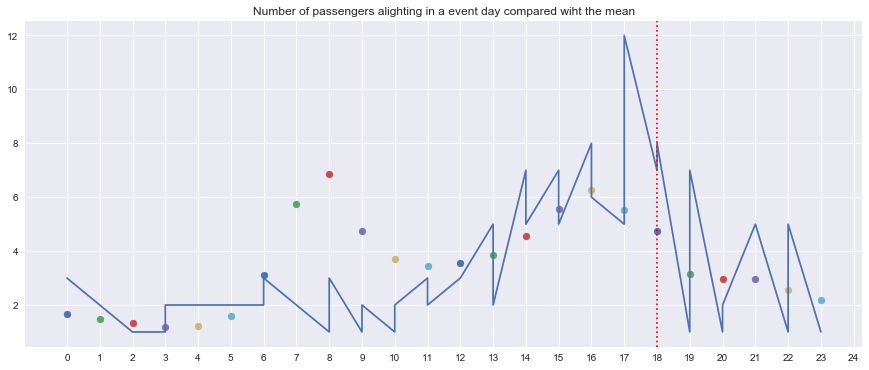

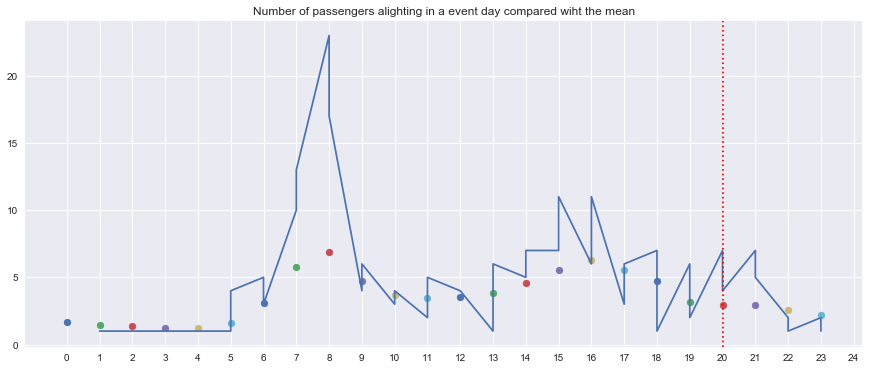

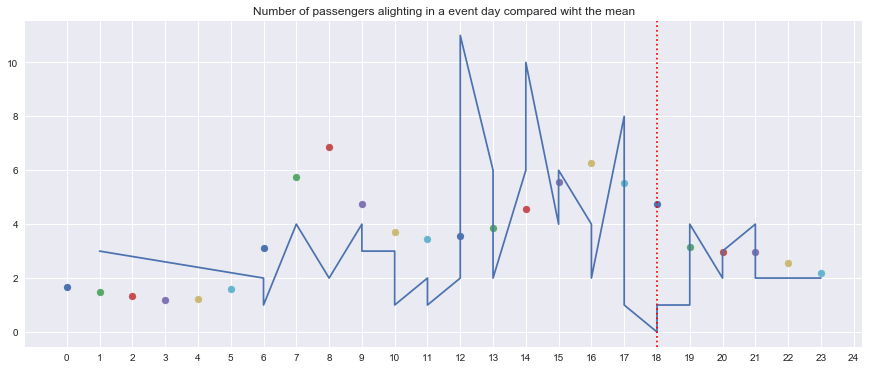

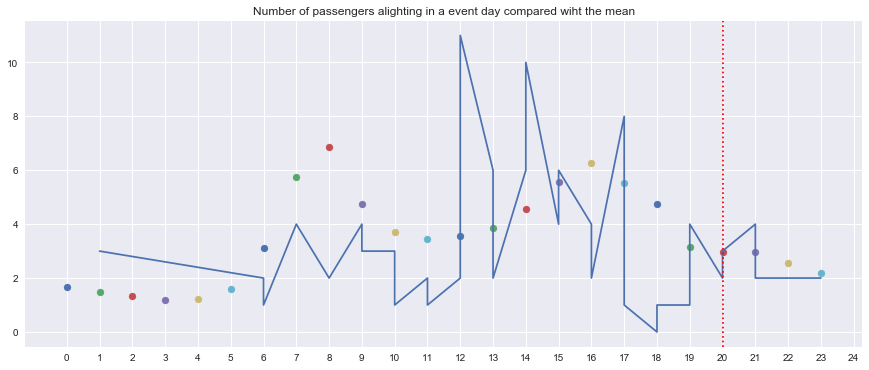

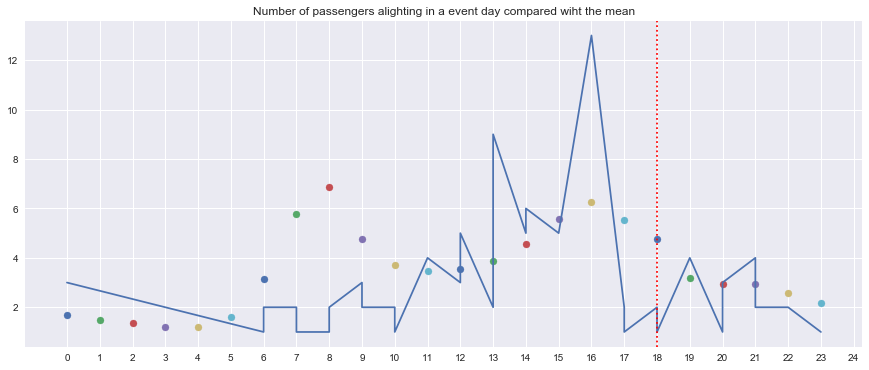

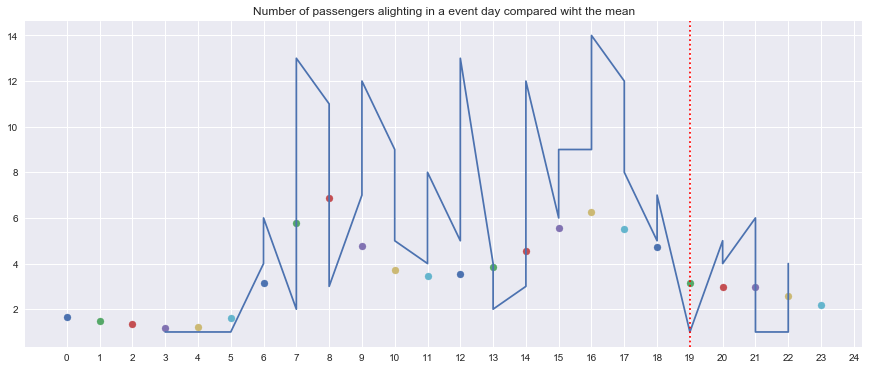

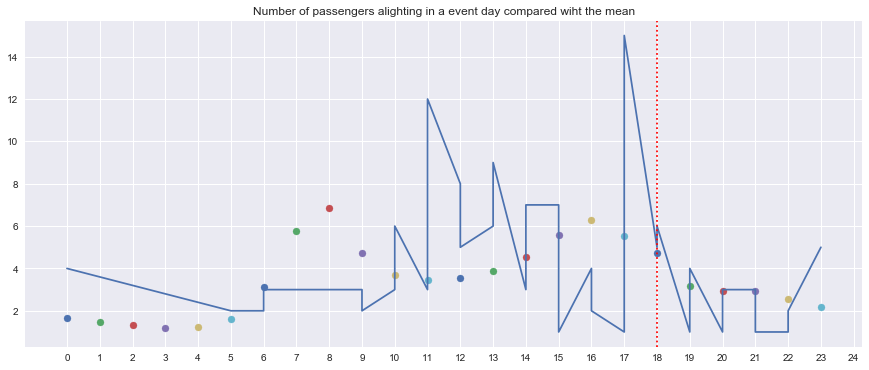

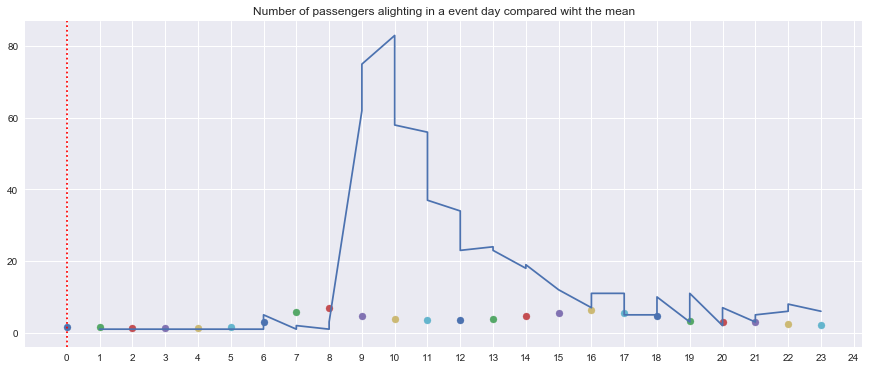

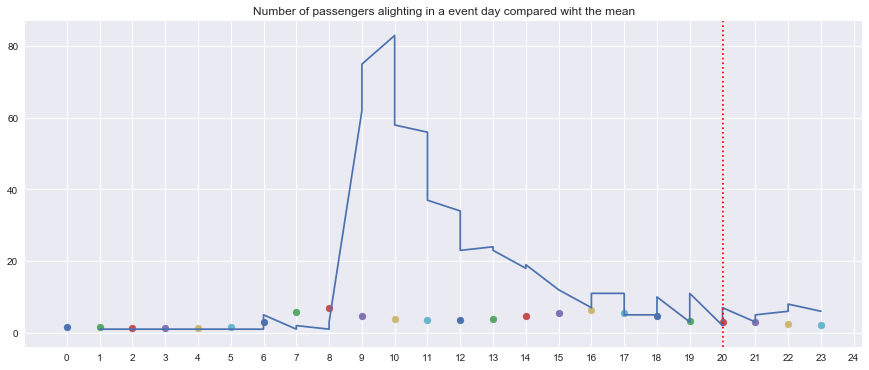

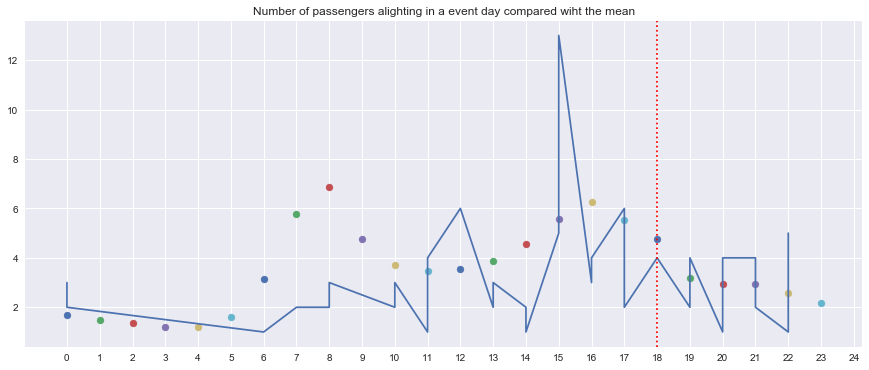

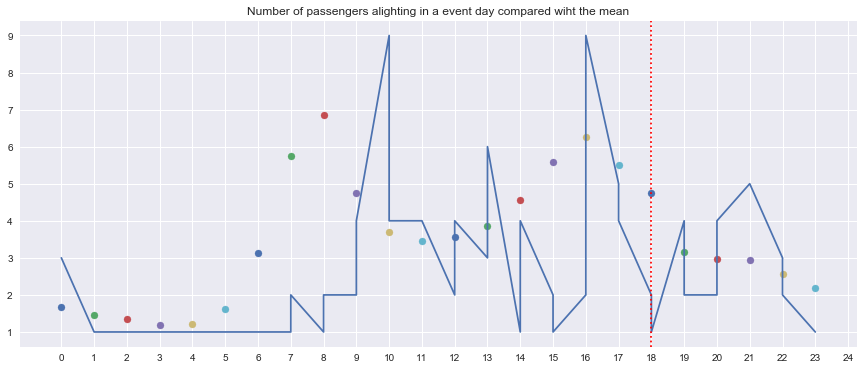

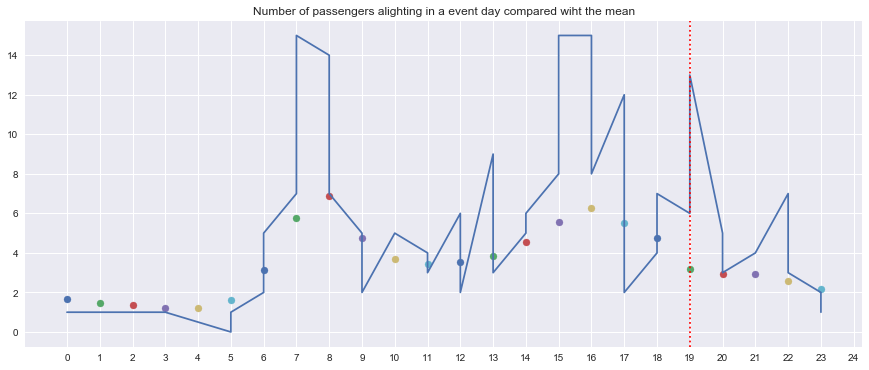

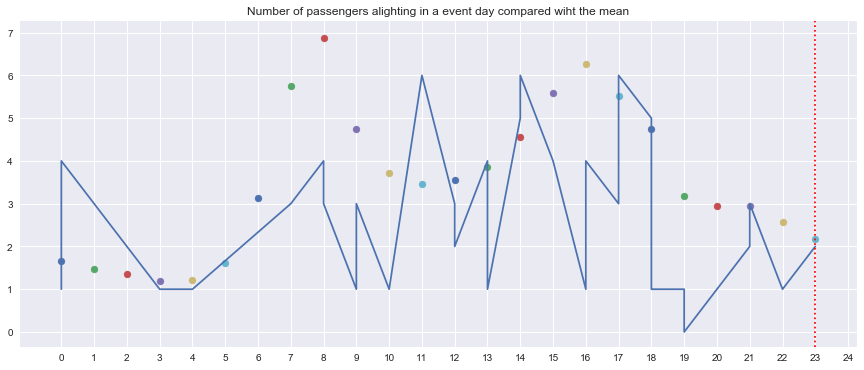

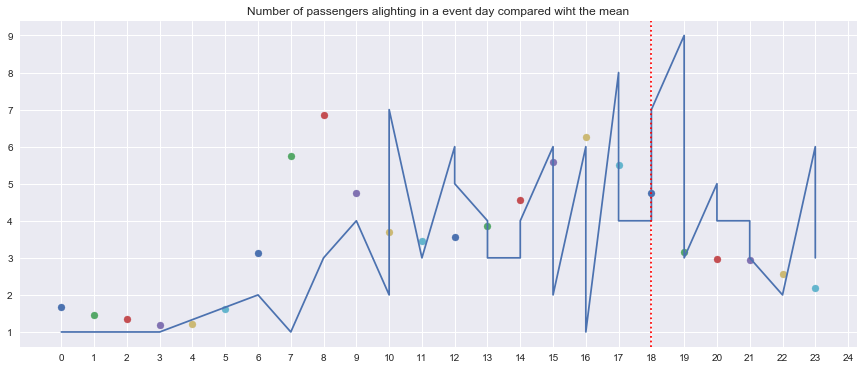

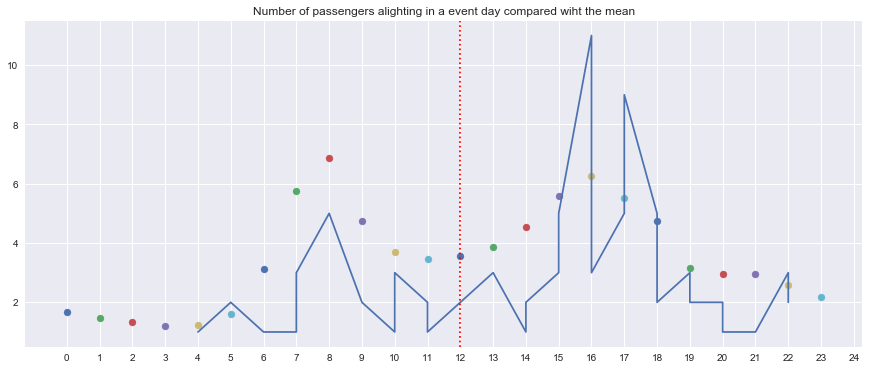

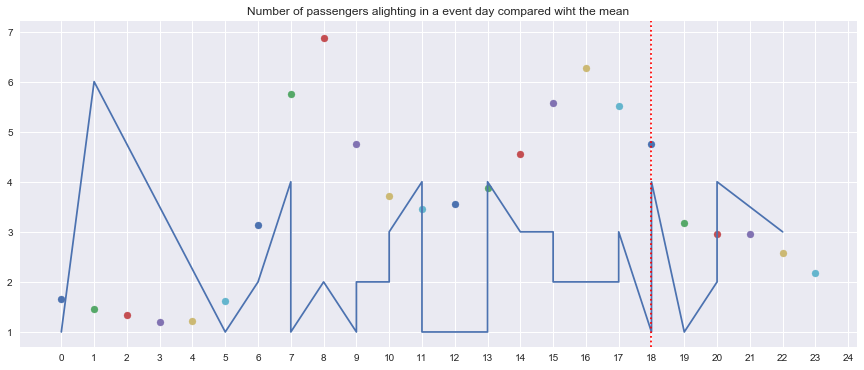

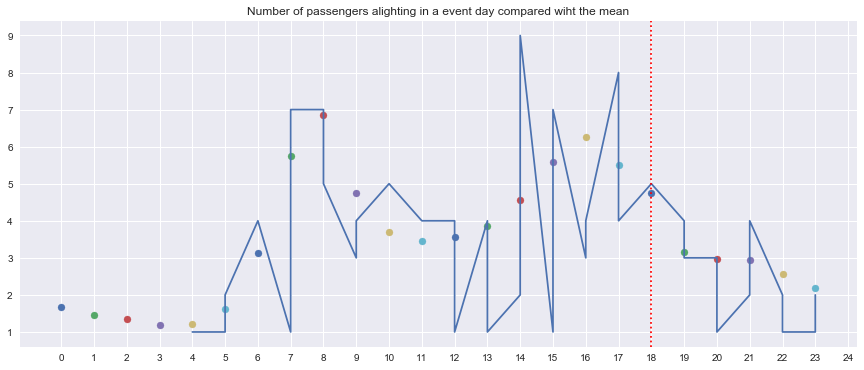

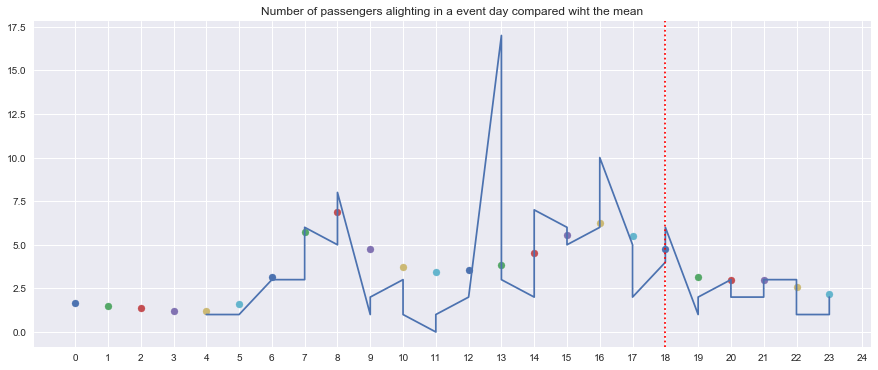

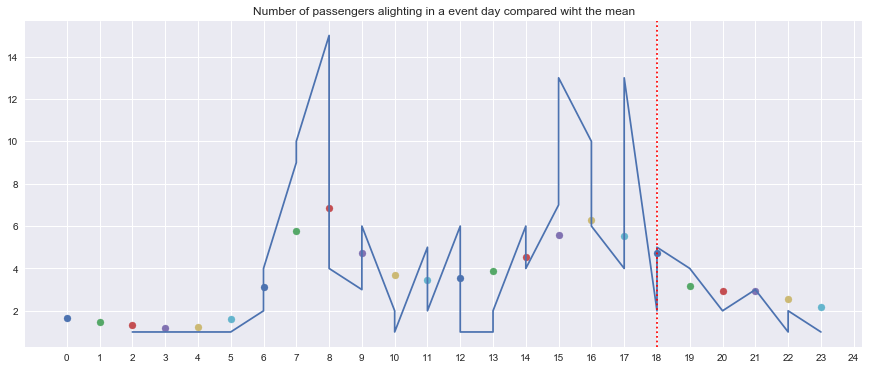

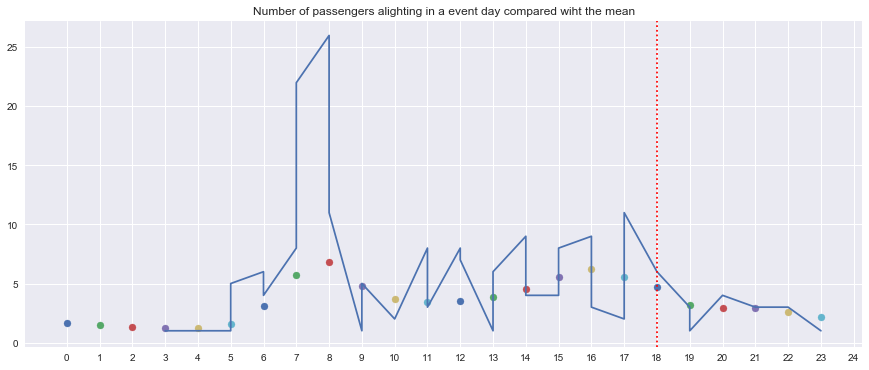

In [51]:
plt.rcParams['figure.figsize'] = (15, 6)


df_1ve=list_al_grouped[2]# Forum ; Vega;  Bella Center;   DR Koncerthuset;  Royal Arena;   Parken
                        #  0       1           2                3               4           5
    
ev_1ve=ev[ev['venue_unique']==ven_name_ev[4]]  #'DrKoncerthuset' 'ForumCopenhagen' 'TeliaPerken' 'Vega' 'BellaCenter''RoyalArena']
                                                 #    0                 1                2            3        4           5

ev_1ve=ev_1ve[ev_1ve['starting_time'].dt.year==2017]
for data in ev_1ve.starting_time:
    mo=data.month
    day=data.day
    hour=data.hour
    df_1m=df_1ve[df_1ve['TimeStep'].dt.month==mo]
    df_1d=df_1m[df_1m['TimeStep'].dt.day==day]

    plt.plot(df_1d['TimeStep'].dt.hour,df_1d['AlightingPassengerCount'])
    plt.axvline(x=hour, color='r', linestyle=':')
    plt.xticks(np.arange(0, 25, 1.0))
    for i in range(24):
        plt.scatter(i,np.mean(df_1ve['AlightingPassengerCount'][df_1ve['hours']==i]))
    plt.title("Number of passengers alighting in a event day compared wiht the mean")
#     print(hour)
    plt.show()

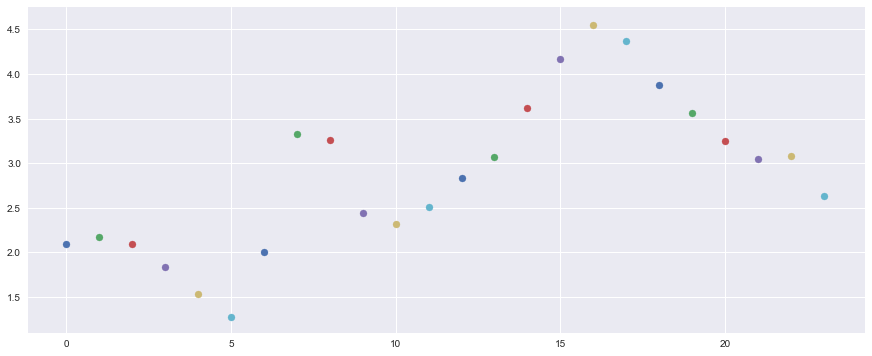

In [16]:
#mean of passengers over the hours

for i in range(24):
    plt.scatter(i,np.mean(al['AlightingPassengerCount'][al['hours']==i]))
    
plt.show()